# Analysis of Clonesig performance and comparison with other methods on simulated data

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Patch
import seaborn as sns
import numpy as np
import pandas as pd
import os
from statsmodels.stats.multitest import multipletests
from pathlib import Path

pd.options.display.max_columns = 200

method_color_dict = {'ccube': '#548ebb', 'clonesig': '#fc9d53',
                     'deconstructsigs':'#793d66', 'palimpsest':'#e45683',
                     'pyclone': '#87d0bd', 'sciclone': '#e1f5aa',
                     'tracksig': '#c4c3f9', 'DPClust': '#90c9e8',
                    'PhylogicNDT': '#F3BEDF', 'tracksigfreq': '#8942fc'}
hatch_dict = {'prefit': '/', 'cancertype': '.', 'cancer_type': '.',
             'all': '', 'all_nuclonal': '+'}
sns.set_context("poster", font_scale=2)
mpl.rcParams['hatch.linewidth'] = 3
pd.options.display.max_columns = 200
os.chdir('..')
output_path = '20200515_paper_figures/benchmark_simu_clonesig'
Path(output_path).mkdir(parents=True, exist_ok=True)
import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
legend_keys = {'ccube': 'Ccube', 'tracksig': 'TrackSig',
               'tracksigfreq': 'TrackSigFreq', 'pyclone': 'PyClone',
               'sciclone': 'SciClone', 'palimpsest': 'Palimpsest',
               'deconstructsigs': 'deconstructSigs',
               'PhylogicNDT': 'PhylogicNDT', 'DPClust': 'DPClust',
               'clonesig': 'CloneSig'}

## Simulations with varying signatures accross clones

In [4]:
clonesig_res = pd.read_csv('20200520_eval_compare_simulations_new.csv', sep='\t')
clonesig_res = clonesig_res[~((clonesig_res.method=='tracksigfreq')&(clonesig_res.nb_mut<100))]
clonesig_res = clonesig_res.assign(full_method=clonesig_res.method + '-' + clonesig_res.setting)
clonesig_res_ith = clonesig_res[clonesig_res.method.isin(['ccube', 'clonesig', 'sciclone', 'pyclone', 'tracksig', 'palimpsest', 'DPClust', 'PhylogicNDT', 'tracksigfreq'])]
clonesig_res_sig = clonesig_res[clonesig_res.method.isin(['clonesig', 'deconstructsigs', 'tracksig', 'palimpsest', 'tracksigfreq'])]

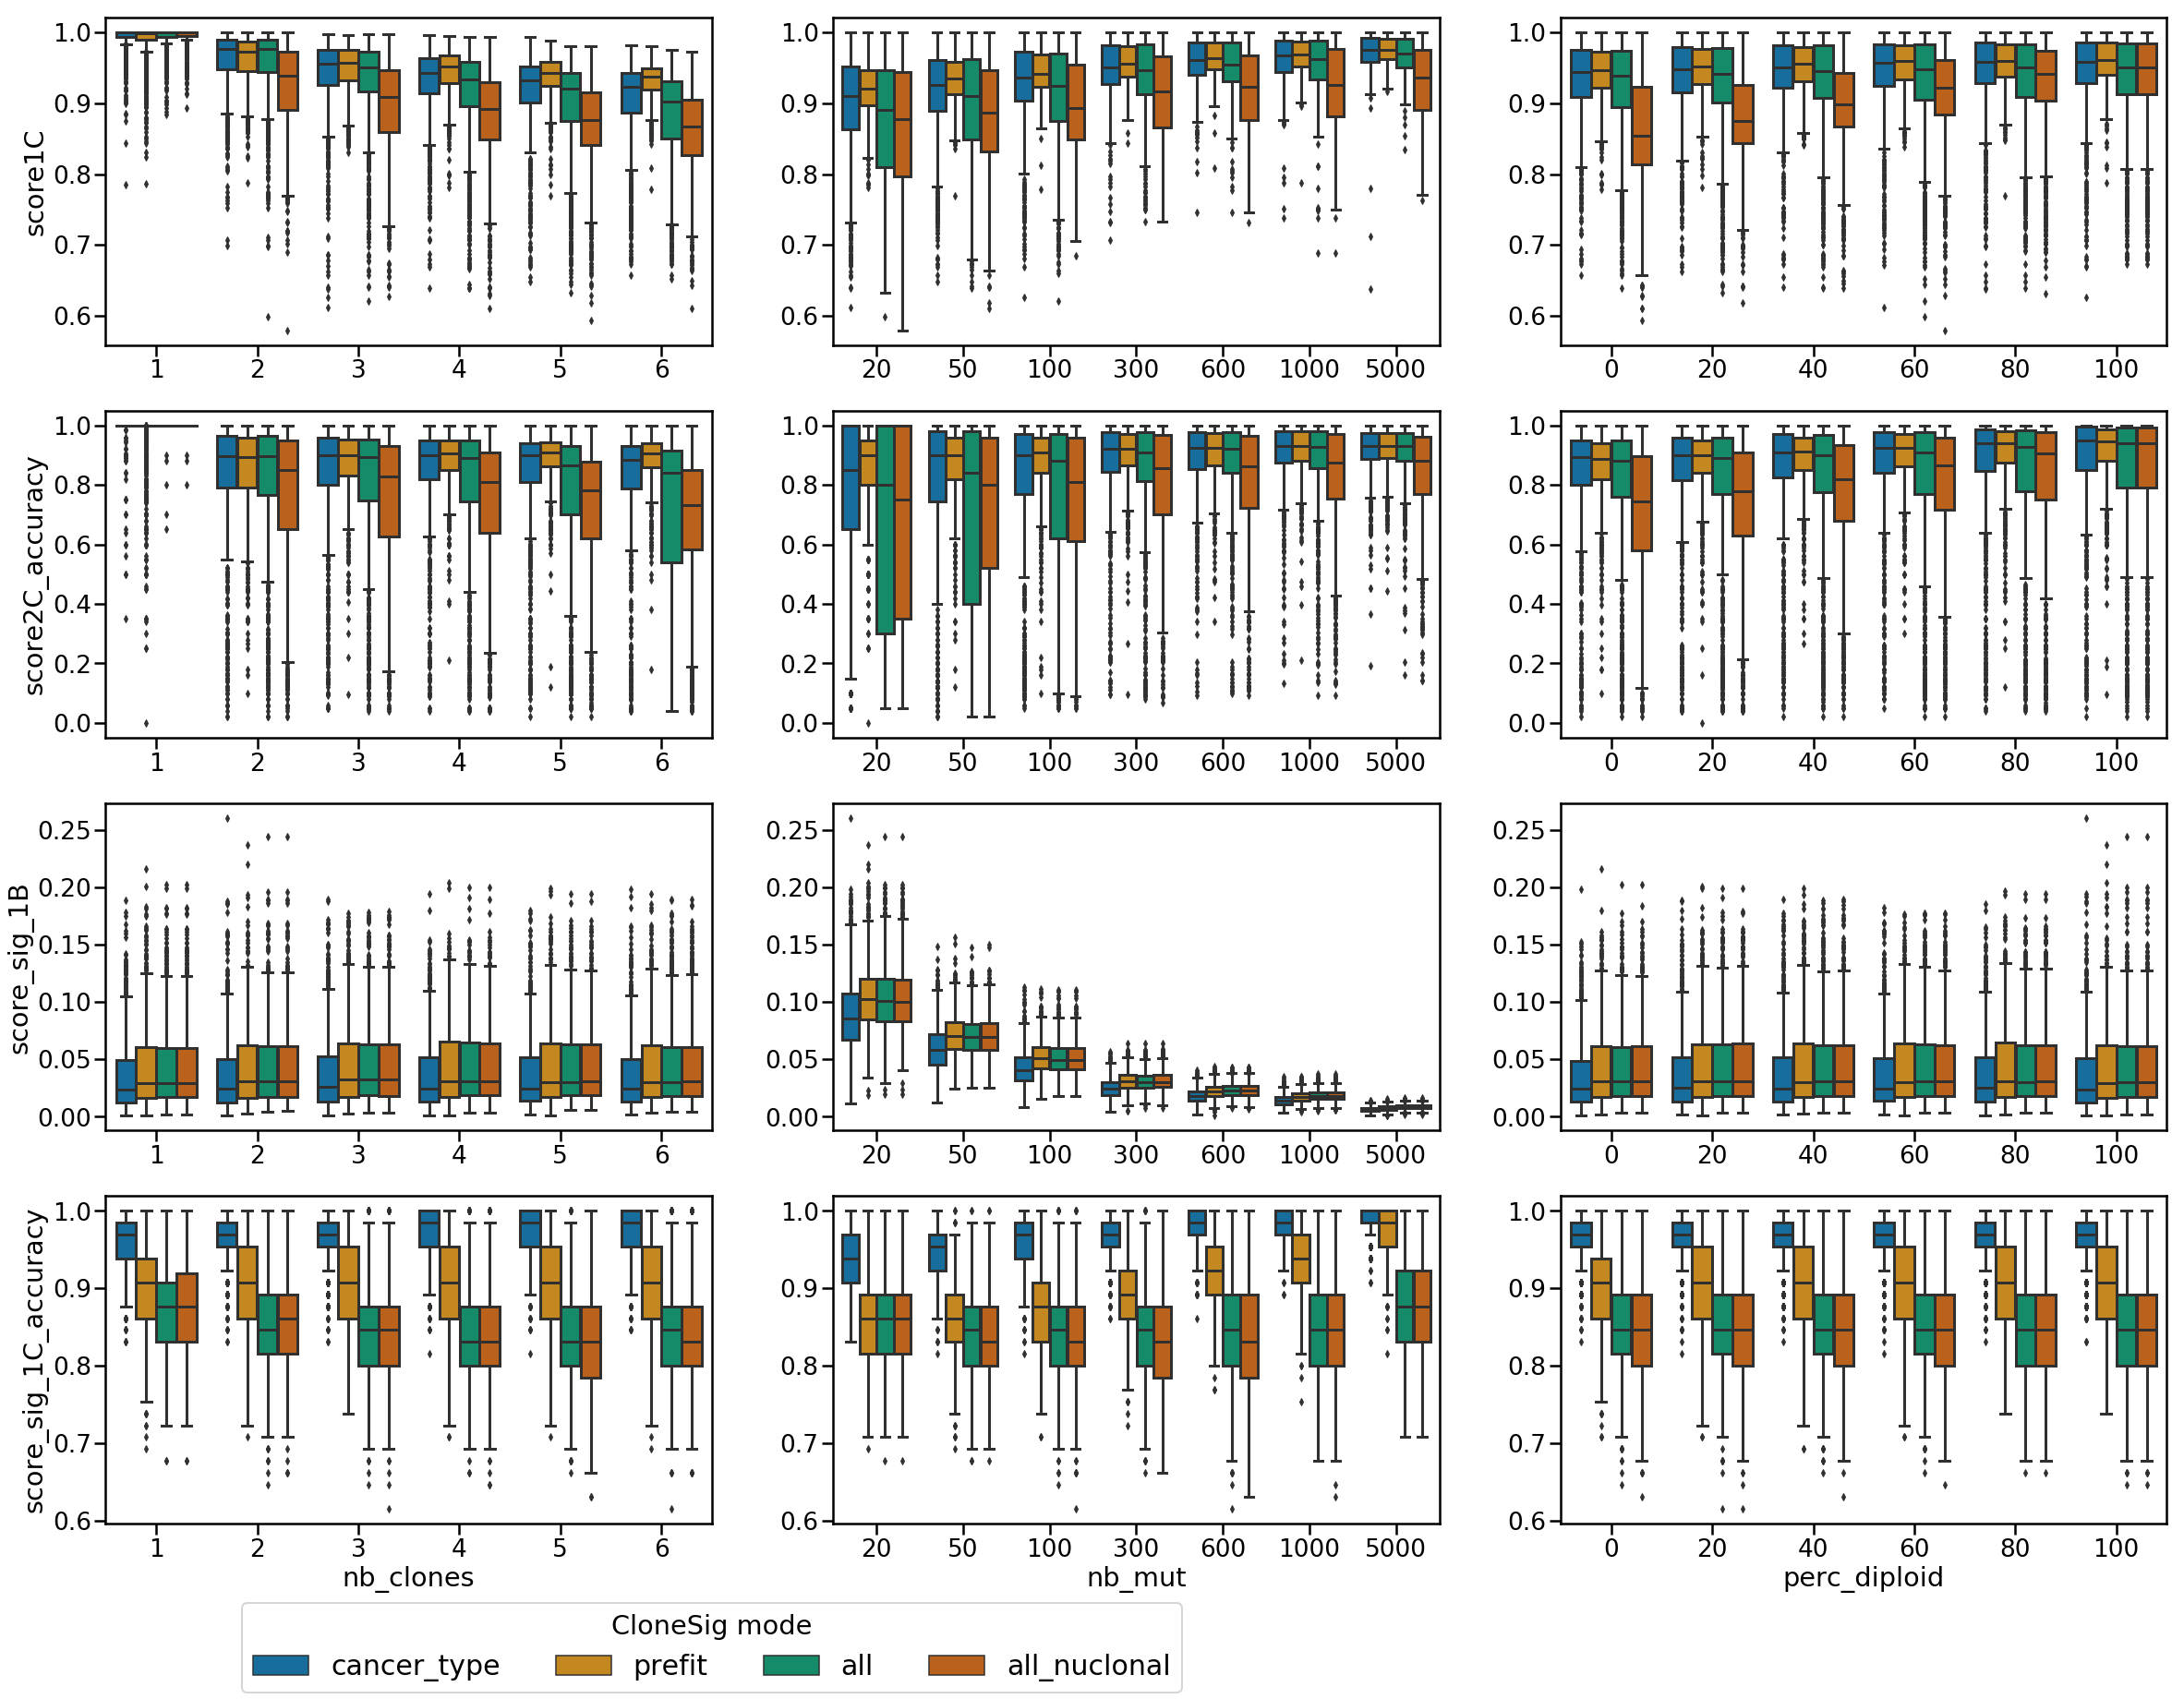

In [5]:
sns.set_context('poster', font_scale=1.2)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(40, 30))
for ii, score in enumerate(('score1C', 'score2C_accuracy', 'score_sig_1B',
                 'score_sig_1C_accuracy')):
    for jj, covariate in enumerate(('nb_clones', 'nb_mut', 'perc_diploid')):
        if ('sig' in score) or ('score' not in score):
            sub_clonesig_res = clonesig_res_sig[clonesig_res_sig.method=='clonesig']
        else:
            sub_clonesig_res = clonesig_res_ith[clonesig_res_ith.method=='clonesig']
        if score == 'runtime':
            sub_clonesig_res = clonesig_res[clonesig_res.method=='clonesig']


        sns.boxplot(x=covariate, y=score, hue="setting",
                        data=sub_clonesig_res,
                        ax=axes[ii, jj], palette='colorblind')

        ax = axes[ii, jj]
        if (ii==3) and (jj==0):
            ax.legend(loc=9, bbox_to_anchor=(1, -0.2), ncol=4, fontsize=30,
                      title='CloneSig mode')
        else:
            ax.get_legend().remove()
        if jj!=0:
            ax.set_ylabel('')
        if ii!=3:
            ax.set_xlabel('')

plt.savefig('{}/altervatives_clonesig_mode.pdf'.format(output_path), bbox_inches='tight')


In [6]:
methods_to_use = ['deconstructsigs-cancertype', 'clonesig-cancer_type',
                  'palimpsest-cancertype', 'ccube-all', 'sciclone-all',
                  'pyclone-all', 'tracksig-cancertype', 'DPClust-all',
                  'PhylogicNDT-all', 'tracksigfreq-cancertype']
reduced_clonesig_res = clonesig_res[clonesig_res.full_method.isin(methods_to_use)]
clonesig_res_ith = reduced_clonesig_res[reduced_clonesig_res.method.isin(['ccube', 'clonesig', 'sciclone', 'pyclone', 'tracksig', 'palimpsest', 'DPClust', 'PhylogicNDT', 'tracksigfreq'])]
clonesig_res_sig = reduced_clonesig_res[reduced_clonesig_res.method.isin(['clonesig', 'deconstructsigs', 'tracksig', 'palimpsest', 'tracksigfreq'])]

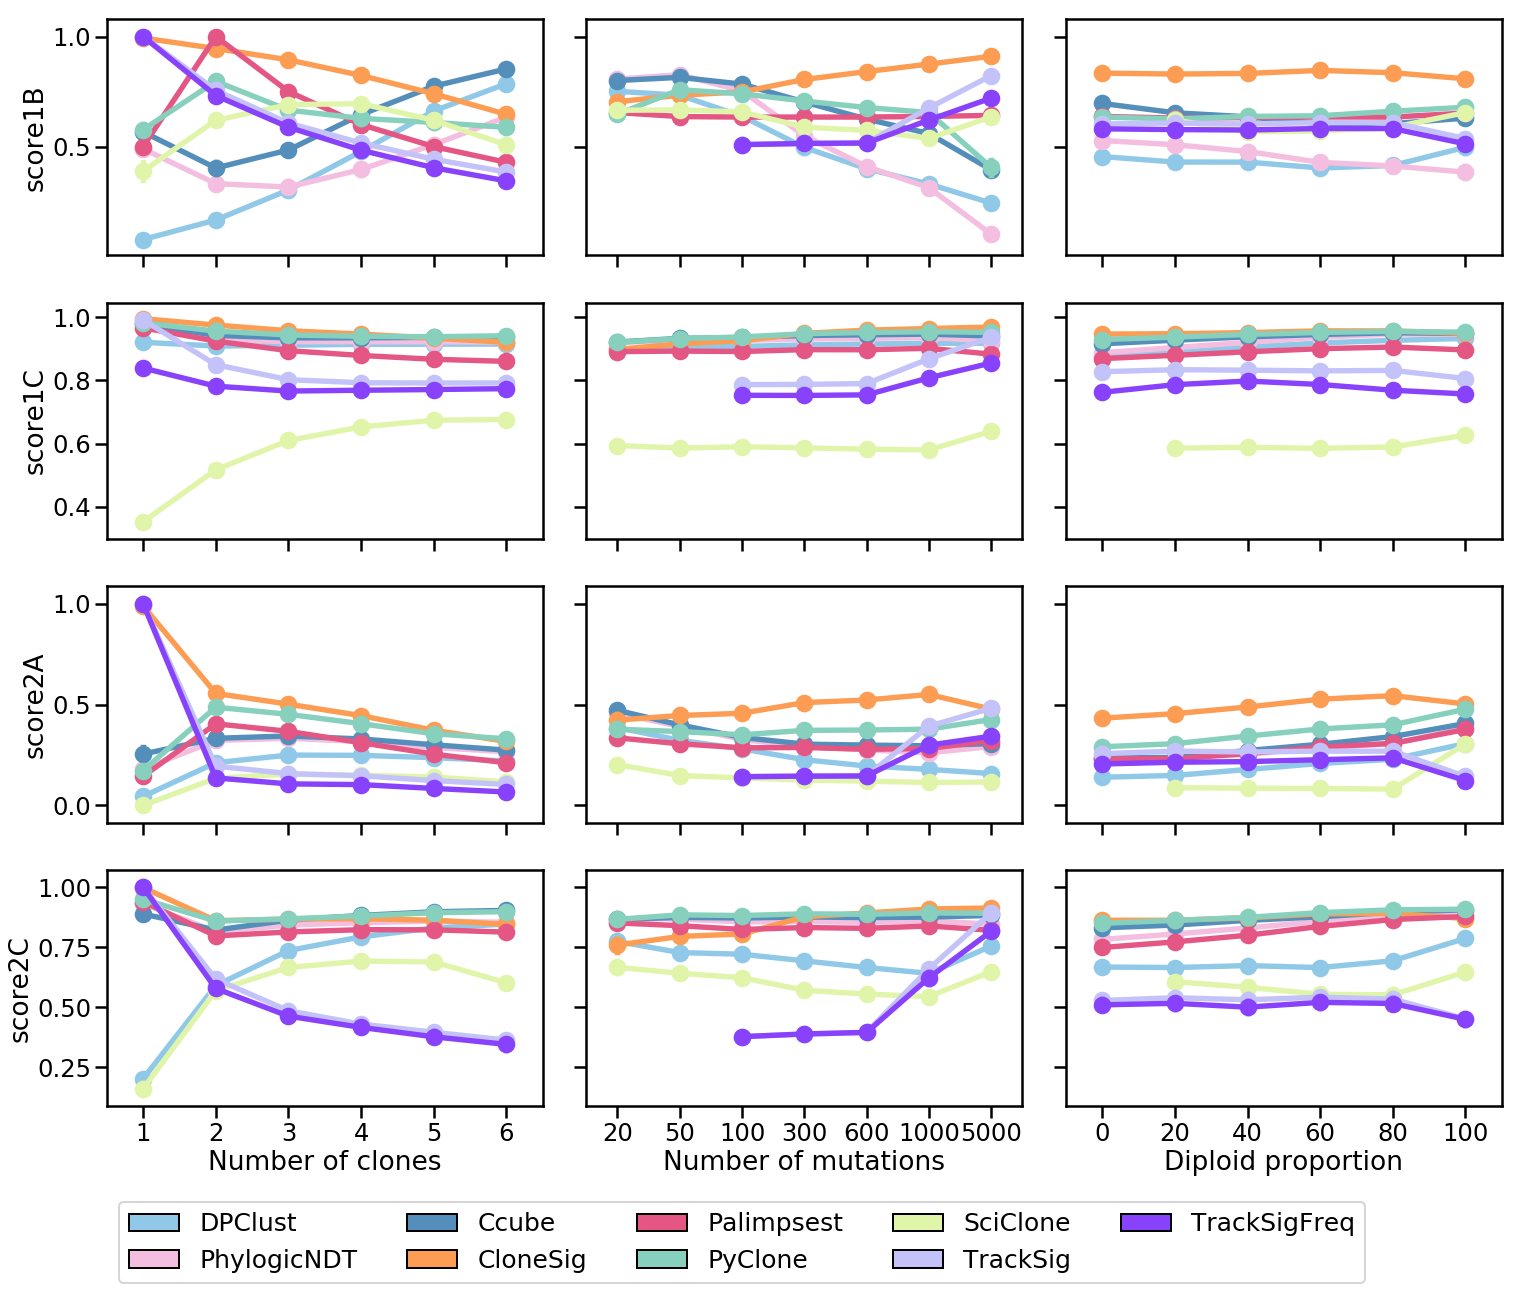

In [7]:
sns.set_context('poster', font_scale=1.1)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 20), sharey='row', sharex='col')
clonesig_res_ith_copy = clonesig_res_ith.copy()
clonesig_res_ith_copy = clonesig_res_ith_copy.assign(score2C=clonesig_res_ith_copy.score2C_accuracy)
id_vars = ['cancer_type', 'perc_diploid', 'nb_clones', 'nb_mut']
covariates = ('nb_clones', 'nb_mut', 'perc_diploid')
nice_name = ['Number of clones', 'Number of mutations', 'Diploid proportion']
for ii, score in enumerate(('score1B', 'score1C',
                'score2A', 'score2C')):
    for jj, covariate in enumerate(covariates):
        if ('sig' in score) or ('score' not in score):
            sub_clonesig_res = clonesig_res_sig
        else:
            sub_clonesig_res = clonesig_res_ith_copy
        if score == 'runtime':
            sub_clonesig_res = clonesig_res

        aa = sub_clonesig_res.groupby(id_vars).method.nunique().to_frame().reset_index()
        aa = aa.assign(nb_method=aa.method).drop(columns=['method'])
        sub_clonesig_res_complete = pd.merge(sub_clonesig_res, aa,
                                             on=id_vars)
        if covariate=="nb_clones":
            sub_clonesig_res_filter = sub_clonesig_res_complete[sub_clonesig_res_complete.nb_method==9]
        elif covariate=='nb_mut':
            sub_clonesig_res_filter = sub_clonesig_res_complete[((sub_clonesig_res_complete.nb_method==9)&(sub_clonesig_res_complete.nb_mut>=100))|
                                                                ((sub_clonesig_res_complete.nb_method==7)&(sub_clonesig_res_complete.nb_mut<100))]
        elif covariate=='perc_diploid':
            sub_clonesig_res_filter = sub_clonesig_res_complete[((sub_clonesig_res_complete.nb_method==9)&(sub_clonesig_res_complete.perc_diploid>0))|
                                                                ((sub_clonesig_res_complete.nb_method==8)&(sub_clonesig_res_complete.perc_diploid==0))]
        else:
            print('unknown covariate')
            break

        sns.pointplot(x=covariate, y=score, hue="full_method",
                        data=sub_clonesig_res_filter, palette=[method_color_dict[i.split('-')[0]] for i in sorted(sub_clonesig_res_filter.full_method.unique())],
                        hue_order=sorted(sub_clonesig_res_filter.full_method.unique()), ax=axes[ii, jj])

        ax = axes[ii, jj]
        n = len(ax.artists)
        nb_box = sub_clonesig_res.full_method.nunique()
        labels = sub_clonesig_res.pivot_table(columns=covariate, values=score,
                                             index="full_method", aggfunc='count')\
            .unstack().dropna().index.to_frame().apply(tuple, axis=1).values
        box_name = sorted(sub_clonesig_res.full_method.unique())
        
        if (ii==3) and (jj==0):
            legend_items = list()
            for key in sorted(sorted(clonesig_res_ith.method.unique())):
                legend_items.append(Patch(facecolor=method_color_dict[key], edgecolor='black', label=legend_keys[key]))
            ax.legend(handles=legend_items,
                      bbox_to_anchor=(0, -0.8, 1., .102), fontsize=25, loc=3, ncol=5)
        else:
            ax.get_legend().remove()

        if jj!=0:
            ax.set_ylabel('')
        if ii!=3:
            ax.set_xlabel('')
        else:
            ax.set_xlabel(nice_name[jj])
plt.subplots_adjust(wspace=0.1)
plt.savefig('{}/all_comp_method_results_ith_only.pdf'.format(output_path),
            bbox_inches='tight')


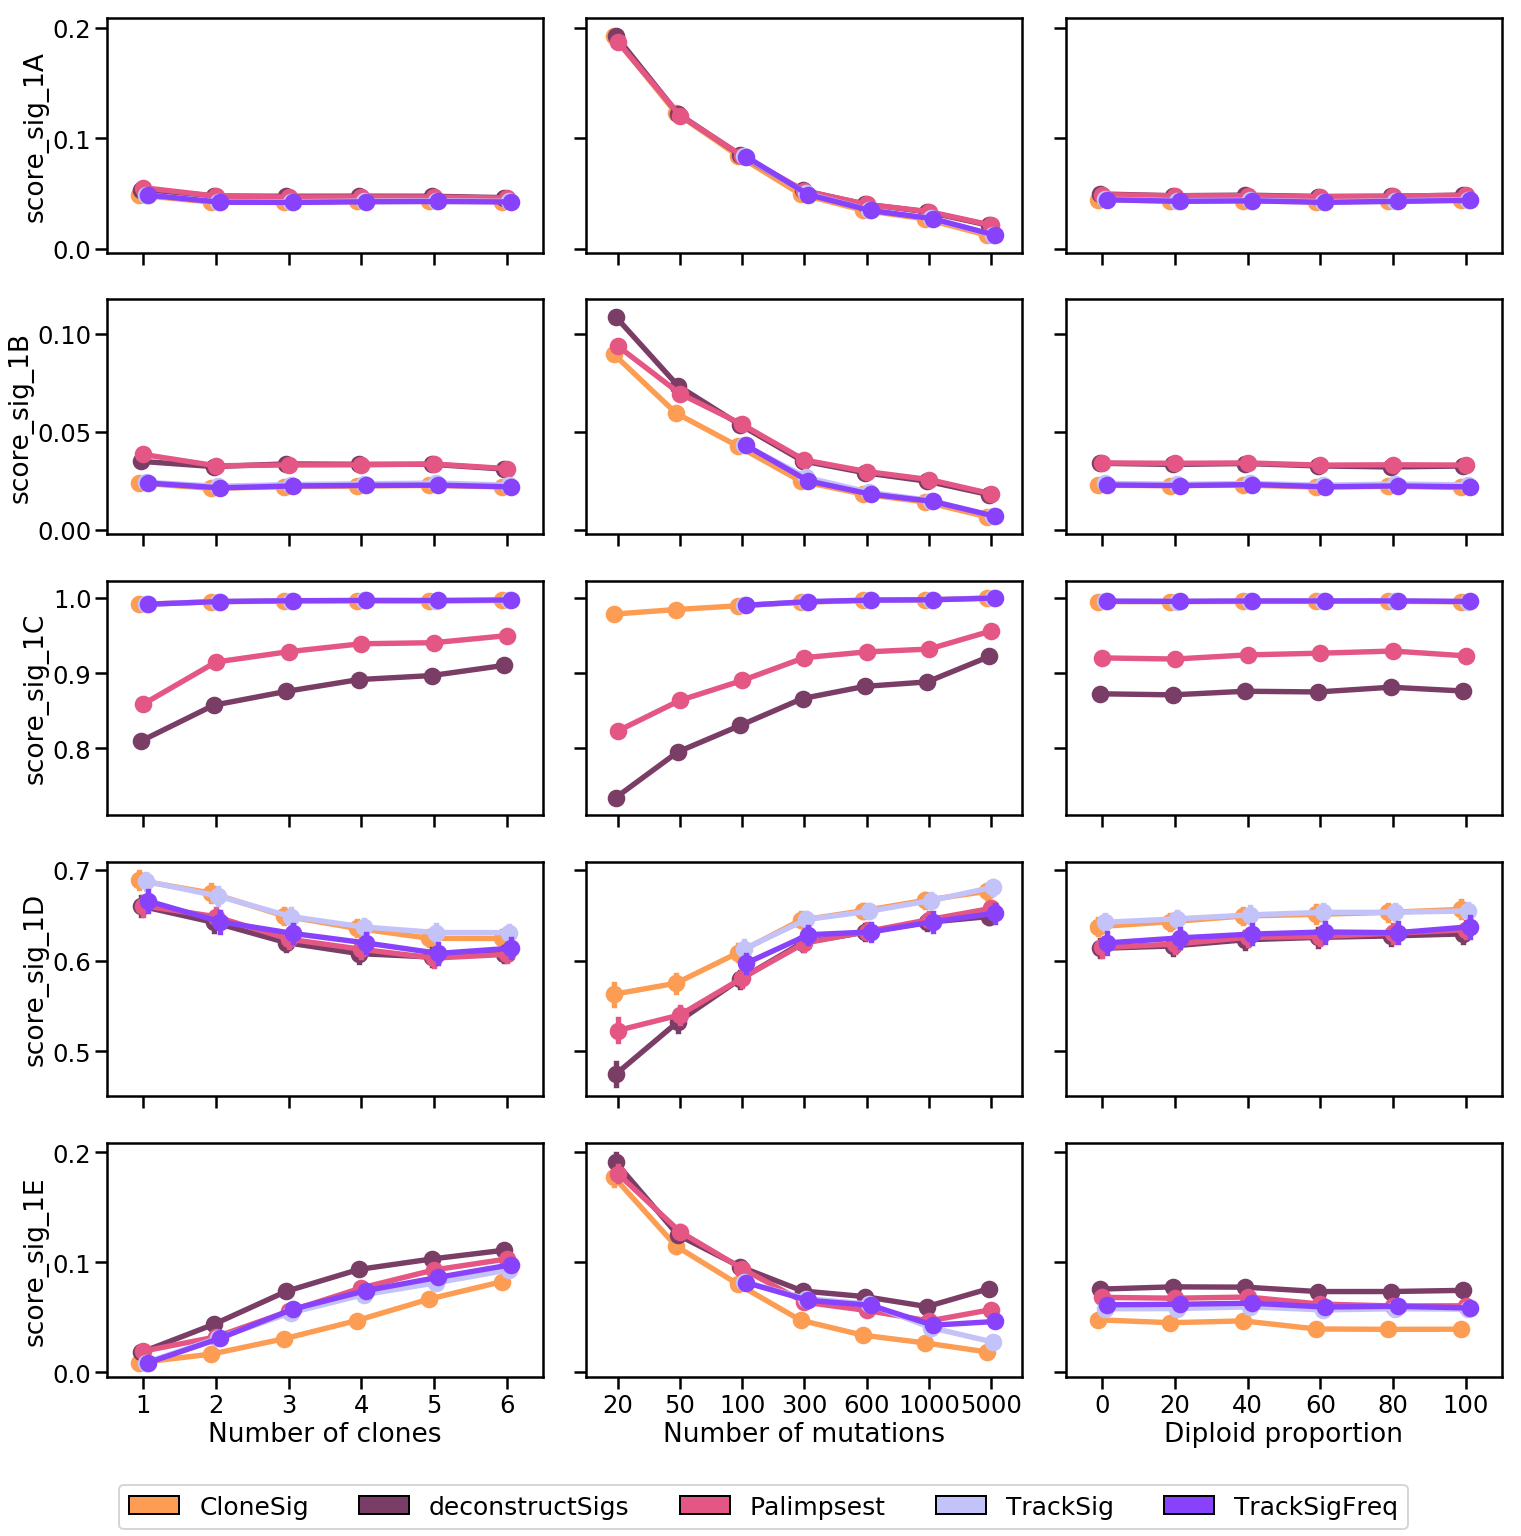

In [8]:
sns.set_context('poster', font_scale=1.1)
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(25, 25), sharey='row', sharex='col')
clonesig_res_sig_copy = clonesig_res_sig.copy()
clonesig_res_sig_copy = clonesig_res_sig_copy.assign(score_sig_1E=clonesig_res_sig_copy.median_diff_distrib_mut)
clonesig_res_sig_copy = clonesig_res_sig_copy.assign(score_sig_1C=clonesig_res_sig_copy.score_sig_1C_auc)
for ii, score in enumerate(('score_sig_1A', 'score_sig_1B',
                'score_sig_1C', 'score_sig_1D',
                'score_sig_1E')):
    for jj, covariate in enumerate(('nb_clones', 'nb_mut', 'perc_diploid')):
        if ('sig' in score) or ('score' not in score):
            sub_clonesig_res = clonesig_res_sig_copy
        else:
            sub_clonesig_res = clonesig_res_ith
        if score == 'runtime':
            sub_clonesig_res = clonesig_res

        aa = sub_clonesig_res.groupby(id_vars).method.nunique().to_frame().reset_index()
        aa = aa.assign(nb_method=aa.method).drop(columns=['method'])
        sub_clonesig_res_complete = pd.merge(sub_clonesig_res, aa,
                                             on=id_vars)
        if covariate=="nb_clones":
            sub_clonesig_res_filter = sub_clonesig_res_complete[sub_clonesig_res_complete.nb_method==5]
        elif covariate=='nb_mut':
            sub_clonesig_res_filter = sub_clonesig_res_complete[((sub_clonesig_res_complete.nb_method==5)&(sub_clonesig_res_complete.nb_mut>=100))|
                                                                ((sub_clonesig_res_complete.nb_method==3)&(sub_clonesig_res_complete.nb_mut<100))]
        elif covariate=='perc_diploid':
            sub_clonesig_res_filter = sub_clonesig_res_complete[sub_clonesig_res_complete.nb_method==5]
        else:
            print('unknown covariate')
            break


        sns.pointplot(x=covariate, y=score, hue="full_method",
                        data=sub_clonesig_res_filter, palette=[method_color_dict[i.split('-')[0]] for i in sorted(sub_clonesig_res_filter.full_method.unique())],
                        hue_order=sorted(sub_clonesig_res_filter.full_method.unique()), ax=axes[ii, jj], dodge=True)

        ax = axes[ii, jj]
        n = len(ax.artists)
        nb_box = sub_clonesig_res.full_method.nunique()
        labels = sub_clonesig_res.pivot_table(columns=covariate, values=score,
                                             index="full_method", aggfunc='count')\
            .unstack().dropna().index.to_frame().apply(tuple, axis=1).values
        box_name = sorted(sub_clonesig_res.full_method.unique())
        
        if (ii==4) and (jj==0):
            legend_items = list()
            for key in sorted(sorted(clonesig_res_sig.method.unique())):
                legend_items.append(Patch(facecolor=method_color_dict[key], edgecolor='black', label=legend_keys[key]))
            ax.legend(handles=legend_items,
                      bbox_to_anchor=(0, -0.7, 1., .102), fontsize=25, loc=3, ncol=5)
        else:
            ax.get_legend().remove()

        if jj!=0:
            ax.set_ylabel('')
            #ax.yaxis.set_ticklabels([])
        if ii!=4:
            ax.set_xlabel('')
            #ax.xaxis.set_ticklabels([])
        else:
            ax.set_xlabel(nice_name[jj])
plt.subplots_adjust(wspace=0.1)
plt.savefig('{}/all_comp_method_results_sig_only.pdf'.format(output_path), bbox_inches='tight')


In [9]:
clonesig_res_sig[clonesig_res_sig.method=='clonesig'].nb_mut.value_counts()

1000    1116
600     1116
300     1116
100     1116
5000    1115
50      1114
20      1009
Name: nb_mut, dtype: int64

In [10]:
clonesig_res = pd.read_csv('20200520_eval_compare_simulations_new.csv', sep='\t')
clonesig_res = clonesig_res[~((clonesig_res.method=='tracksigfreq')&(clonesig_res.nb_mut<100))]
clonesig_res = clonesig_res.assign(full_method=clonesig_res.method + '-' + clonesig_res.setting)
reduced_clonesig_res = clonesig_res[clonesig_res.full_method.isin(methods_to_use)]
clonesig_res_ith = reduced_clonesig_res[reduced_clonesig_res.method.isin(['ccube', 'clonesig', 'sciclone', 'pyclone', 'tracksig', 'palimpsest', 'DPClust', 'PhylogicNDT', 'tracksigfreq'])]
clonesig_res_sig = reduced_clonesig_res[reduced_clonesig_res.method.isin(['clonesig', 'deconstructsigs', 'tracksig', 'palimpsest', 'tracksigfreq'])]


clonesig_res_cst = pd.read_csv('20200520_eval_compare_simulations_cst.csv', sep='\t')
clonesig_res_cst = clonesig_res_cst[~((clonesig_res_cst.method=='tracksigfreq')&(clonesig_res_cst.nb_mut<100))]
clonesig_res_cst = clonesig_res_cst.assign(full_method=clonesig_res_cst.method + '-' + clonesig_res_cst.setting)
reduced_clonesig_res_cst = clonesig_res_cst[clonesig_res_cst.full_method.isin(methods_to_use)]
clonesig_res_cst_ith = reduced_clonesig_res_cst[reduced_clonesig_res_cst.method.isin(['ccube', 'clonesig', 'sciclone', 'pyclone', 'tracksig', 'palimpsest', 'DPClust', 'PhylogicNDT', 'tracksigfreq'])]
clonesig_res_cst_sig = reduced_clonesig_res_cst[reduced_clonesig_res_cst.method.isin(['clonesig', 'deconstructsigs', 'tracksig', 'palimpsest', 'tracksigfreq'])]


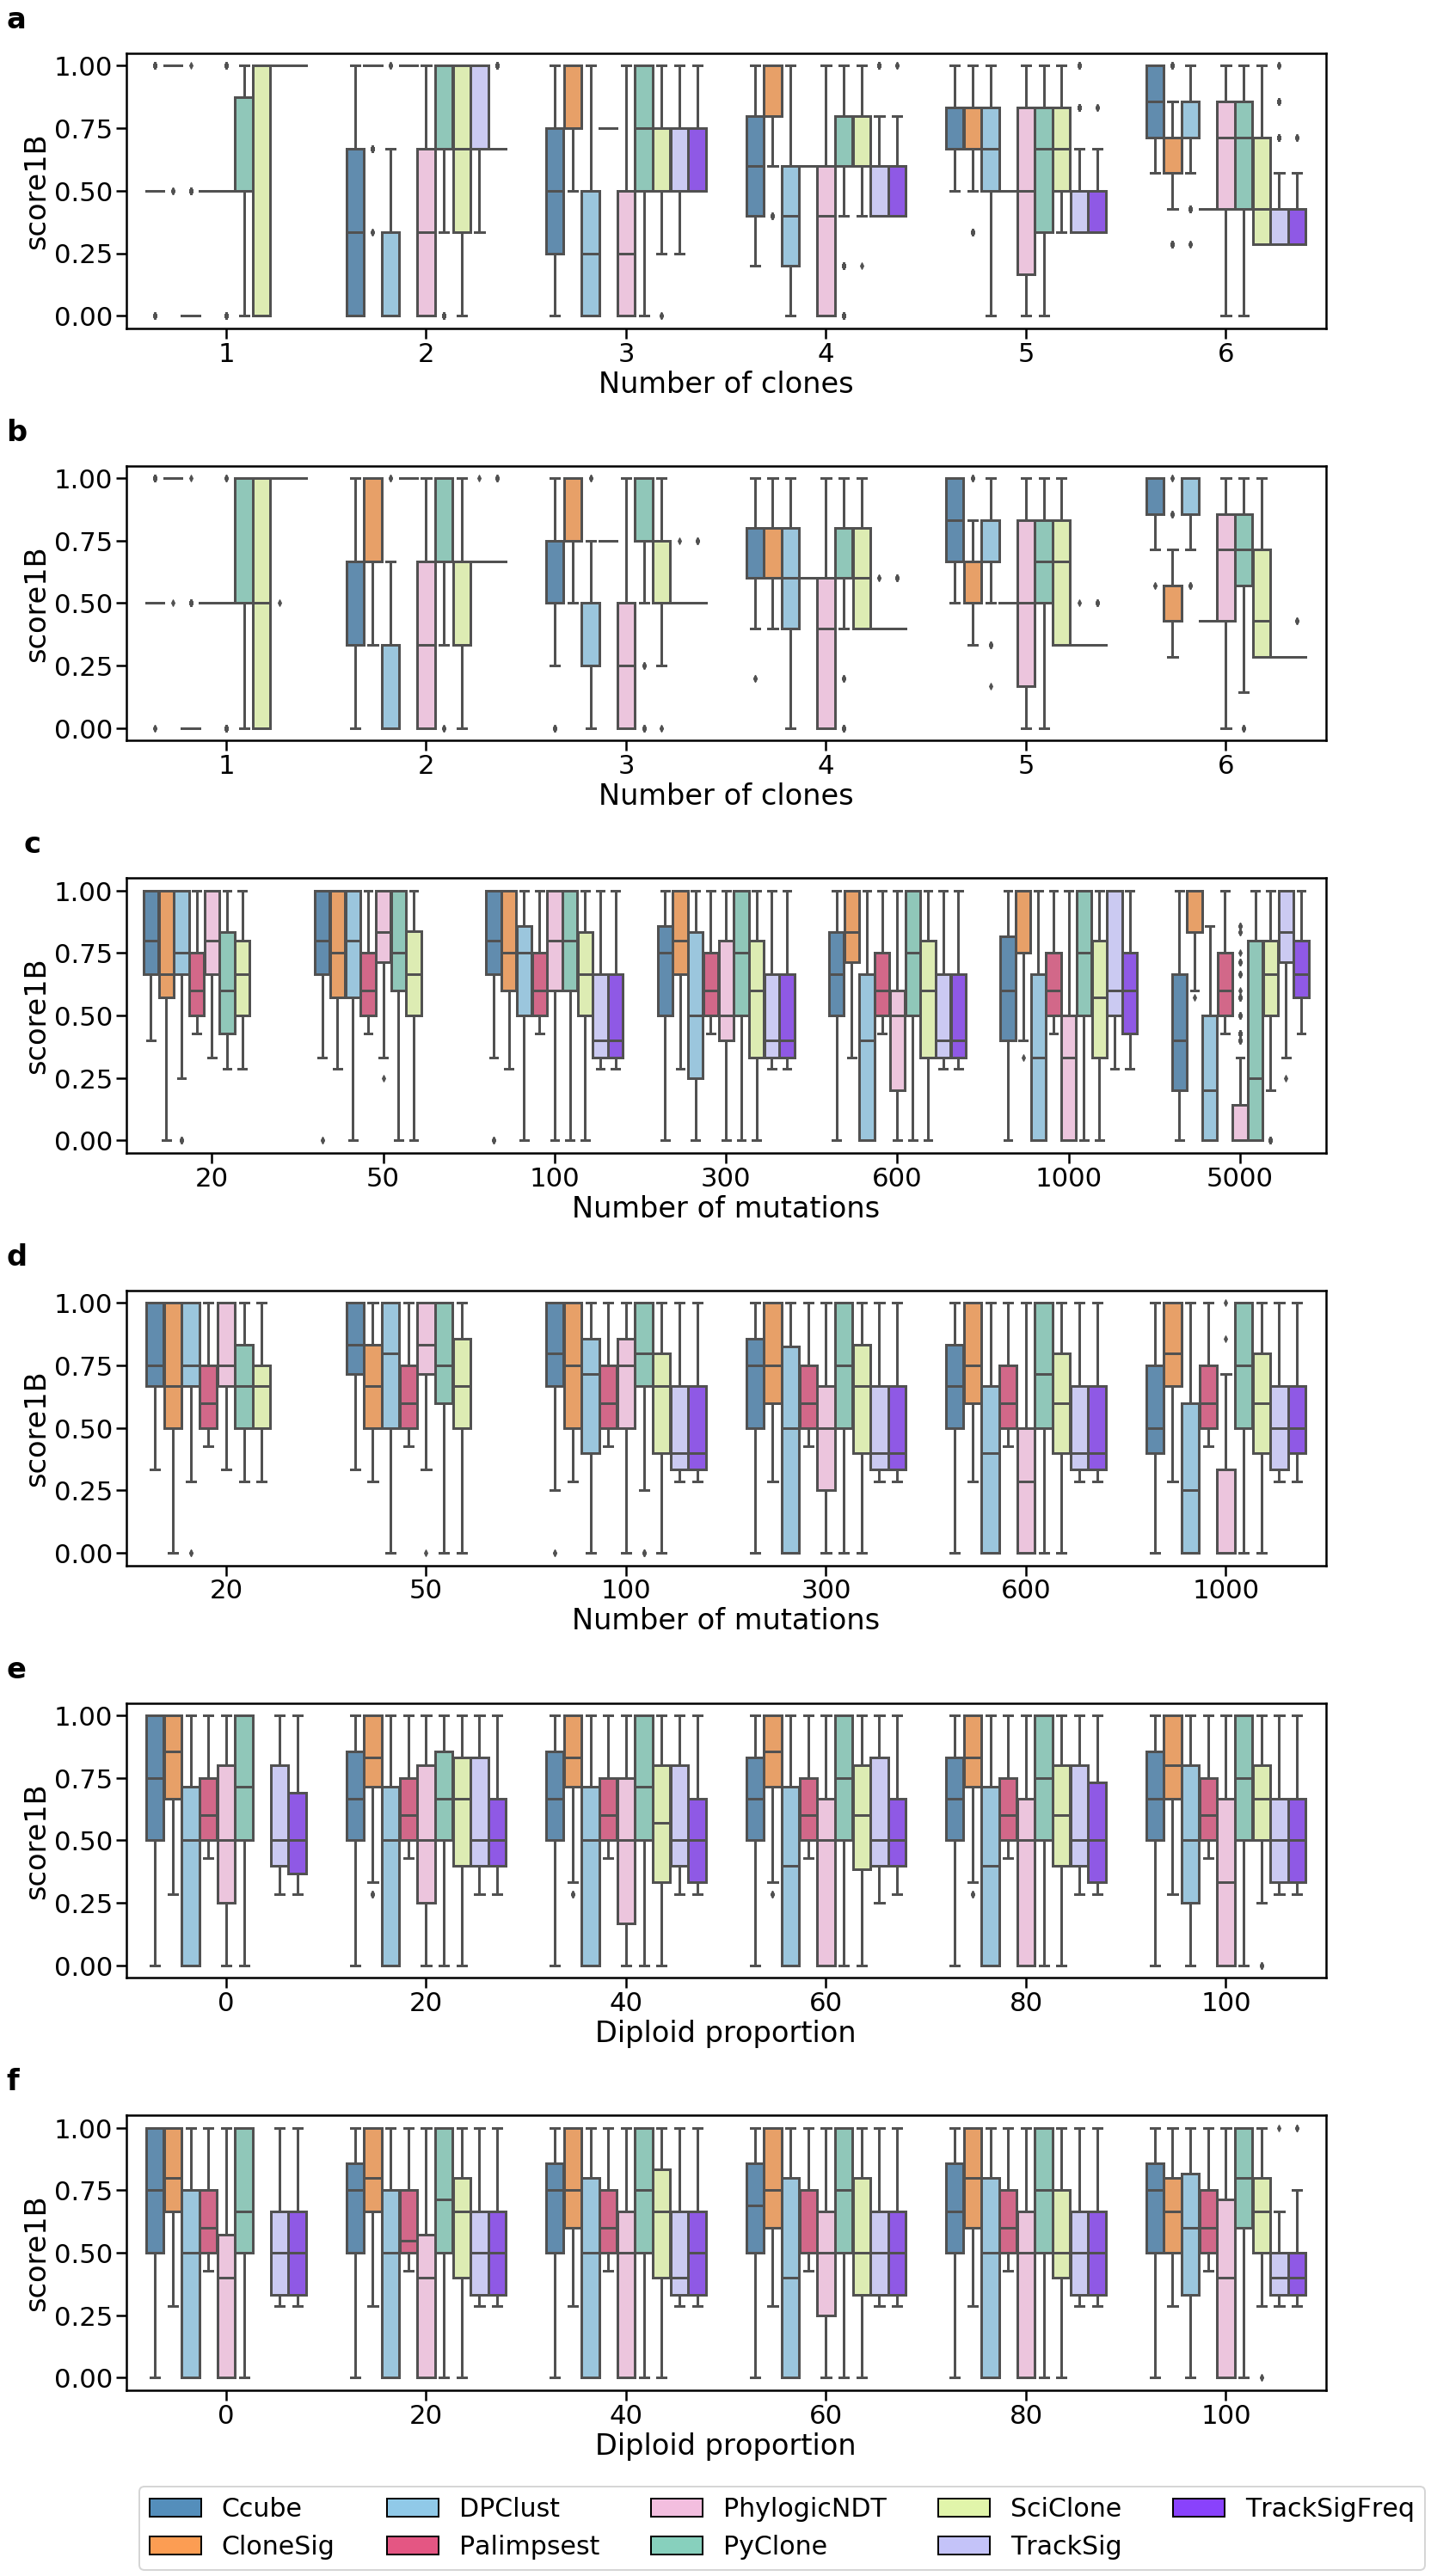

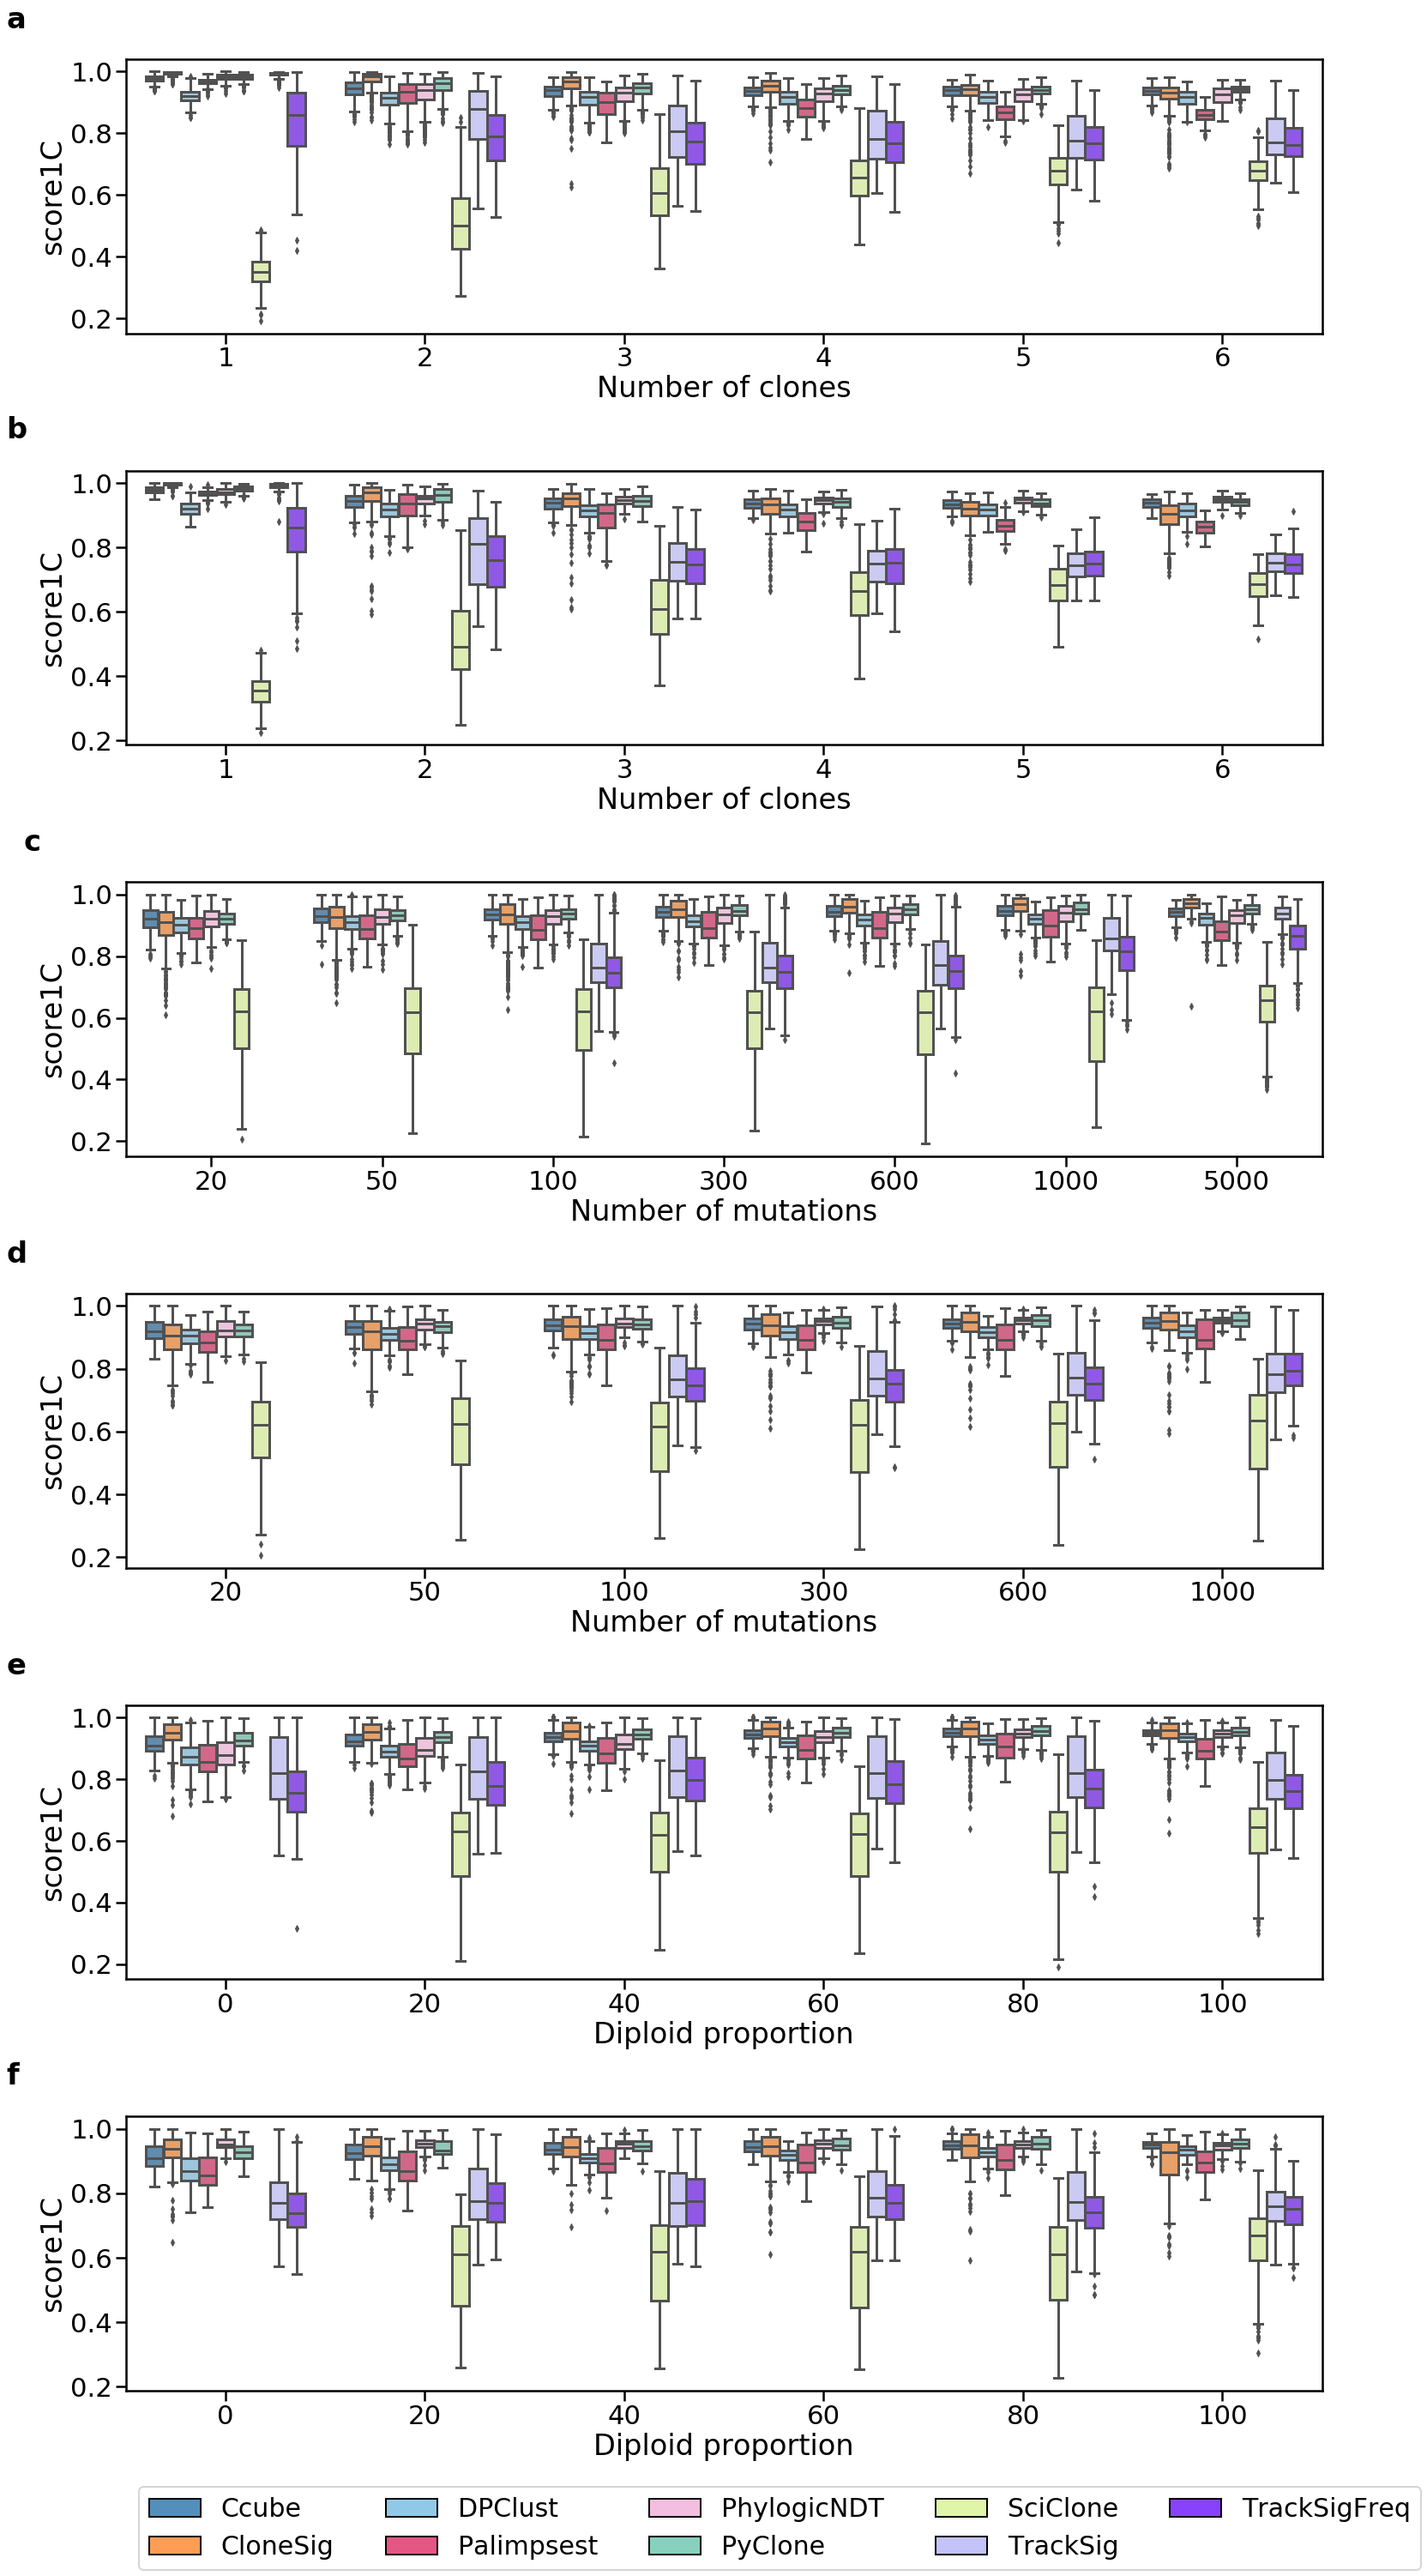

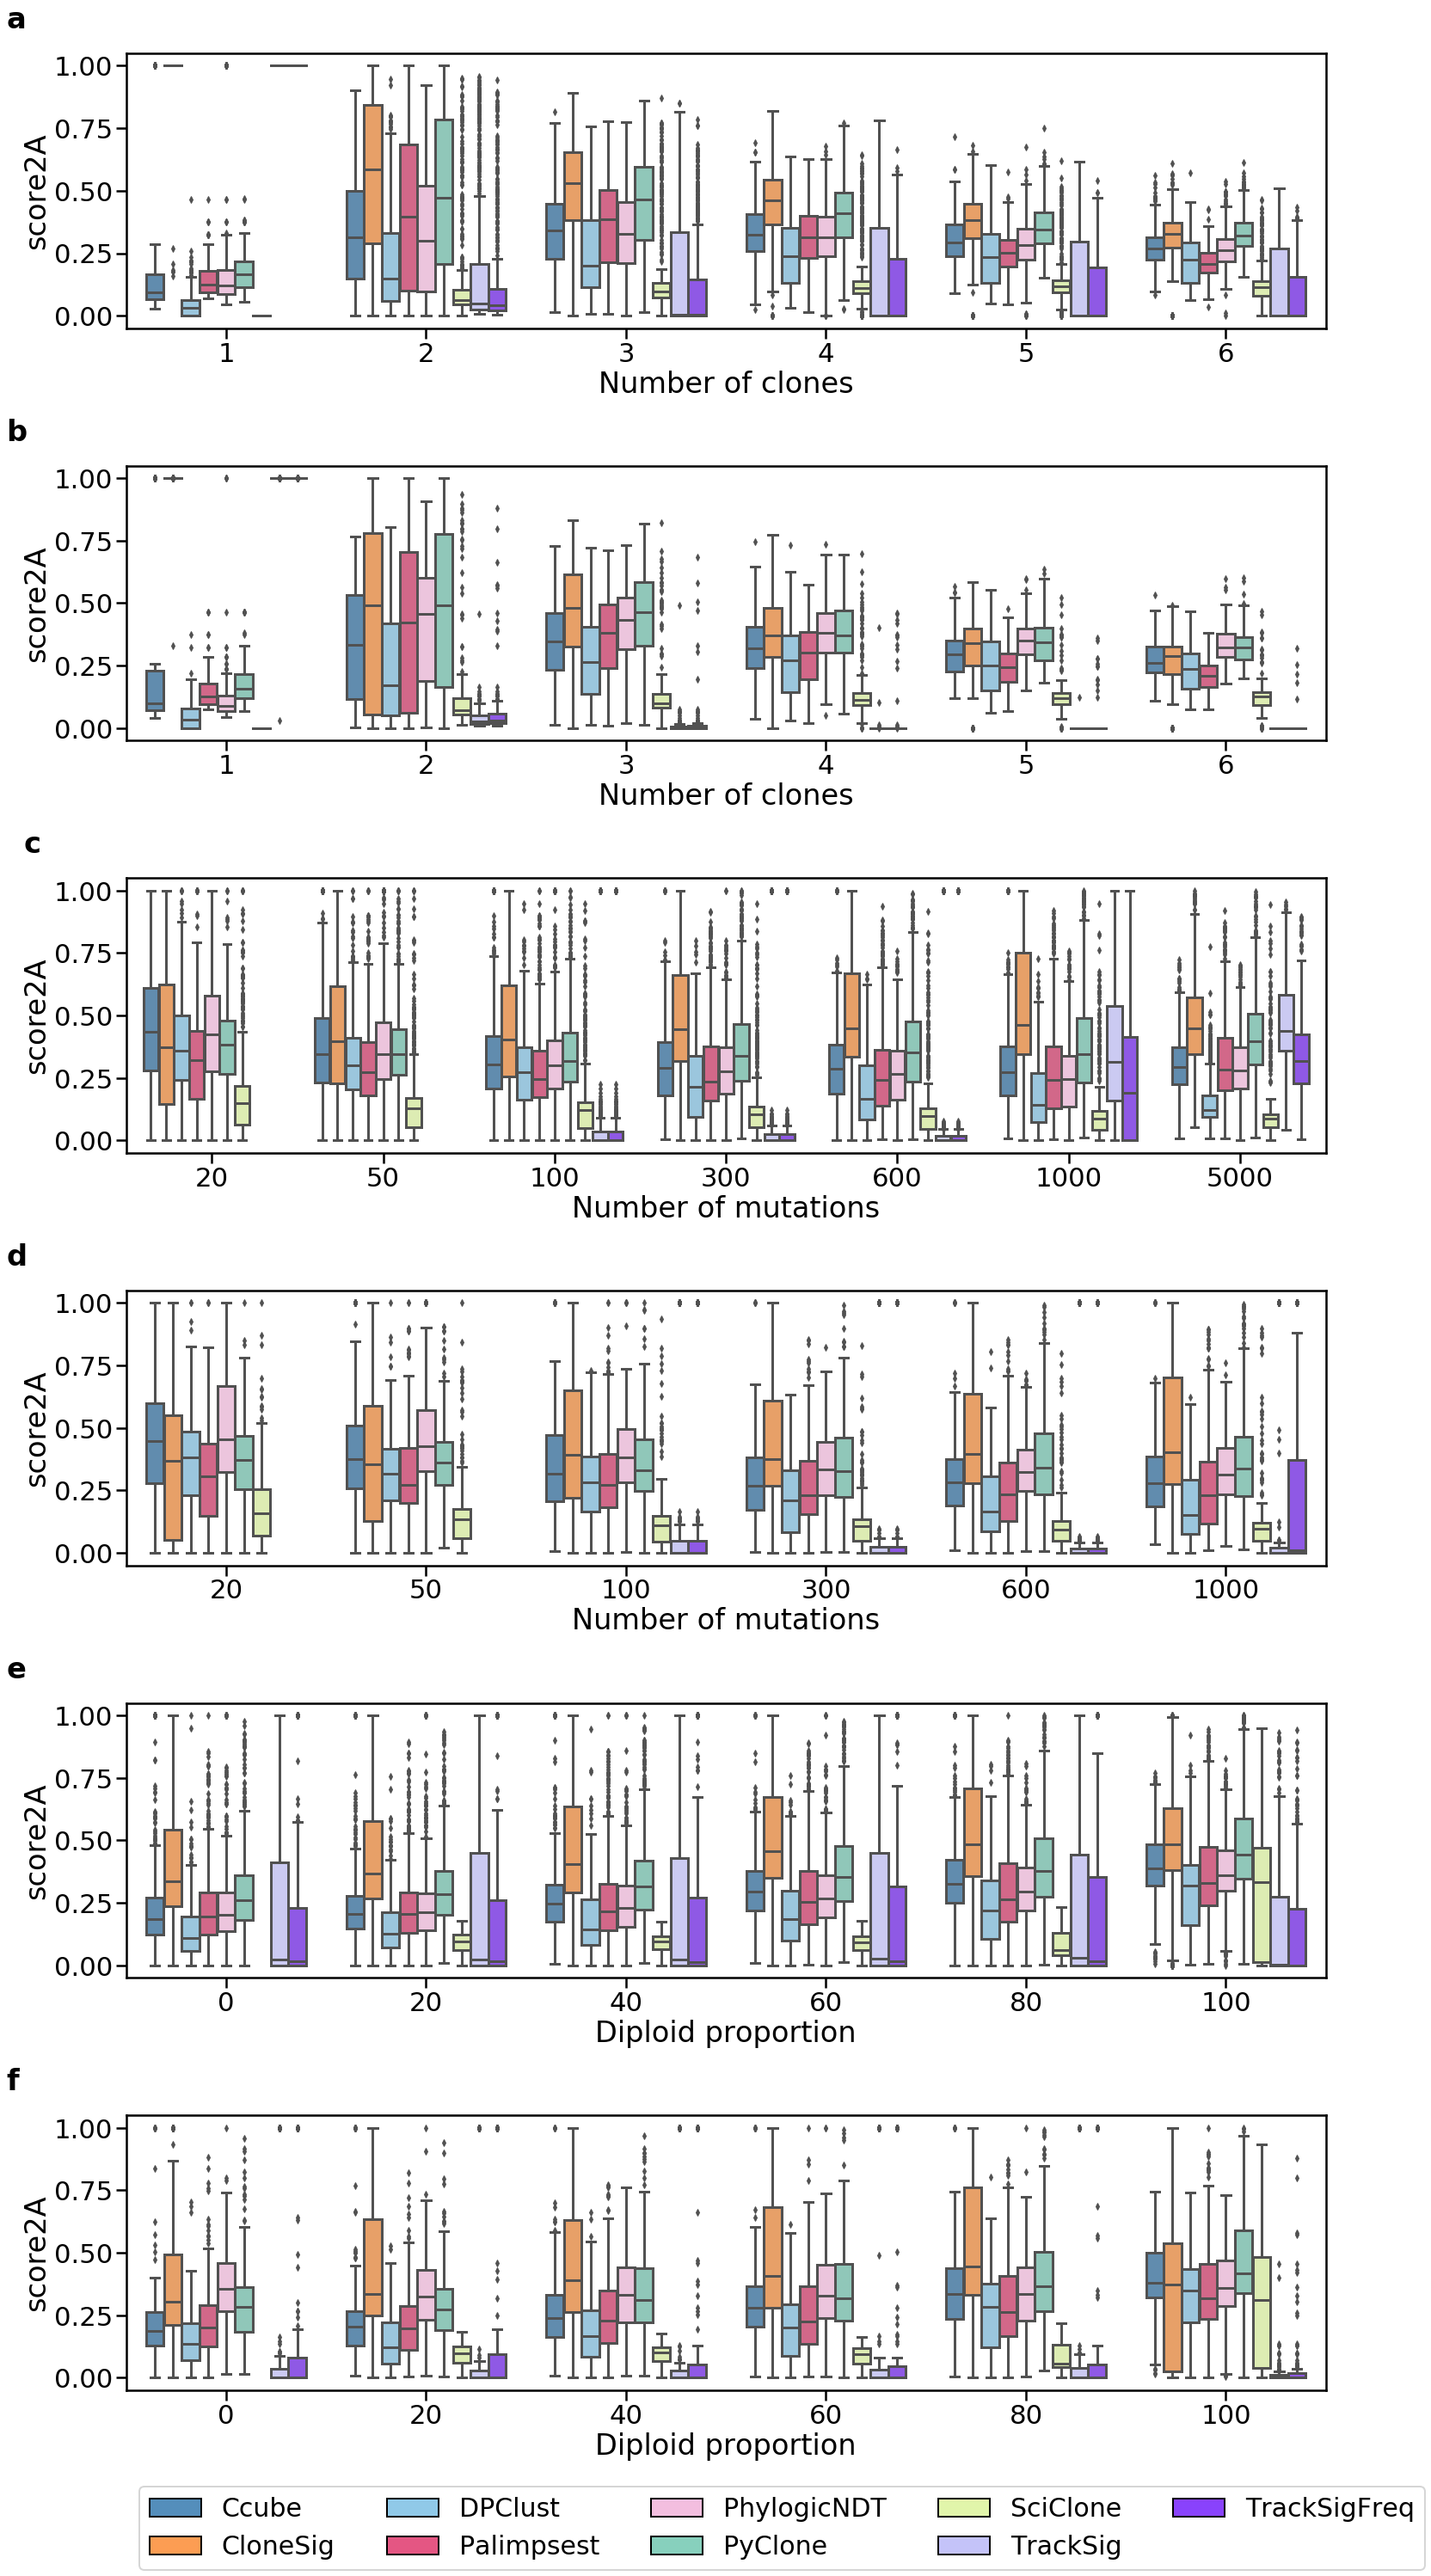

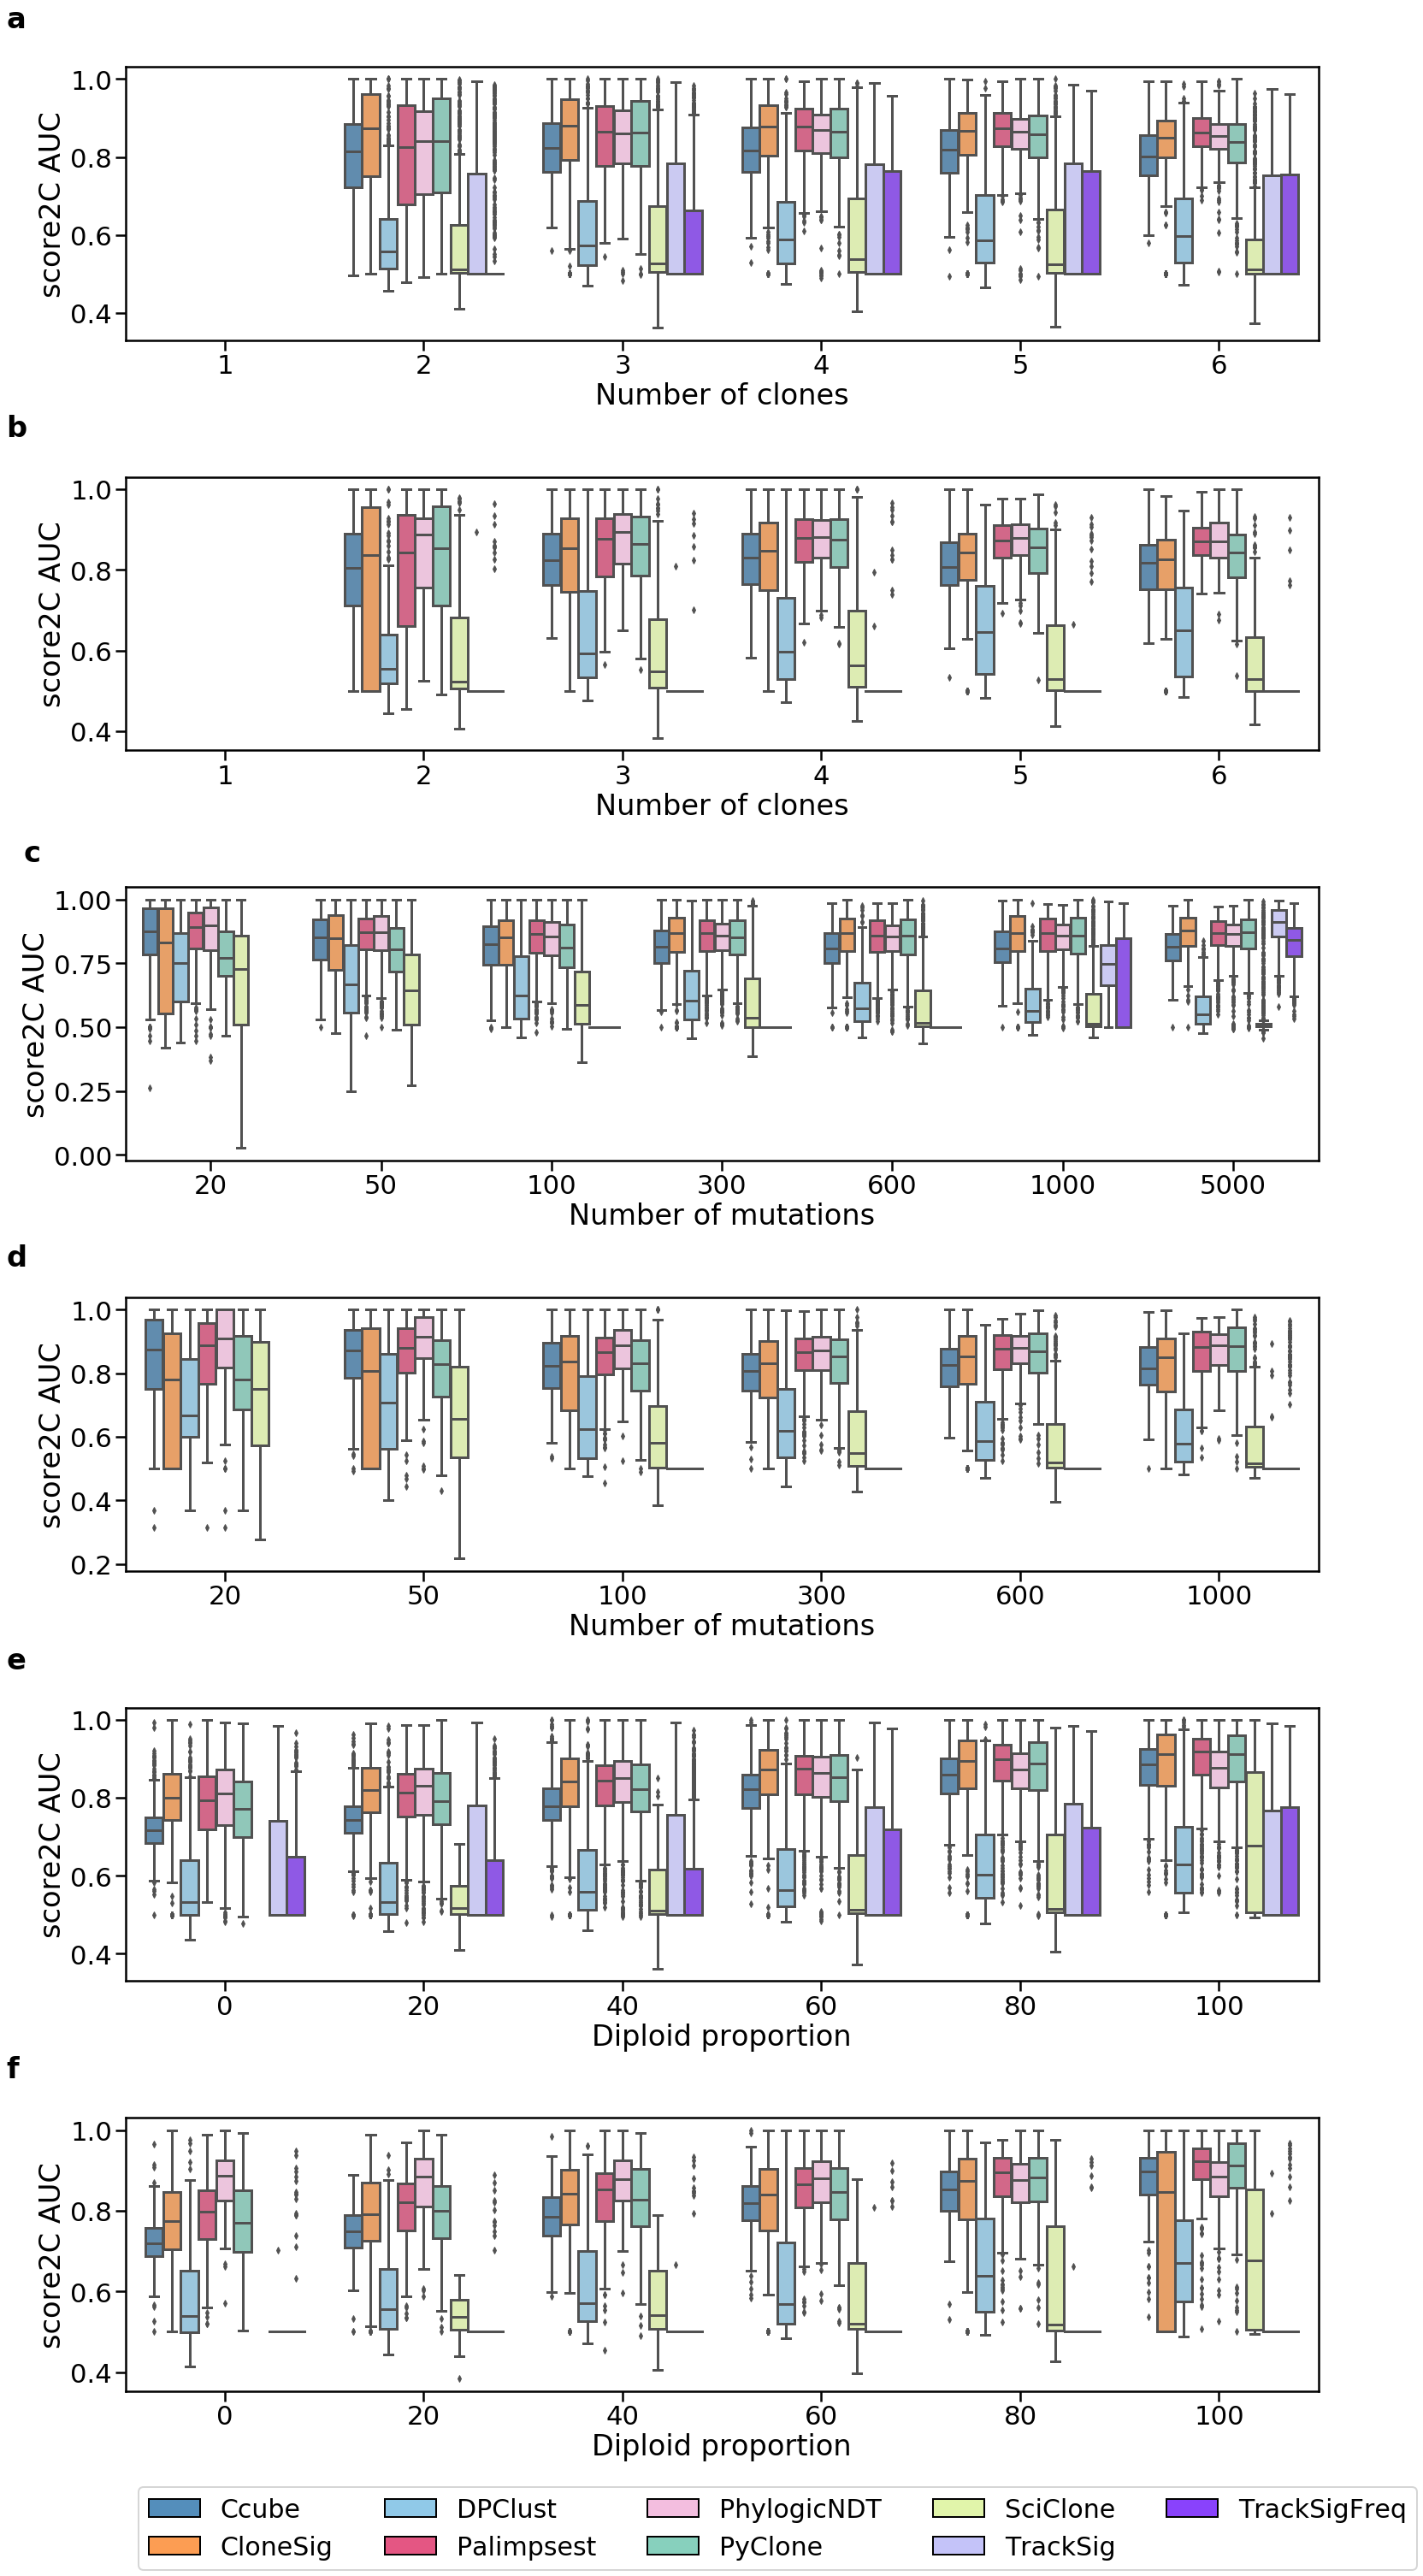

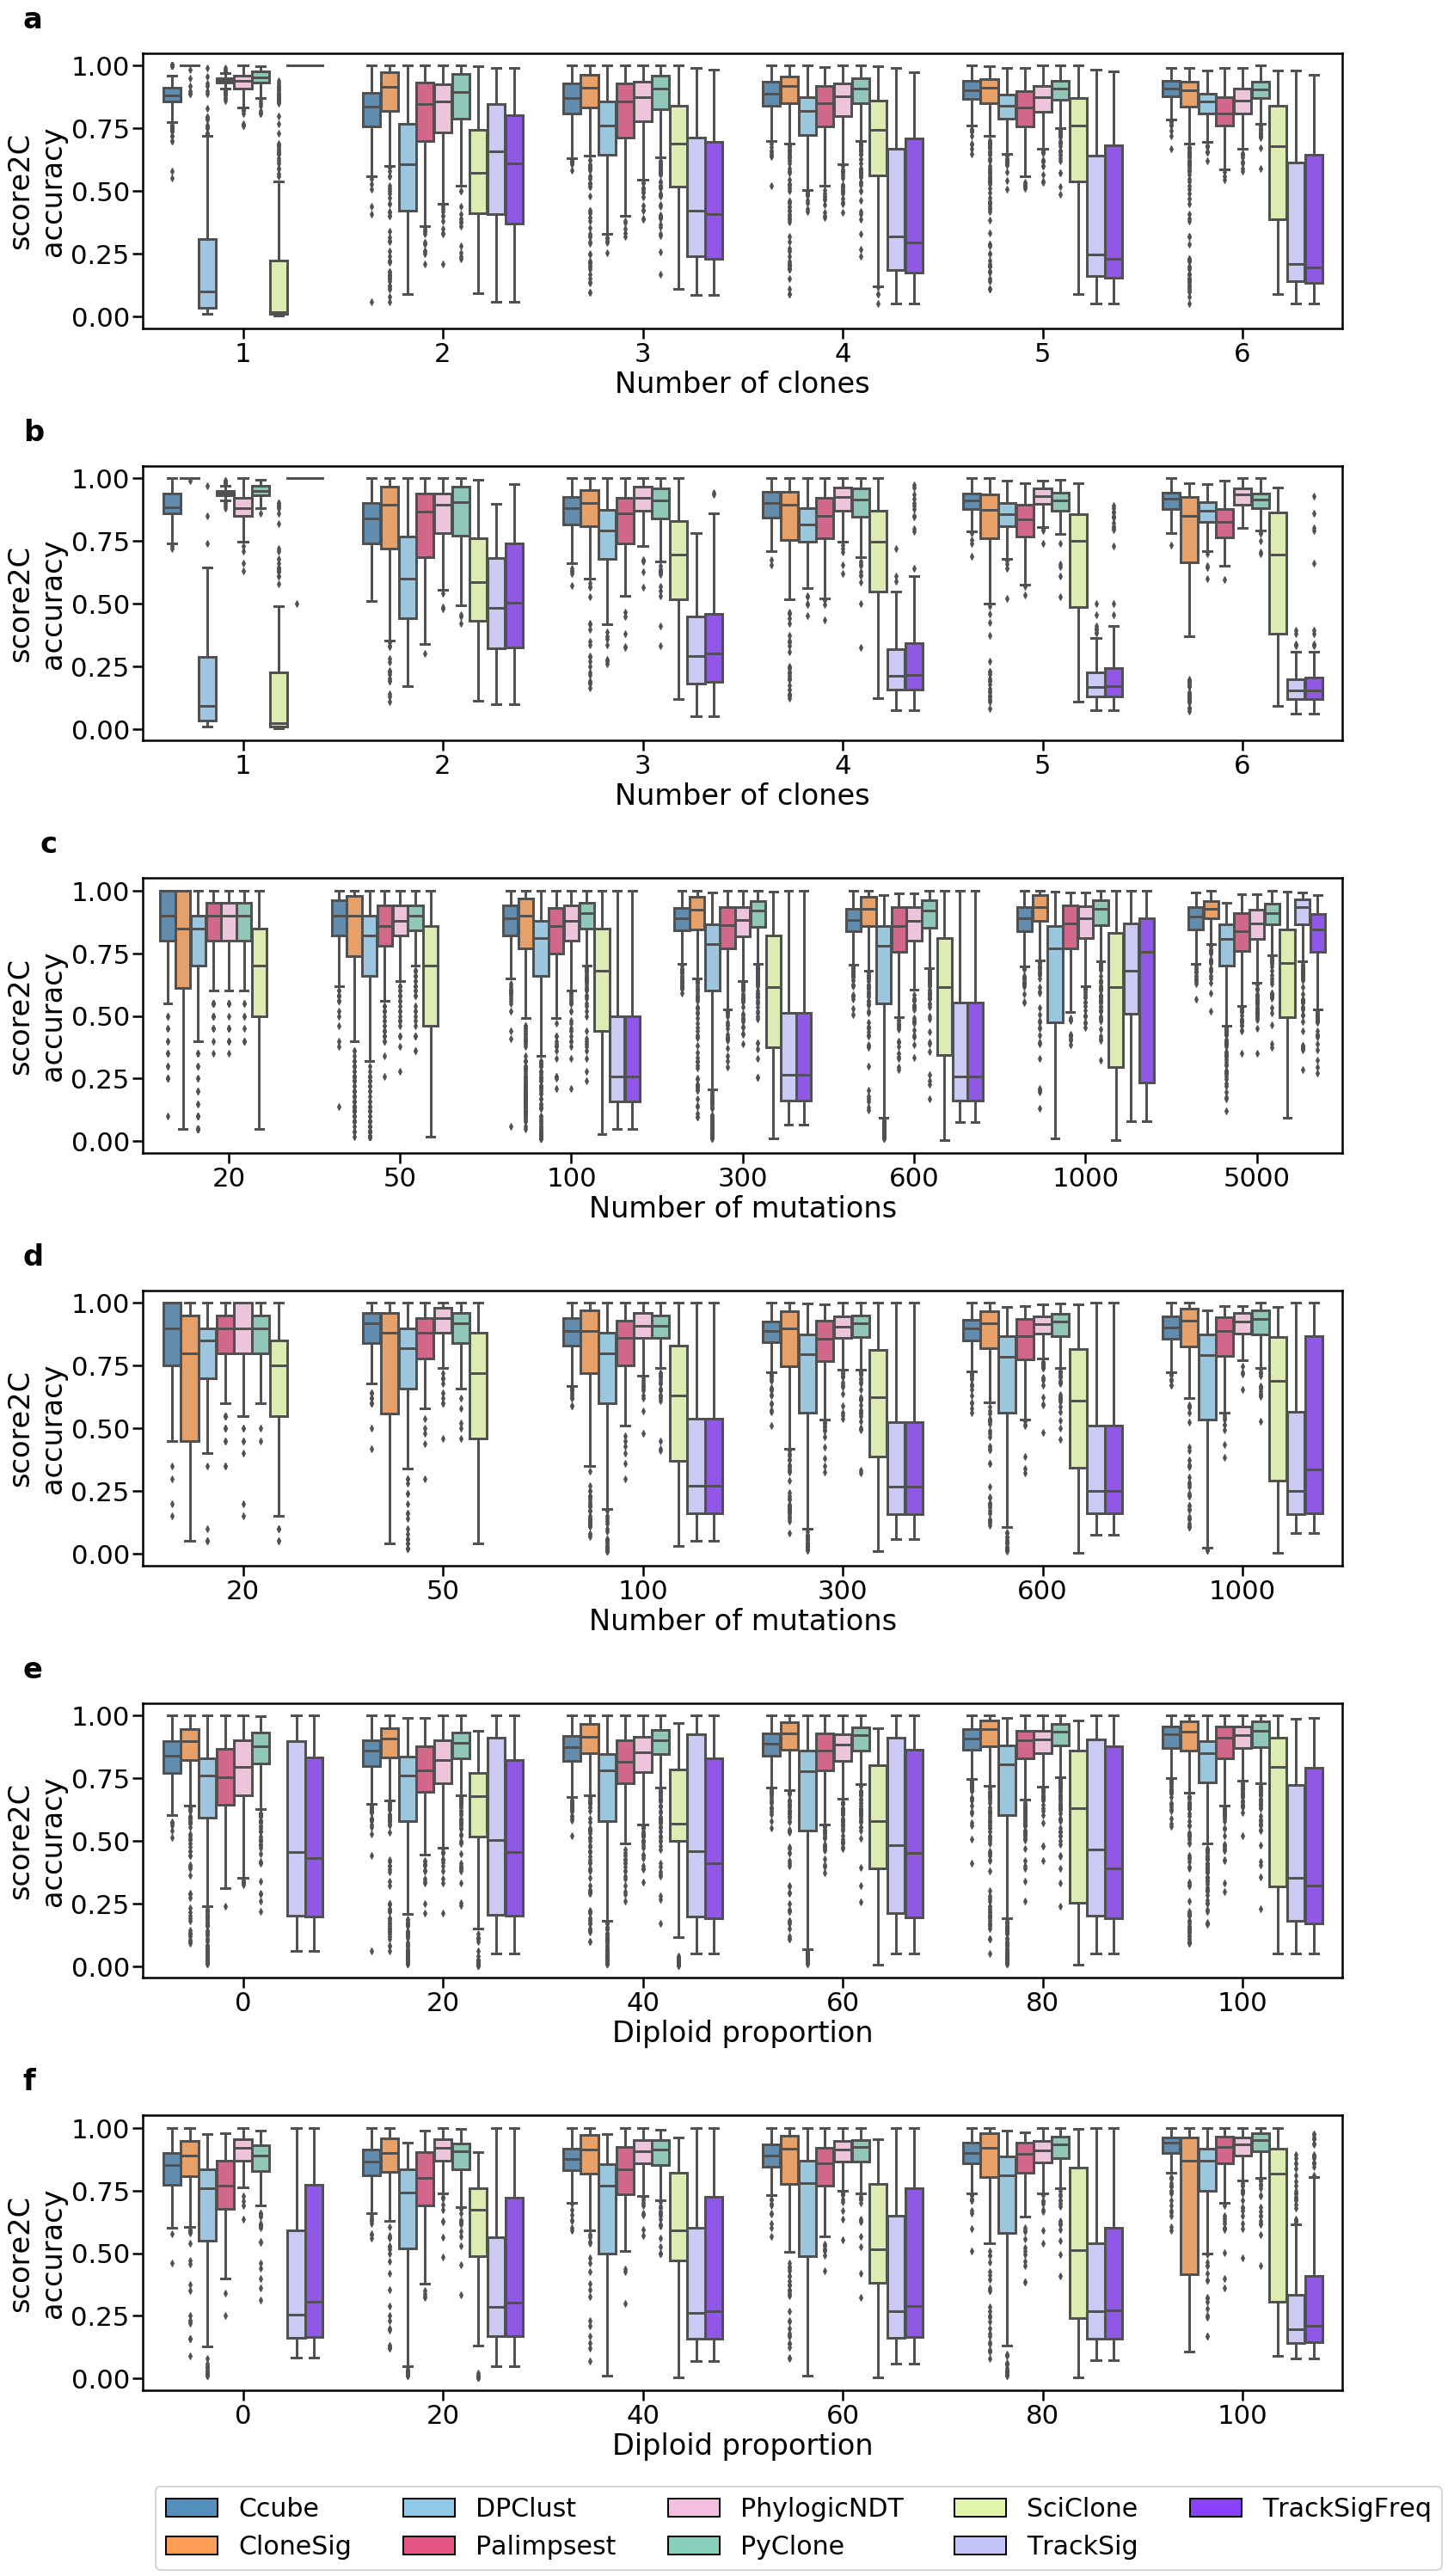

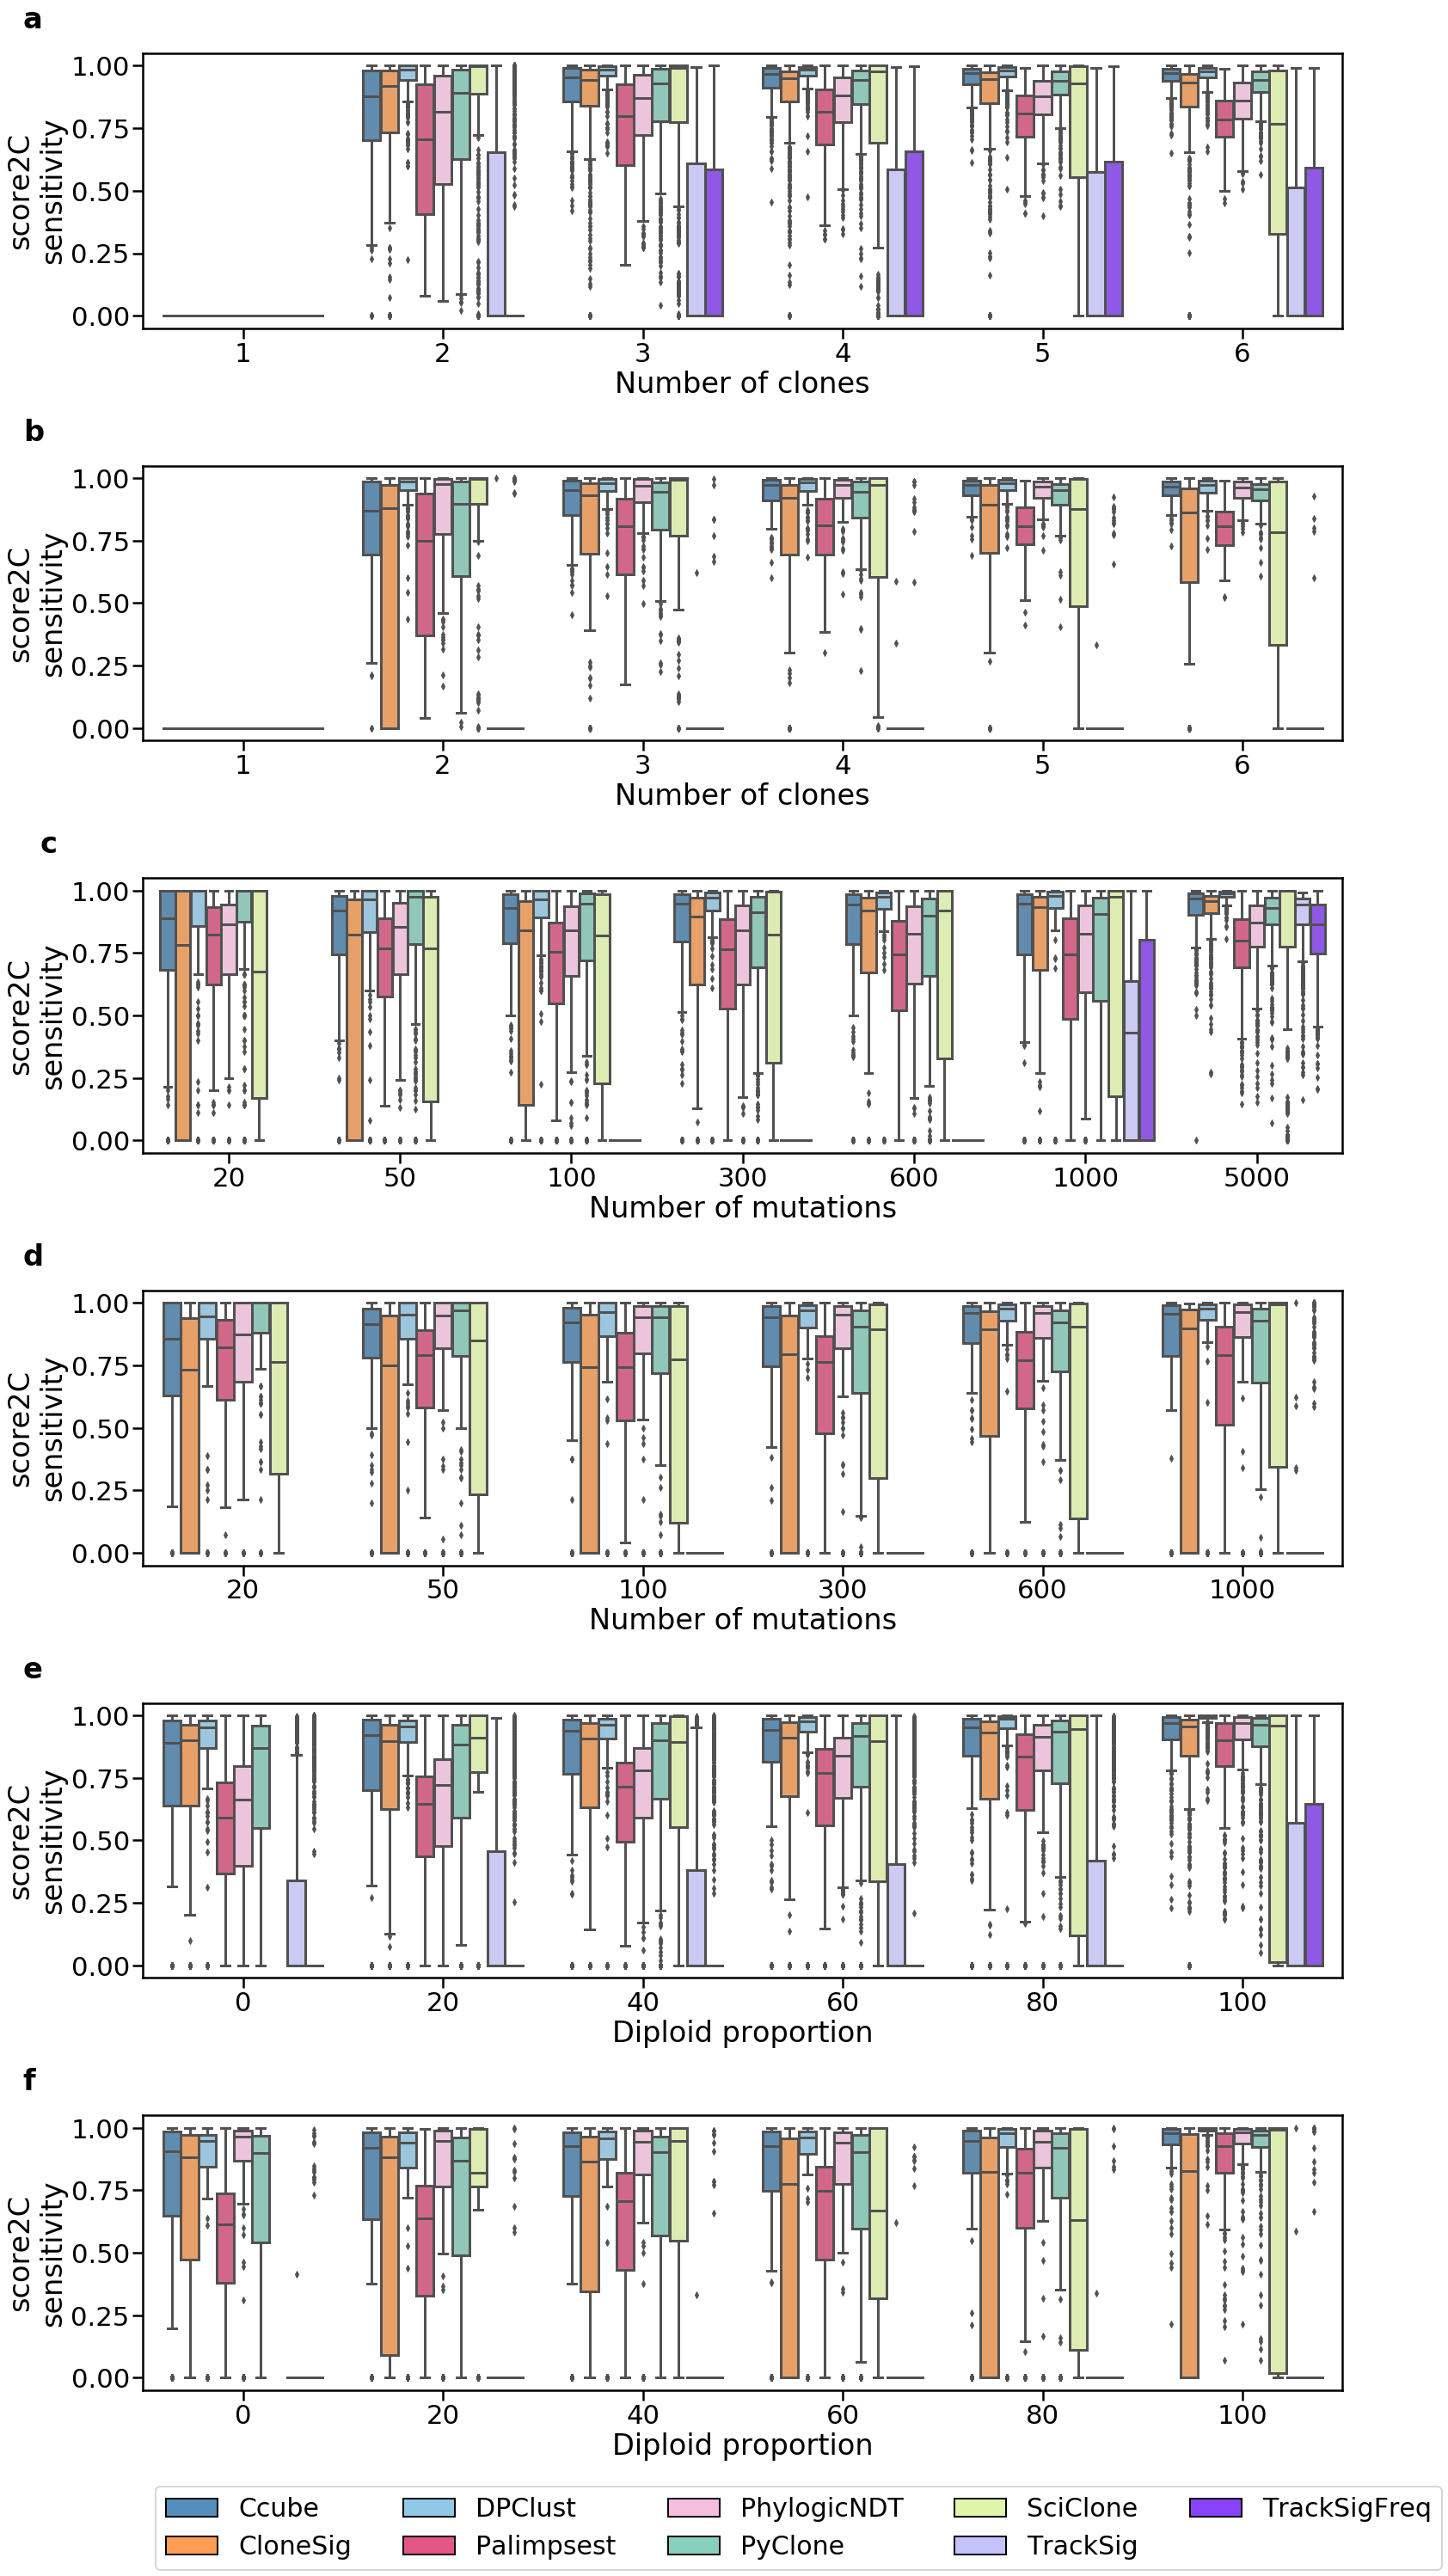

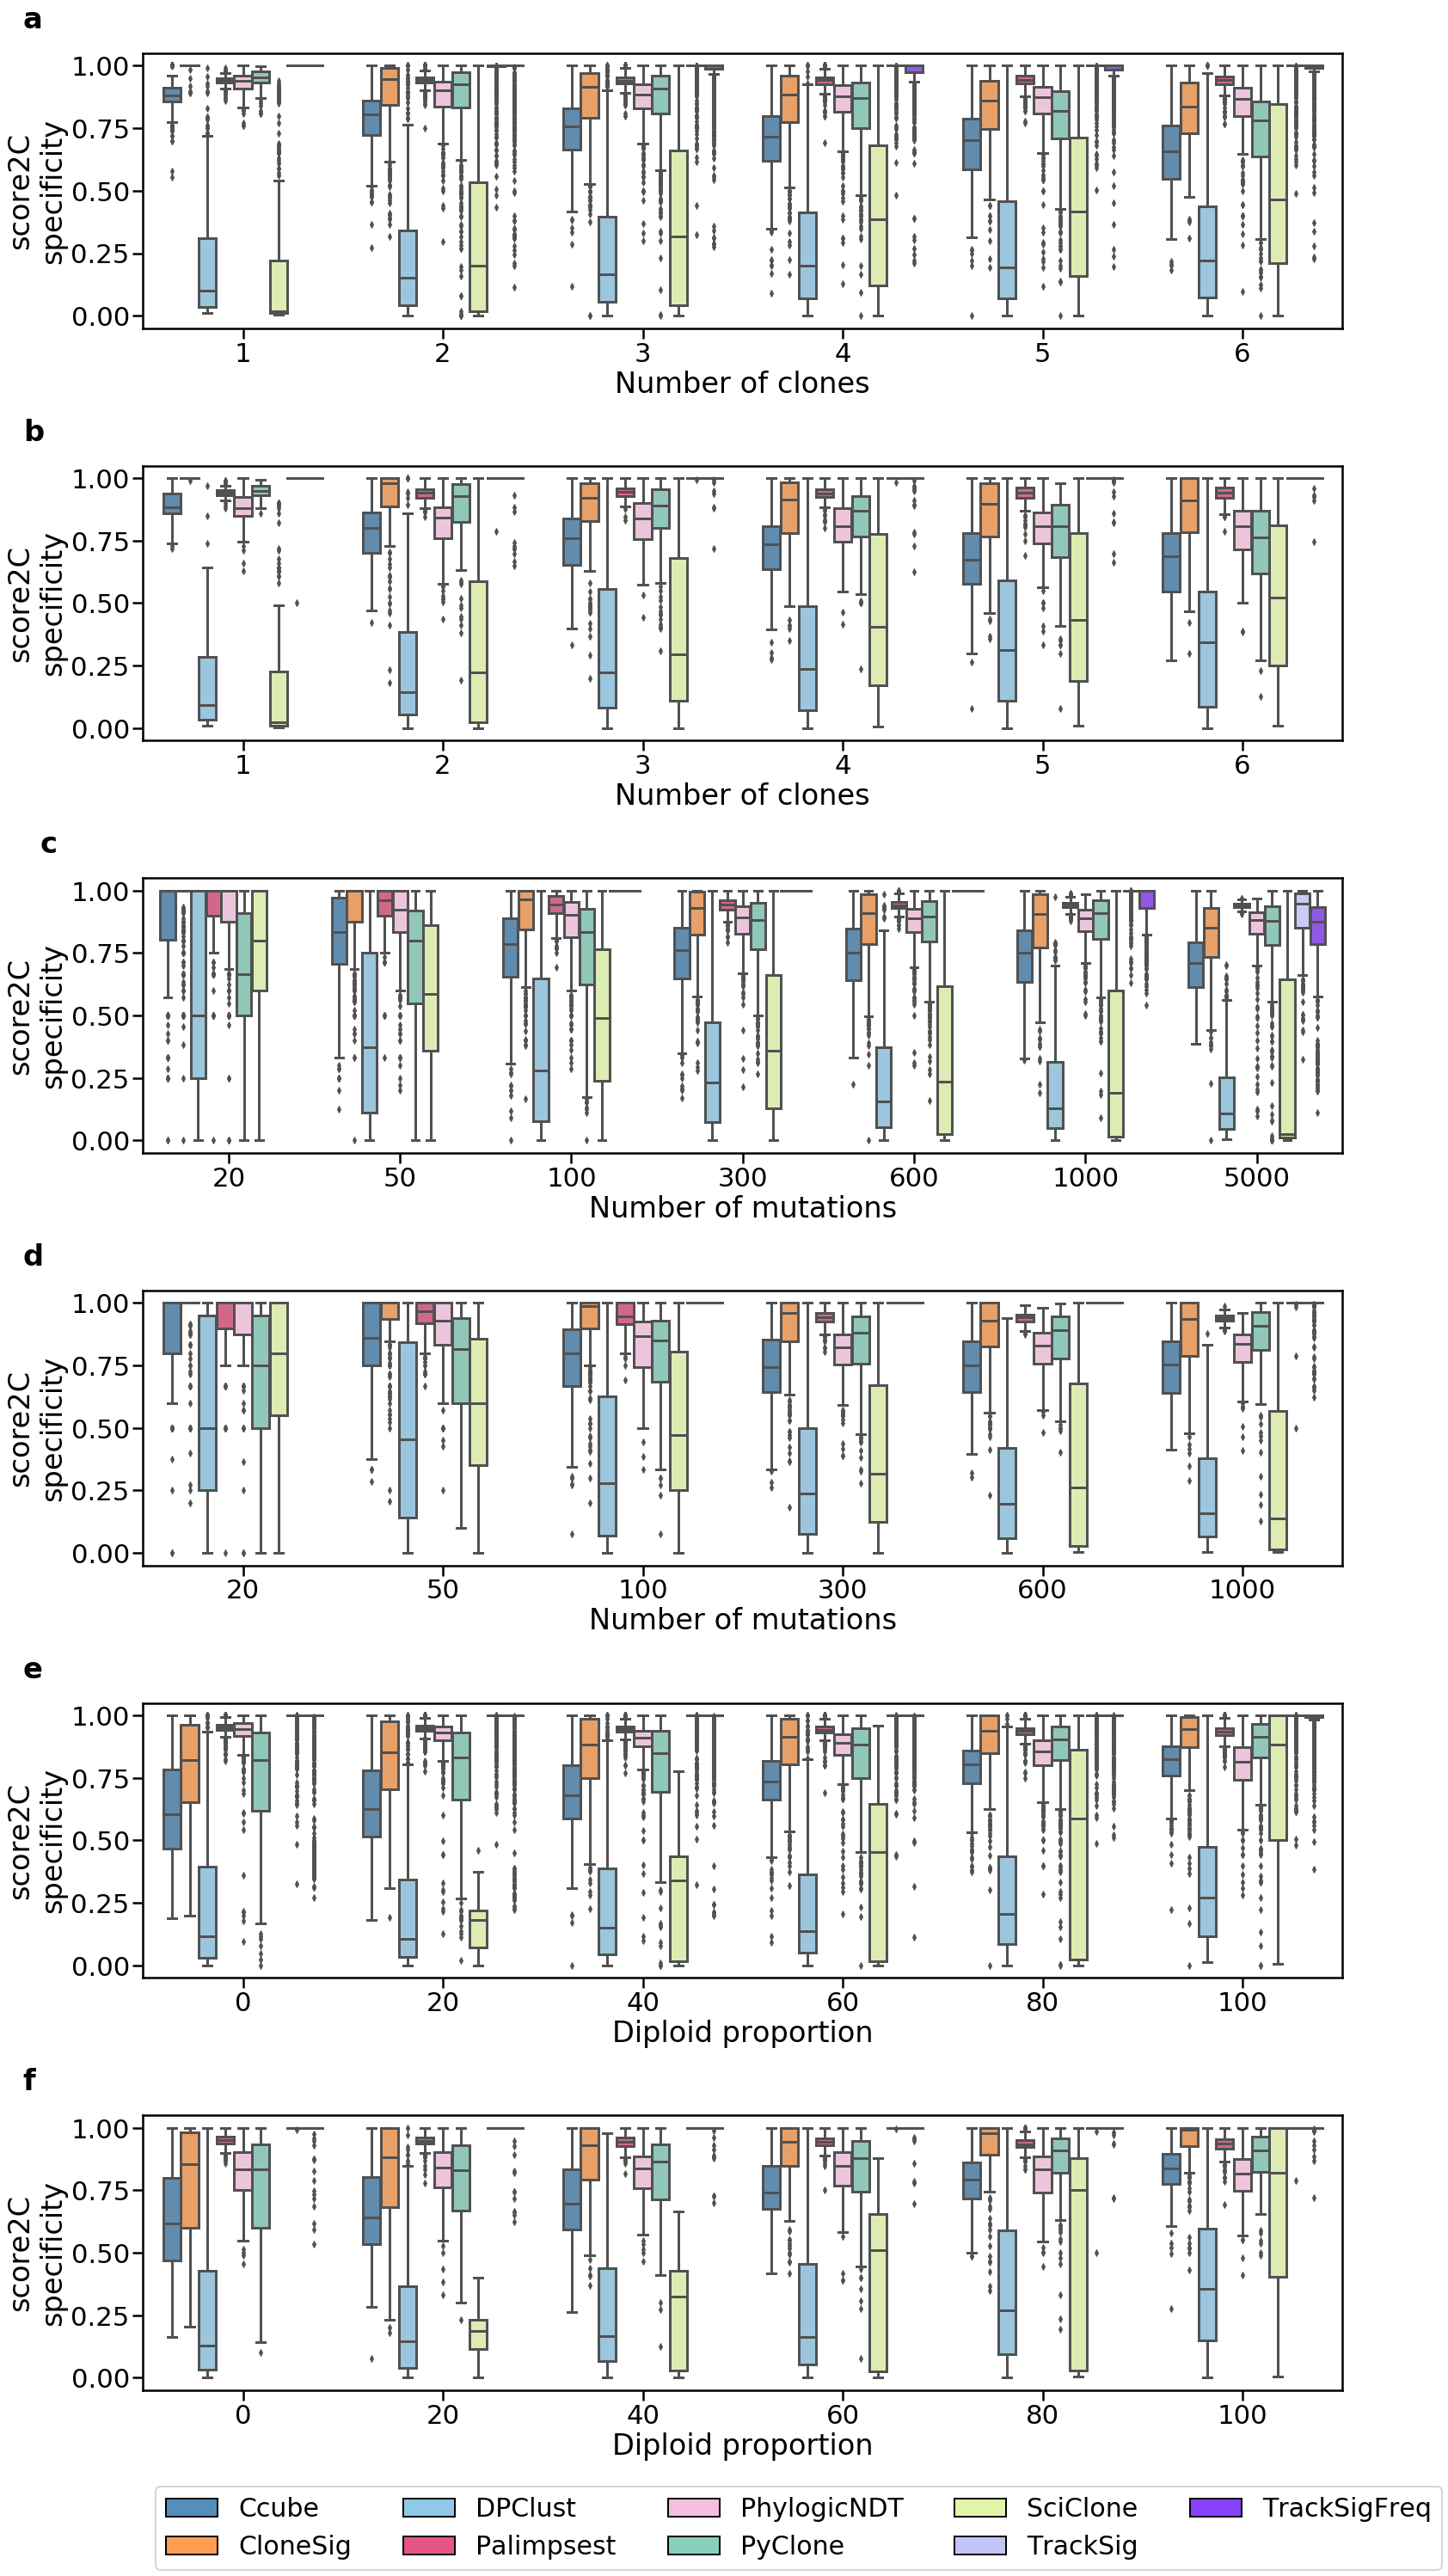

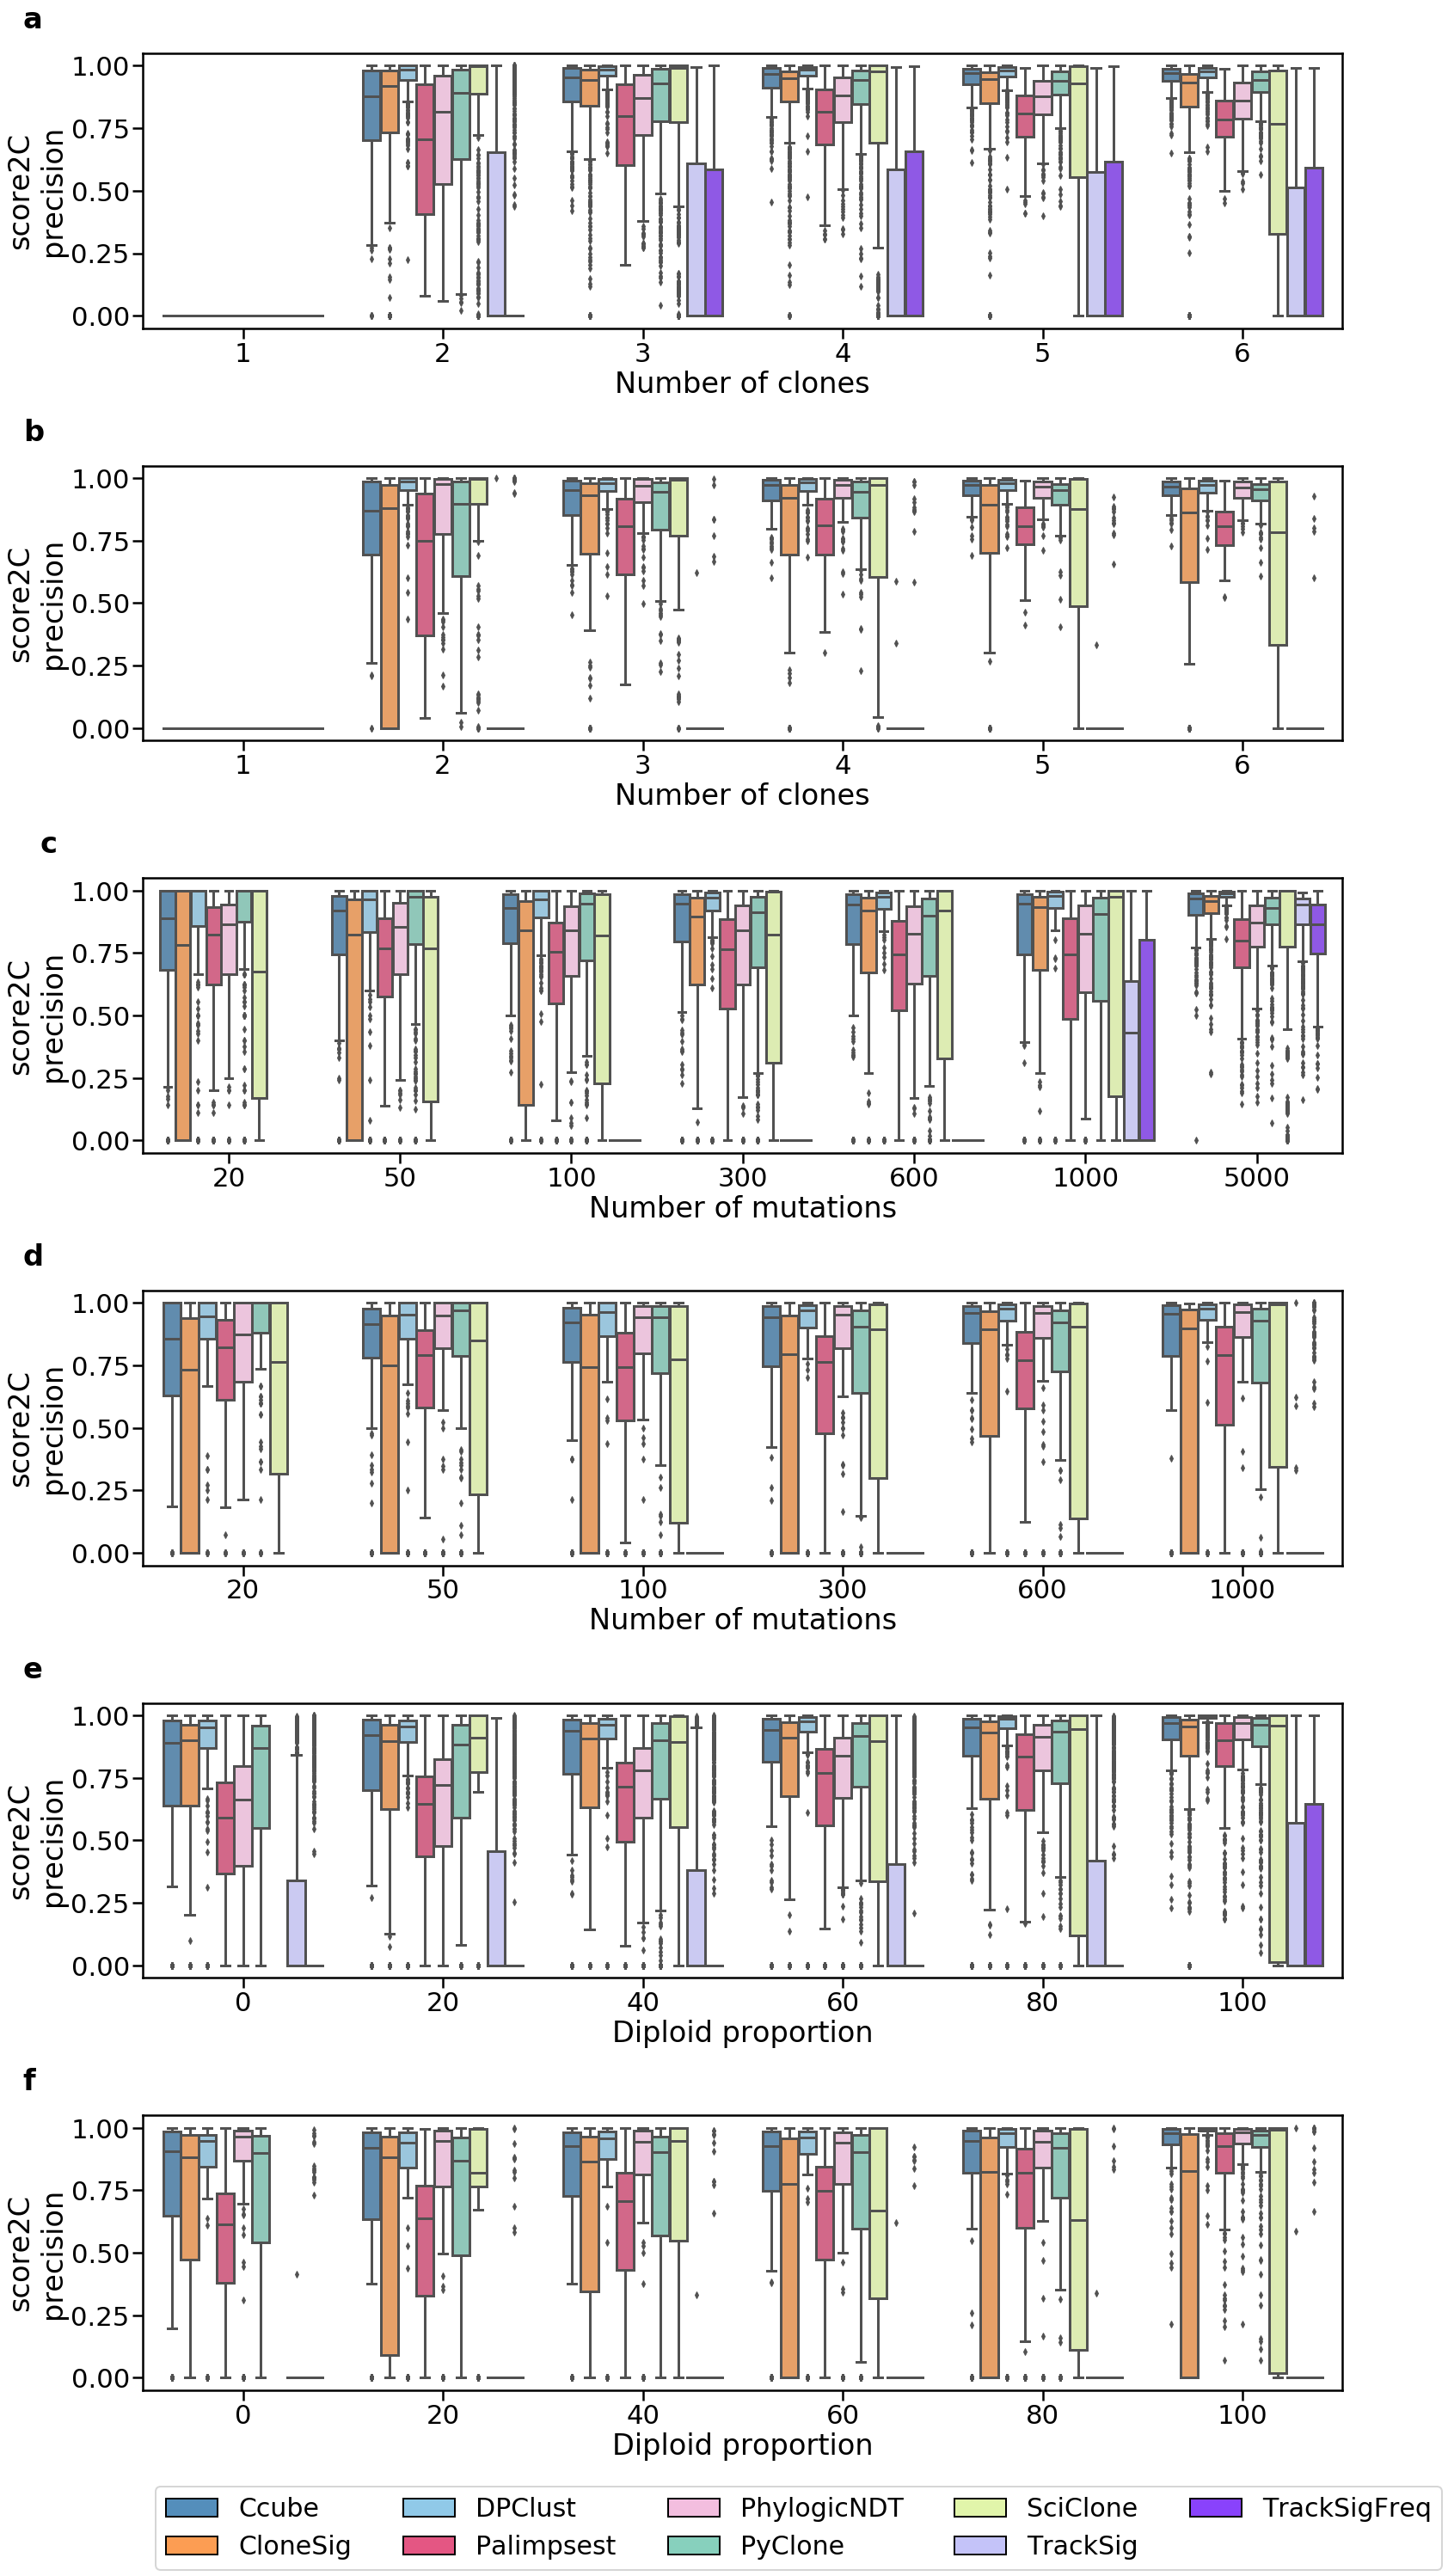

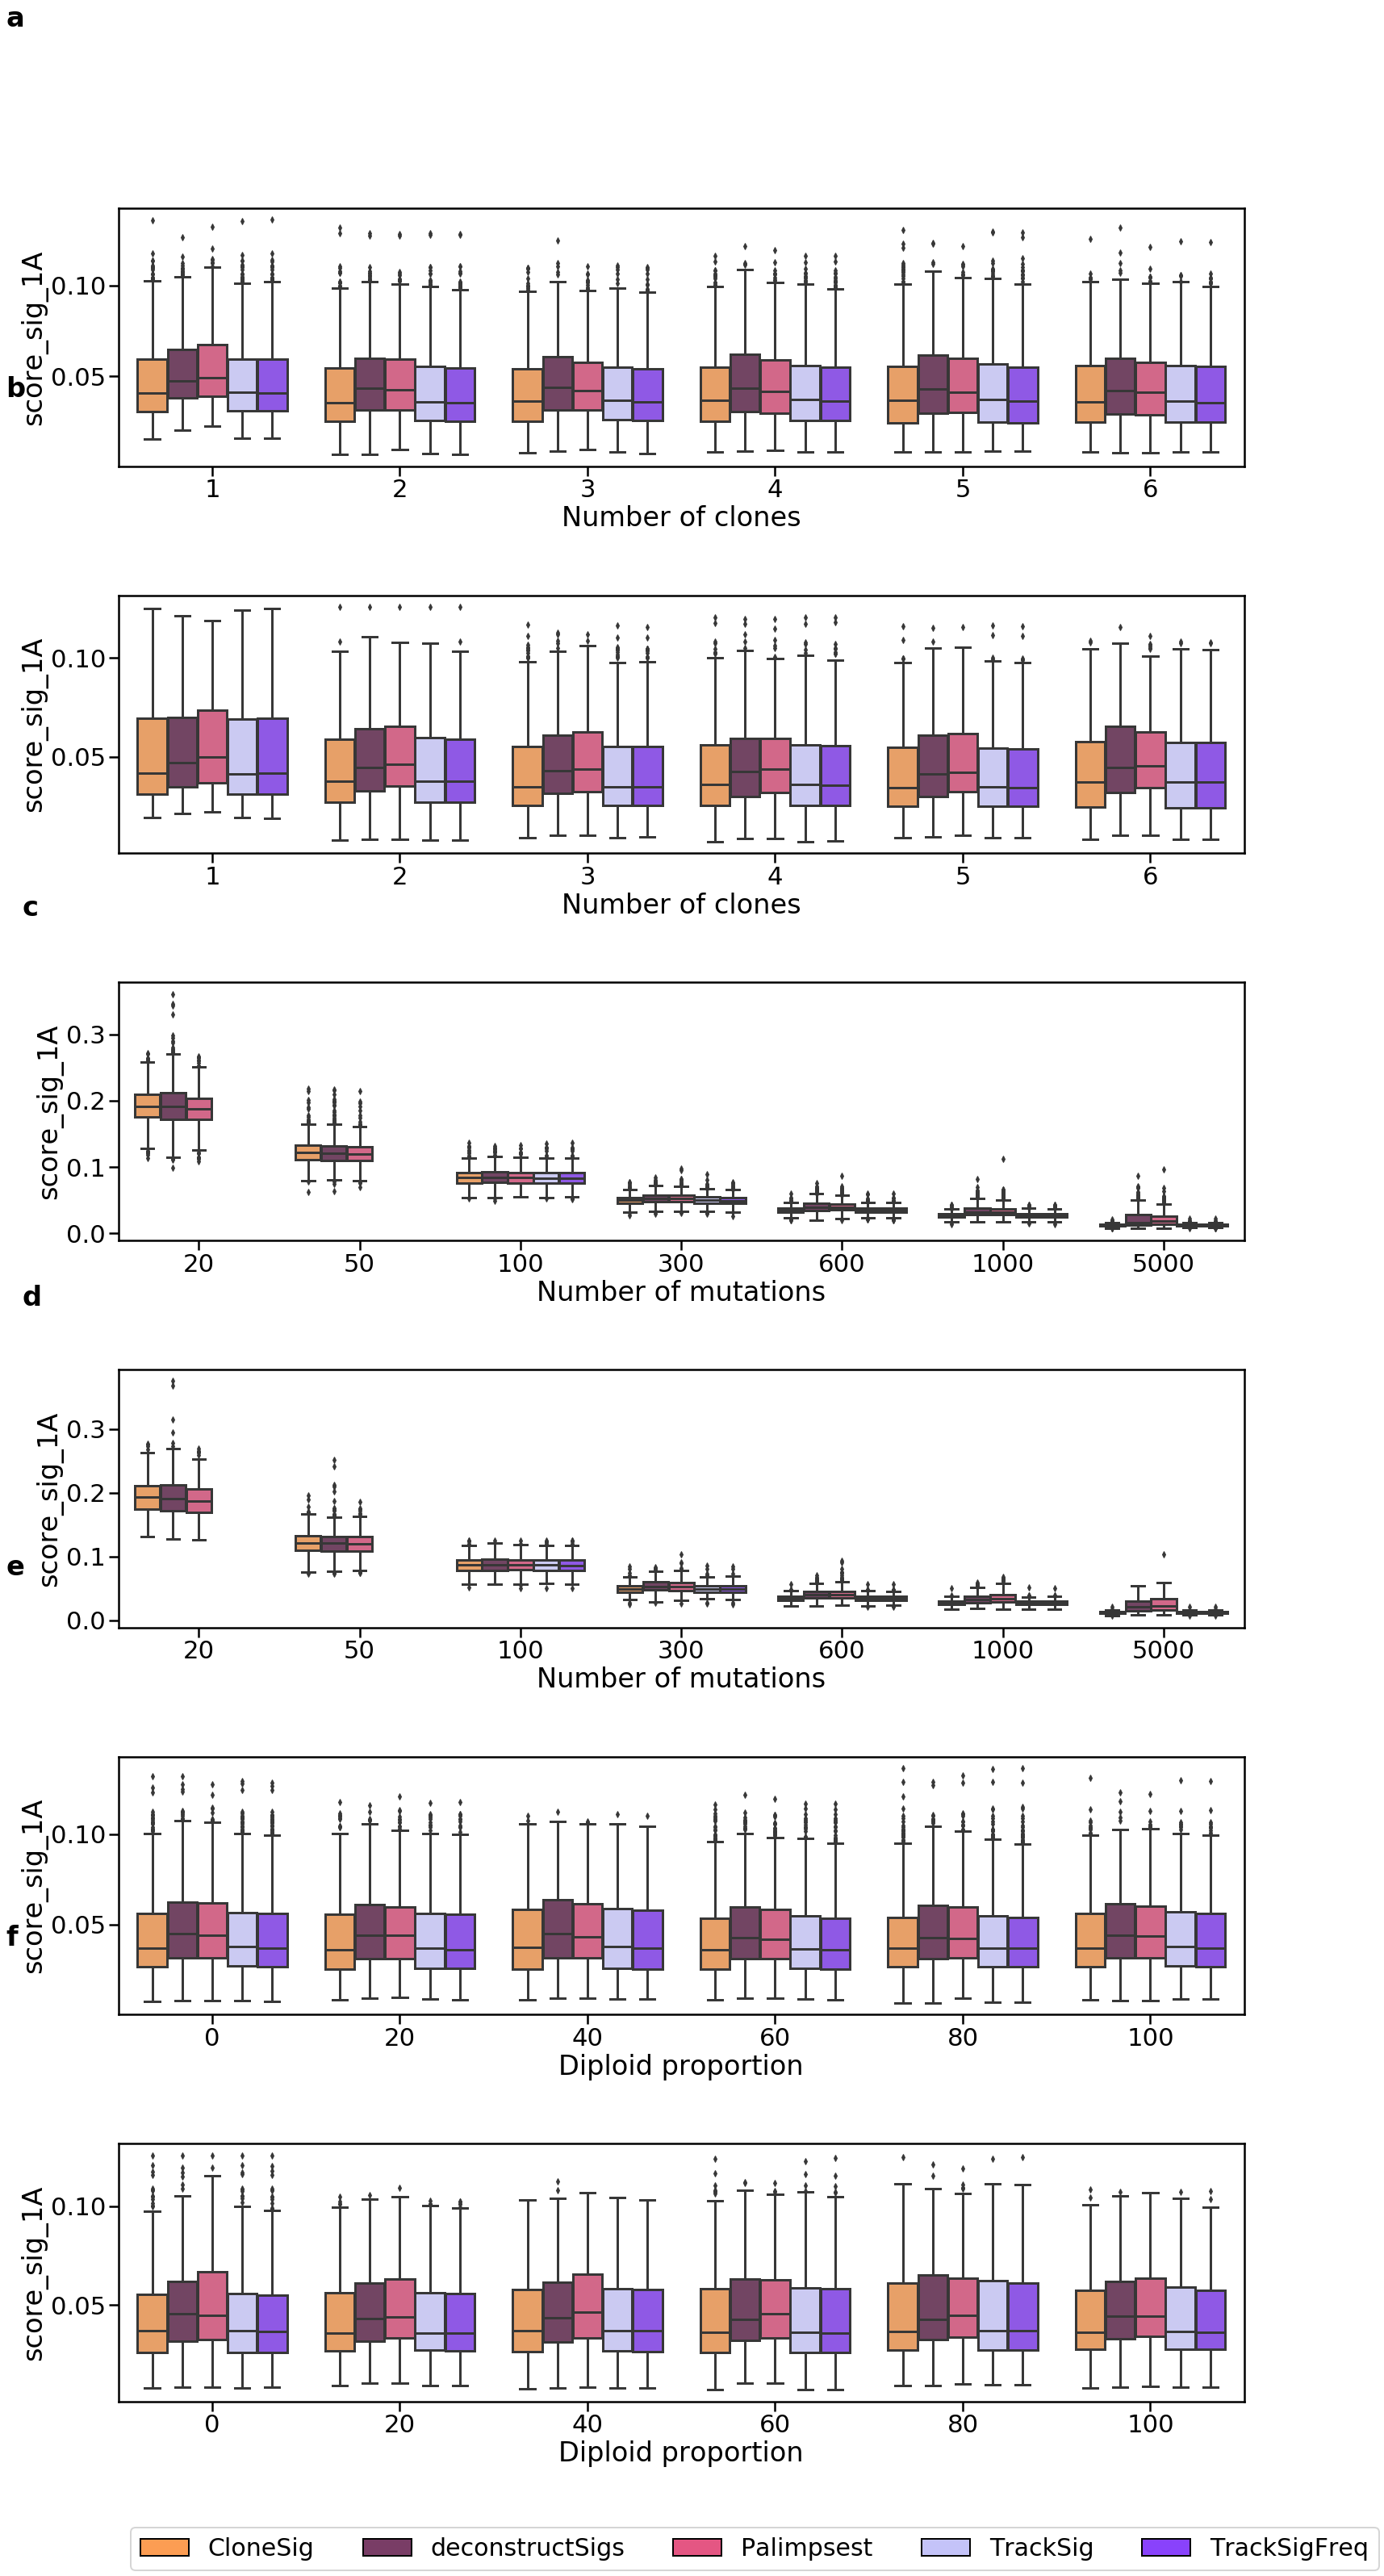

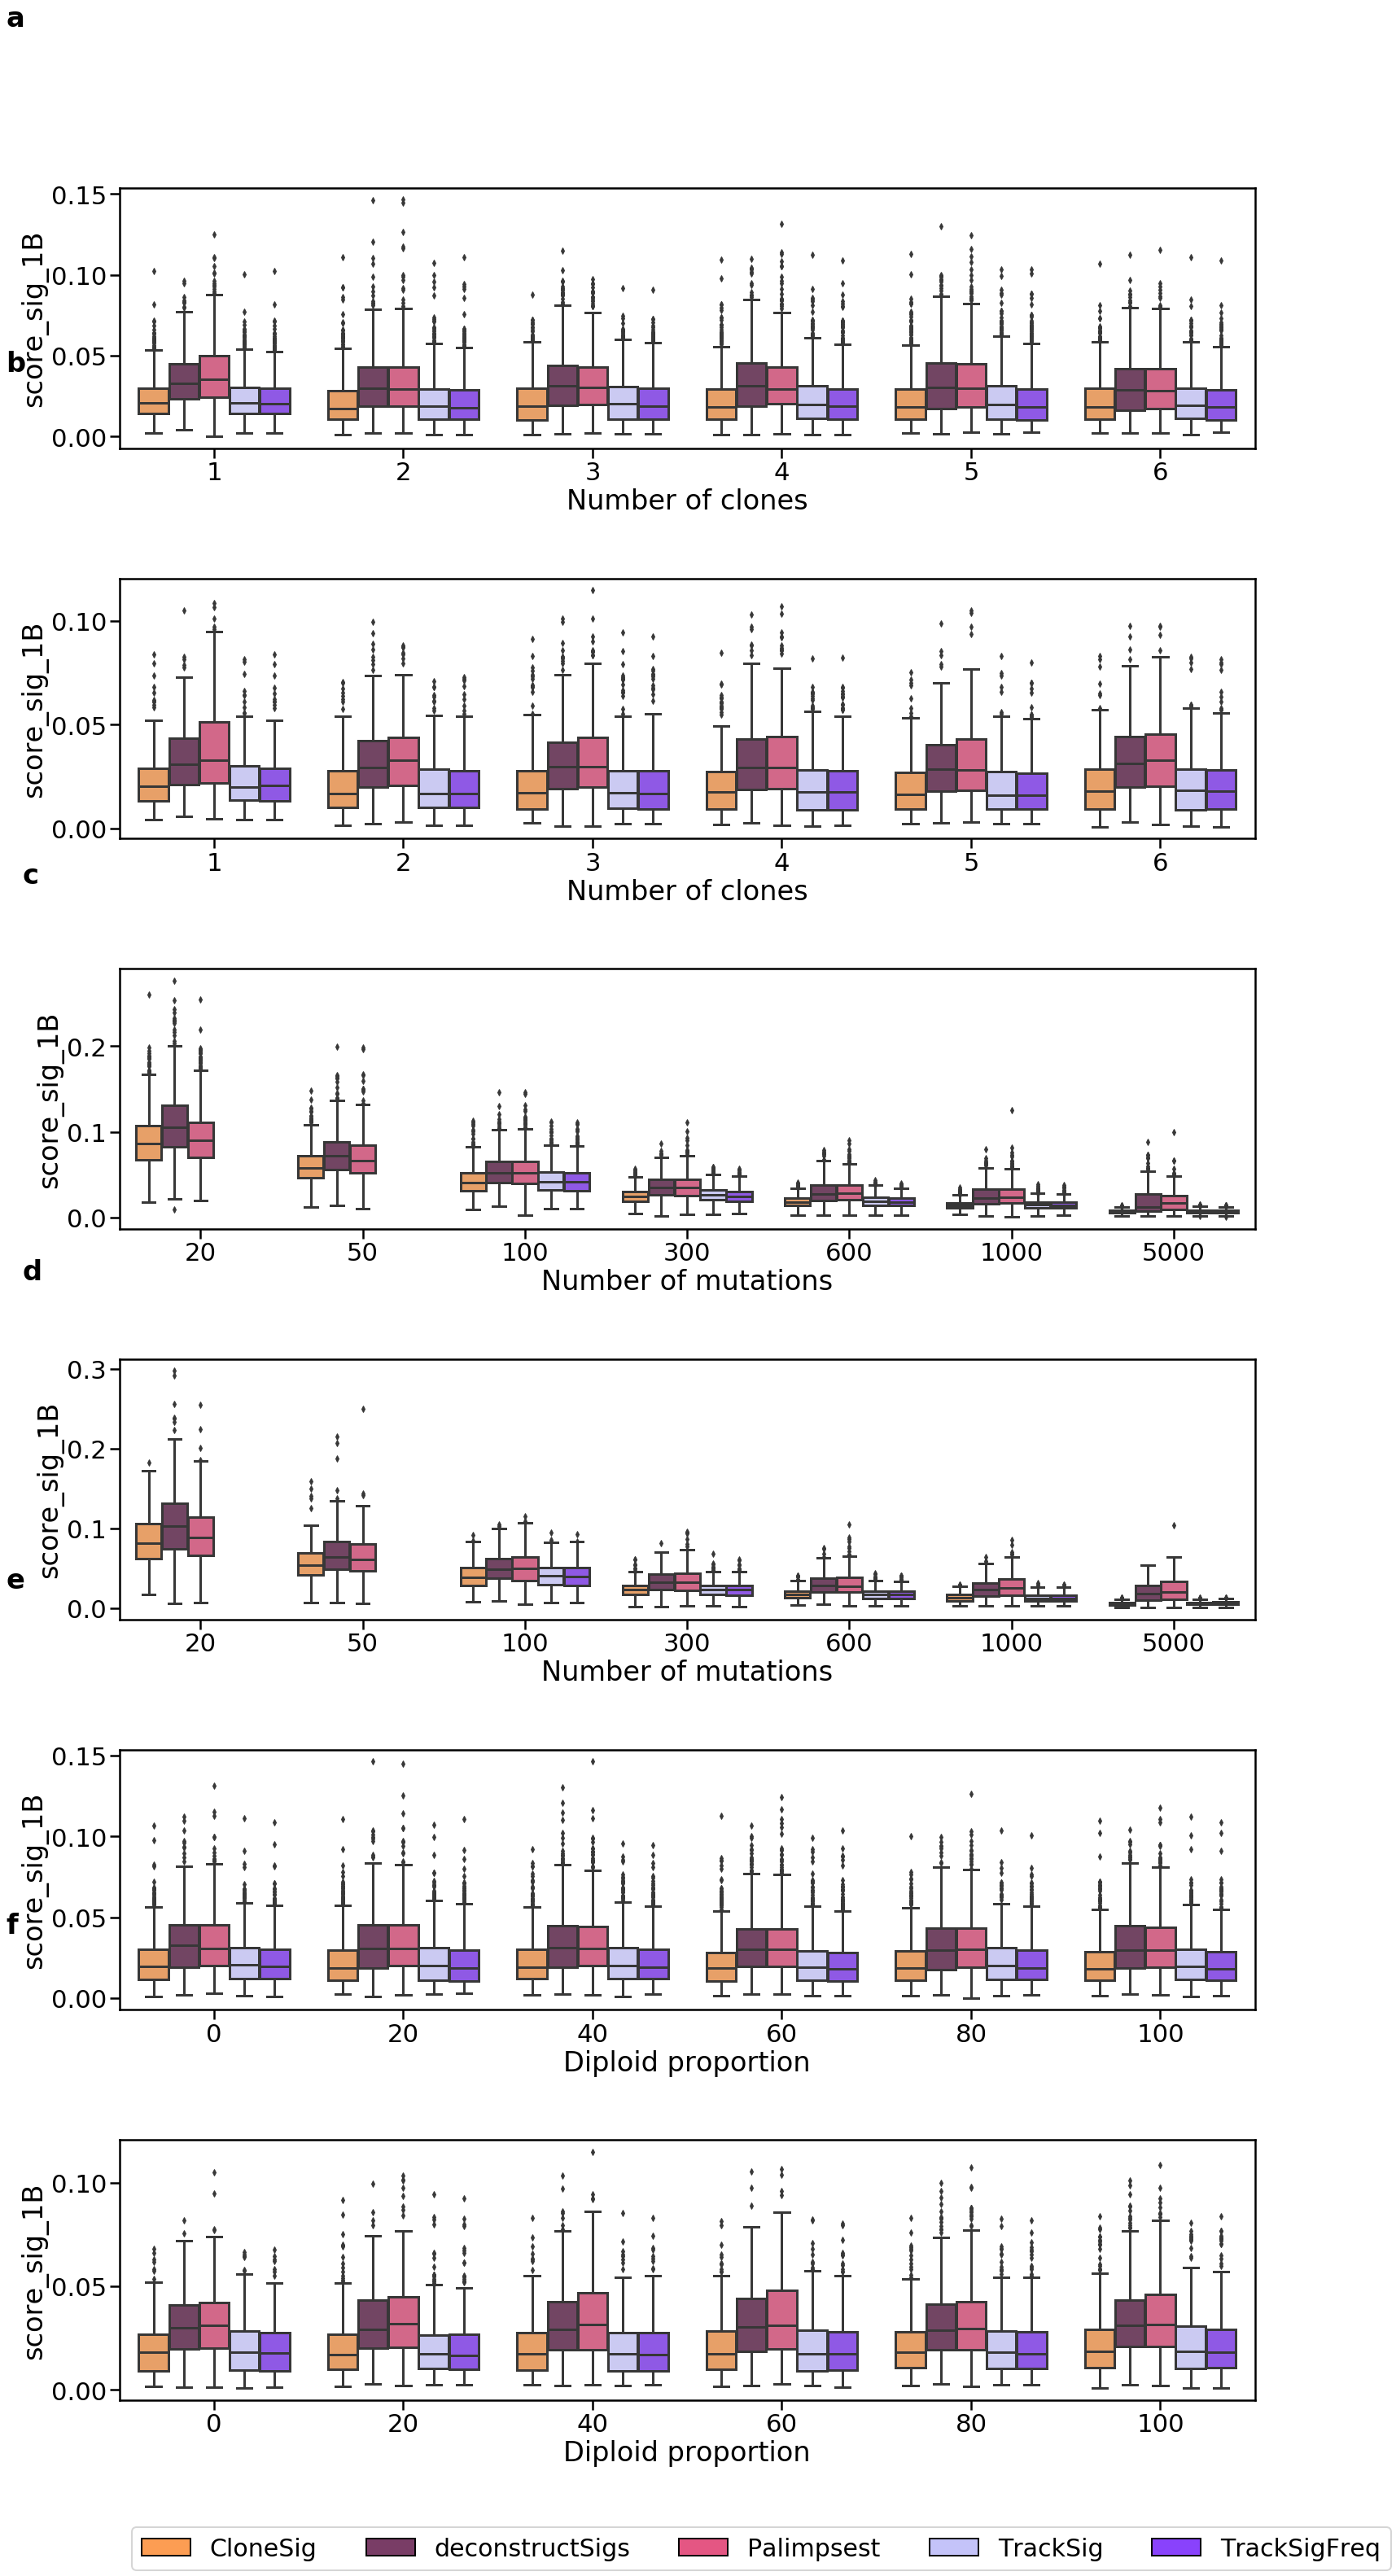

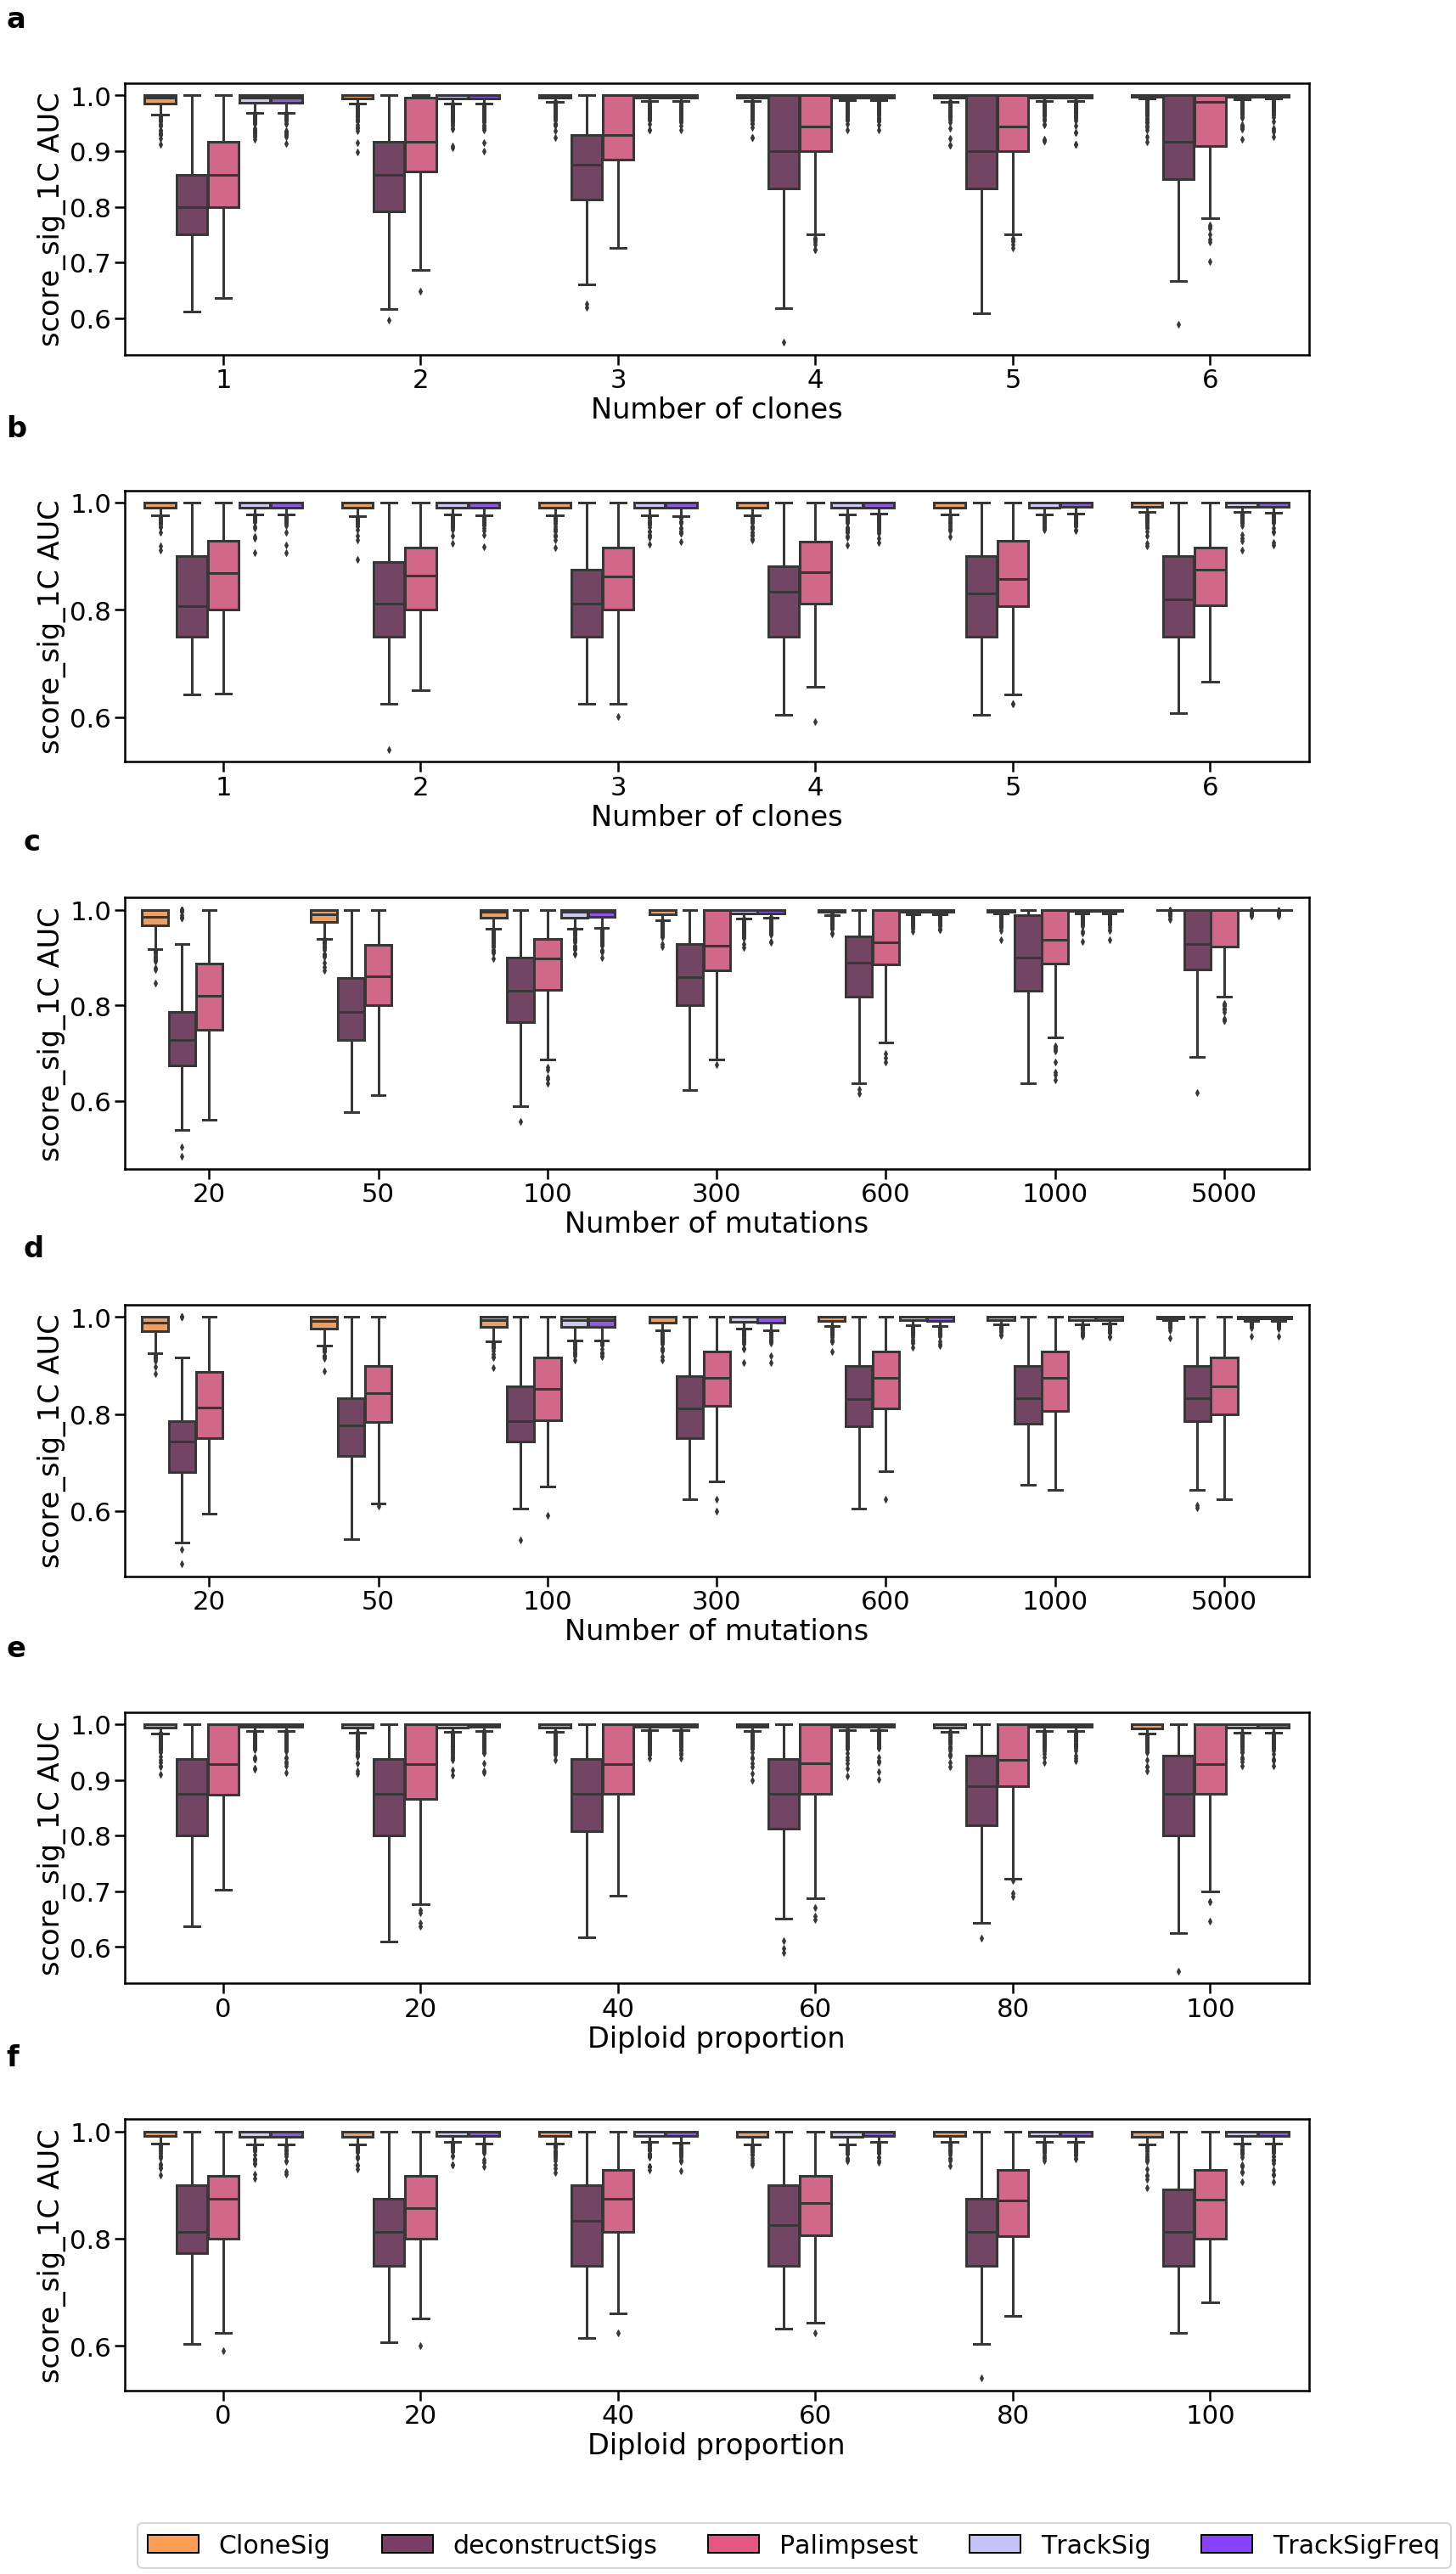

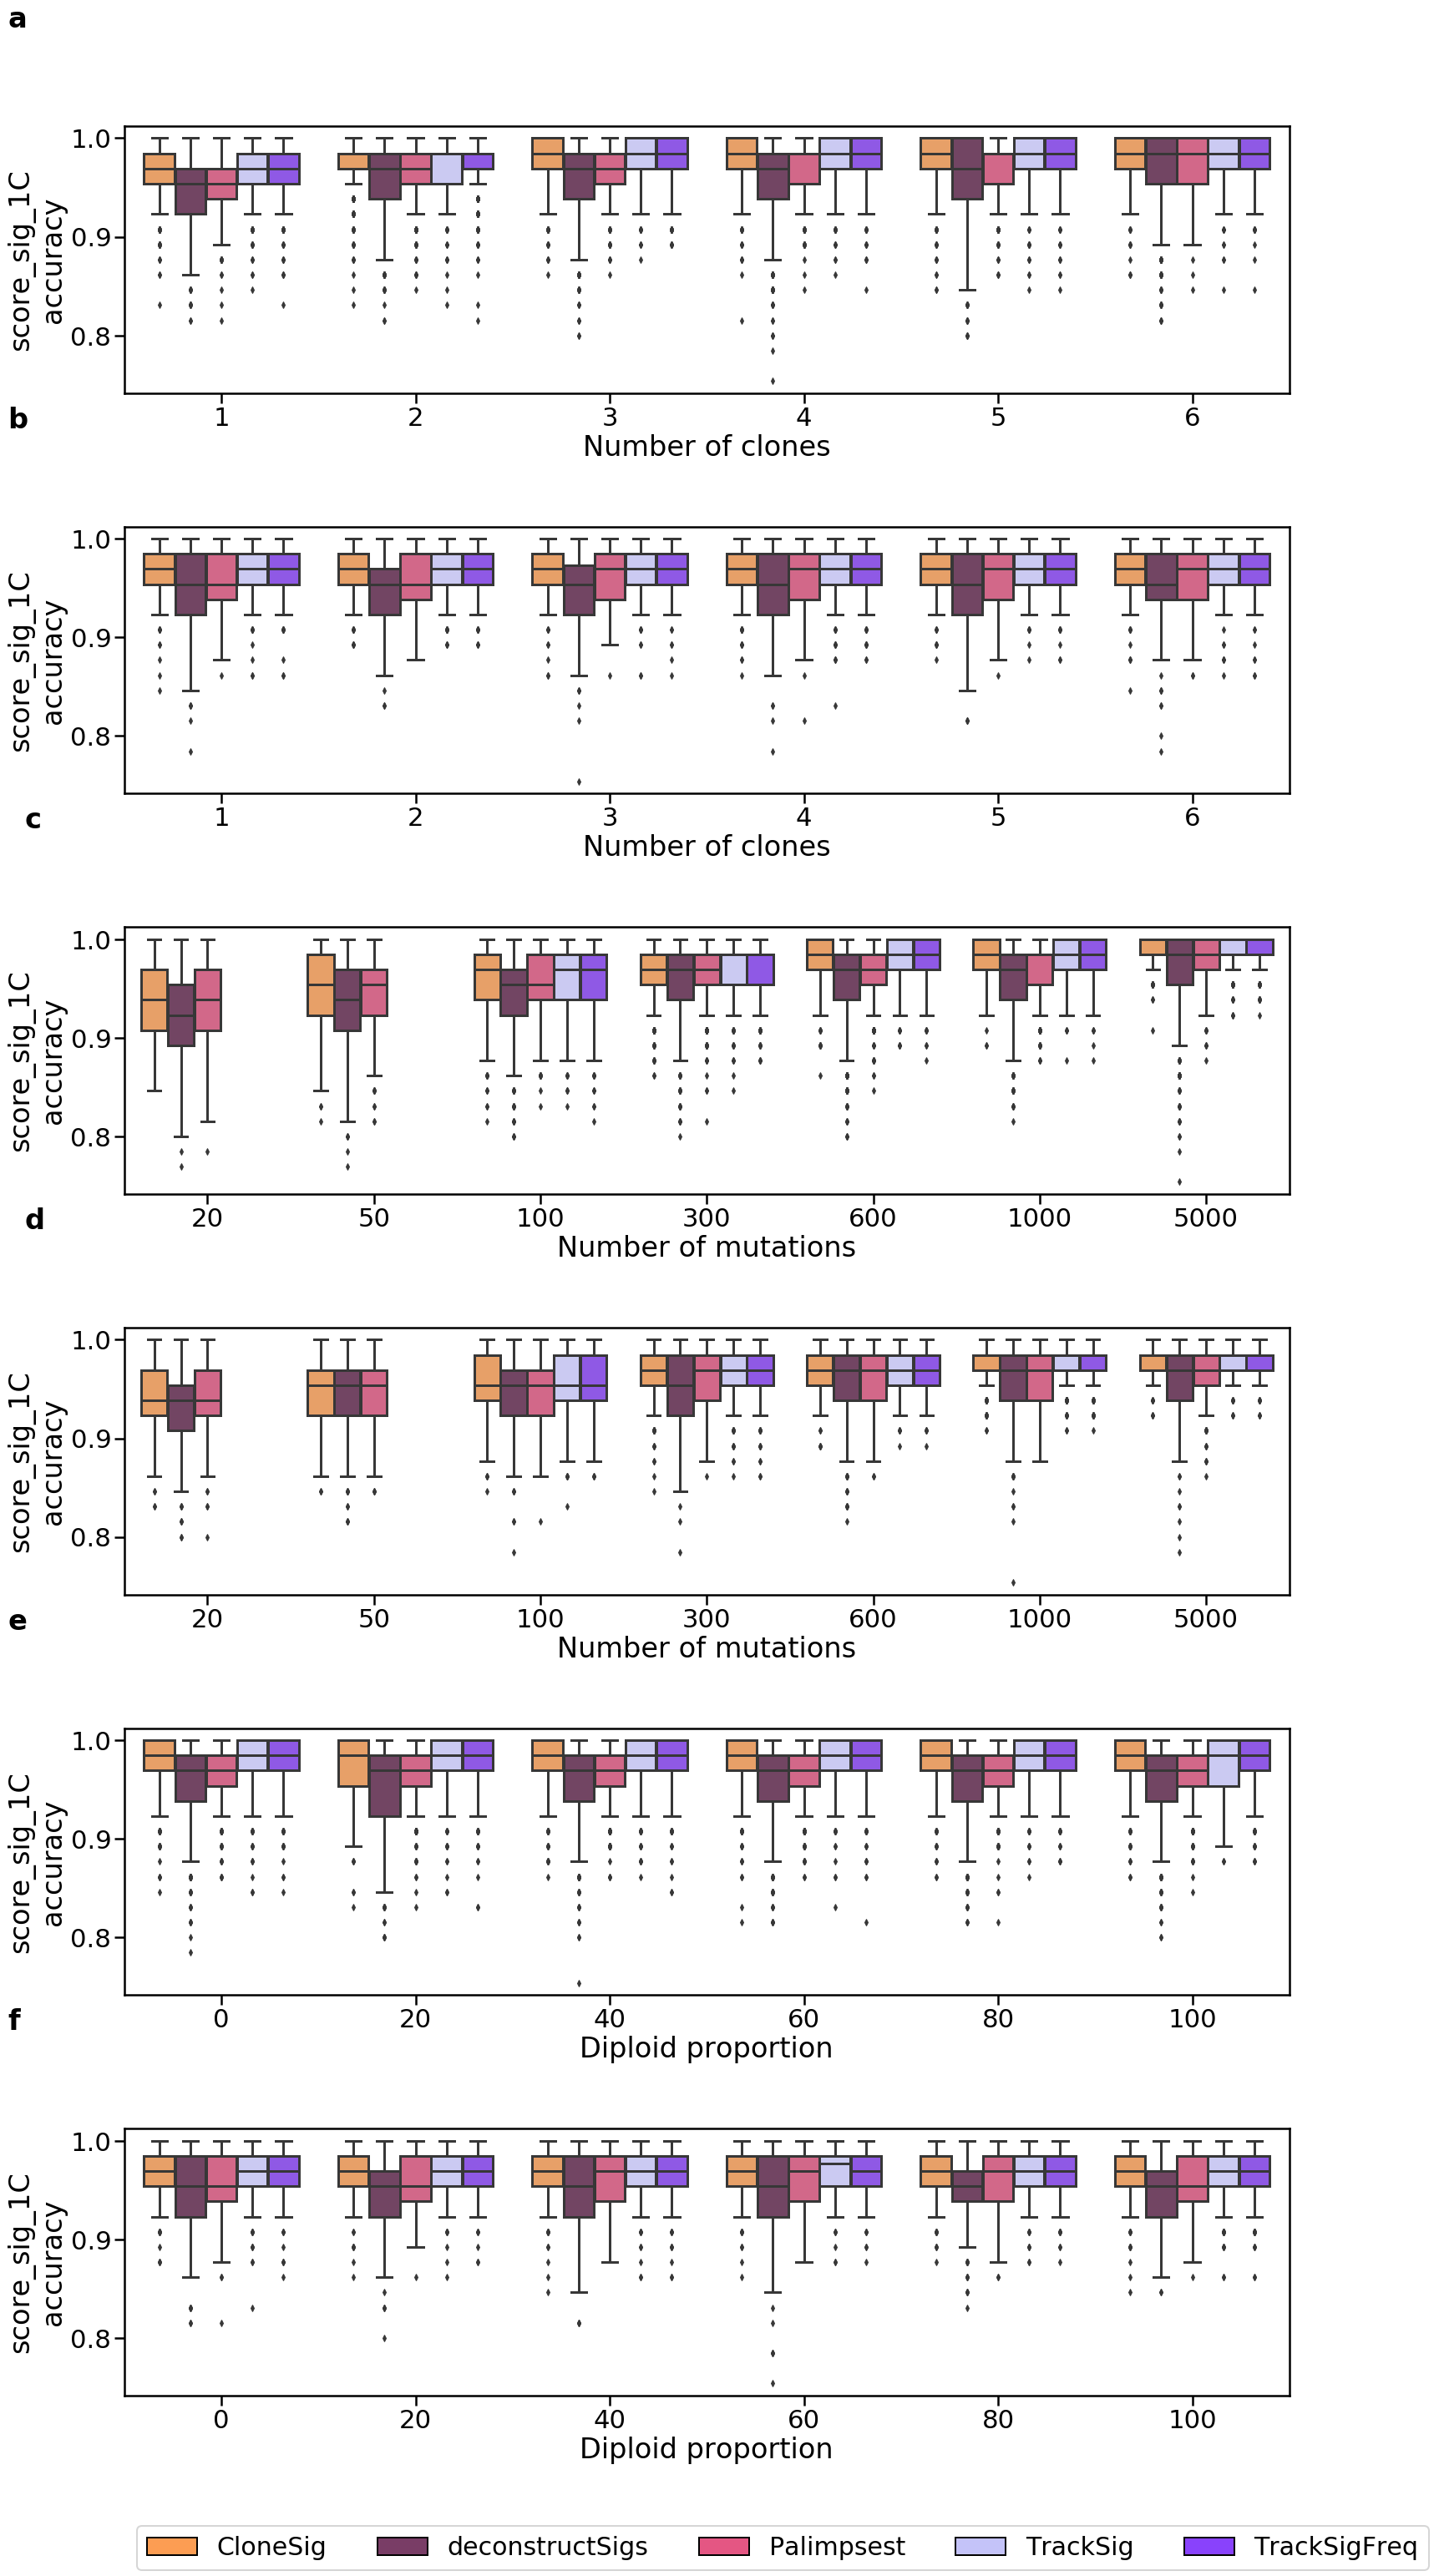

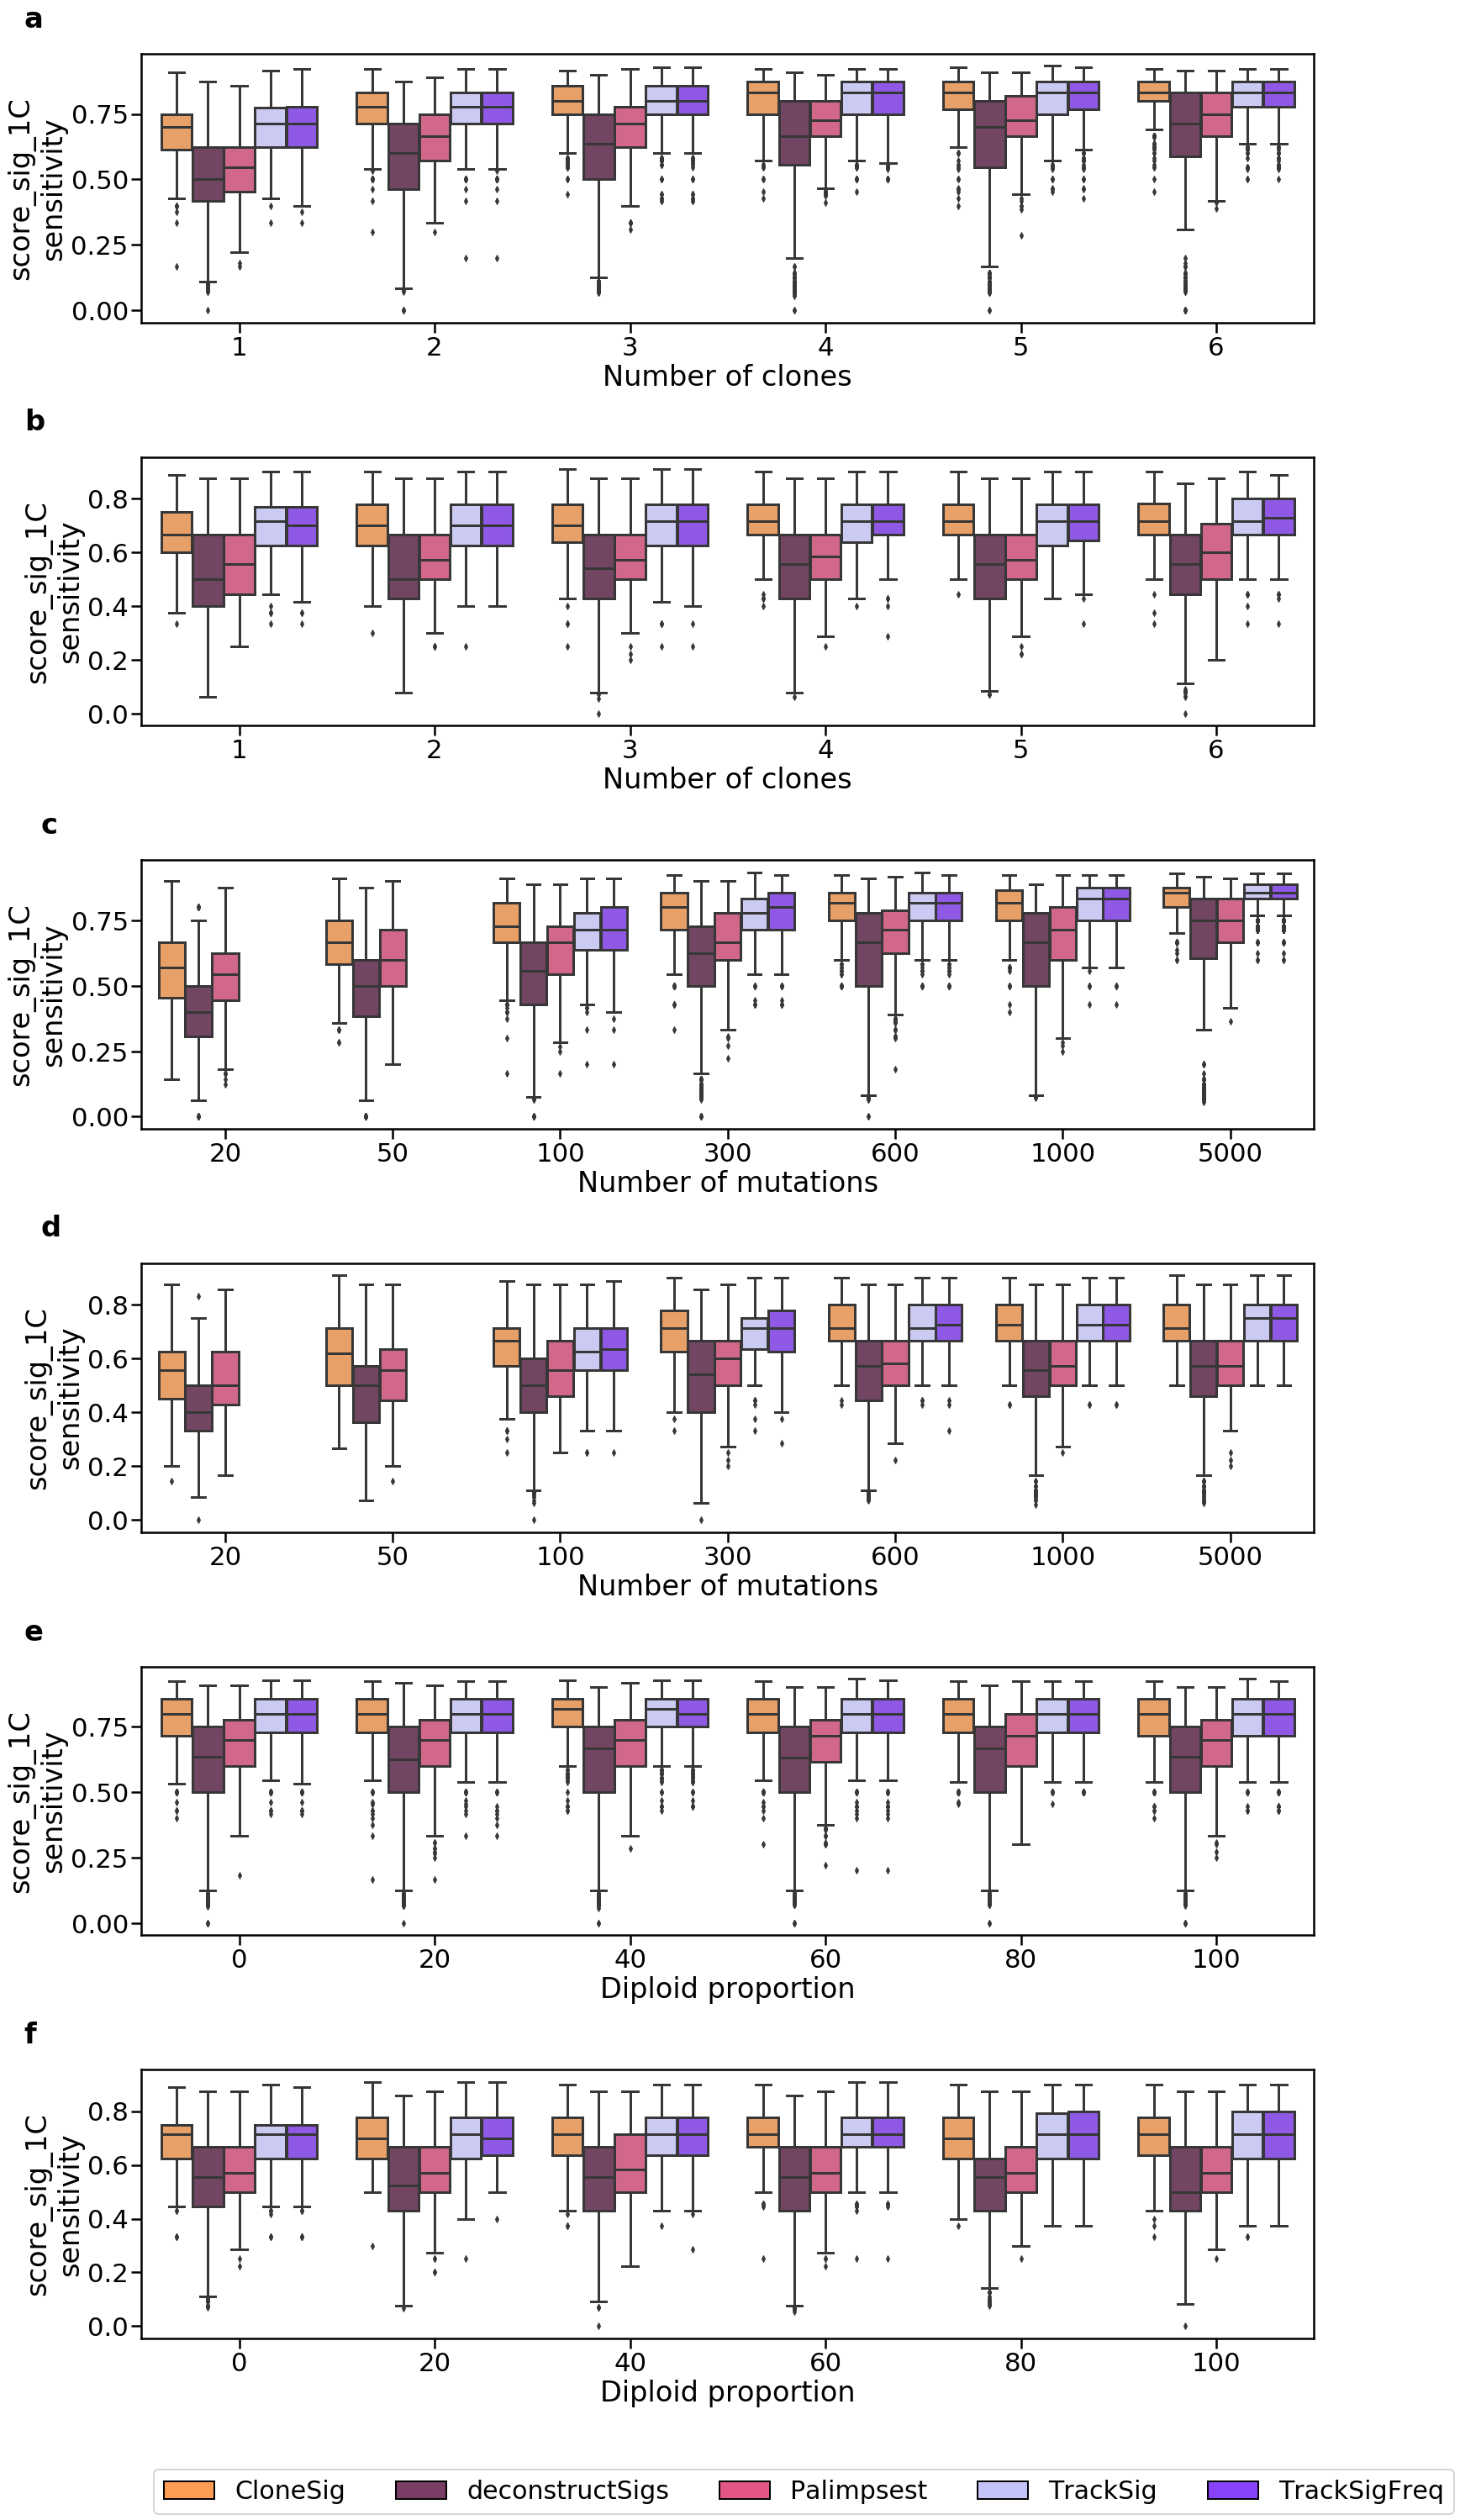

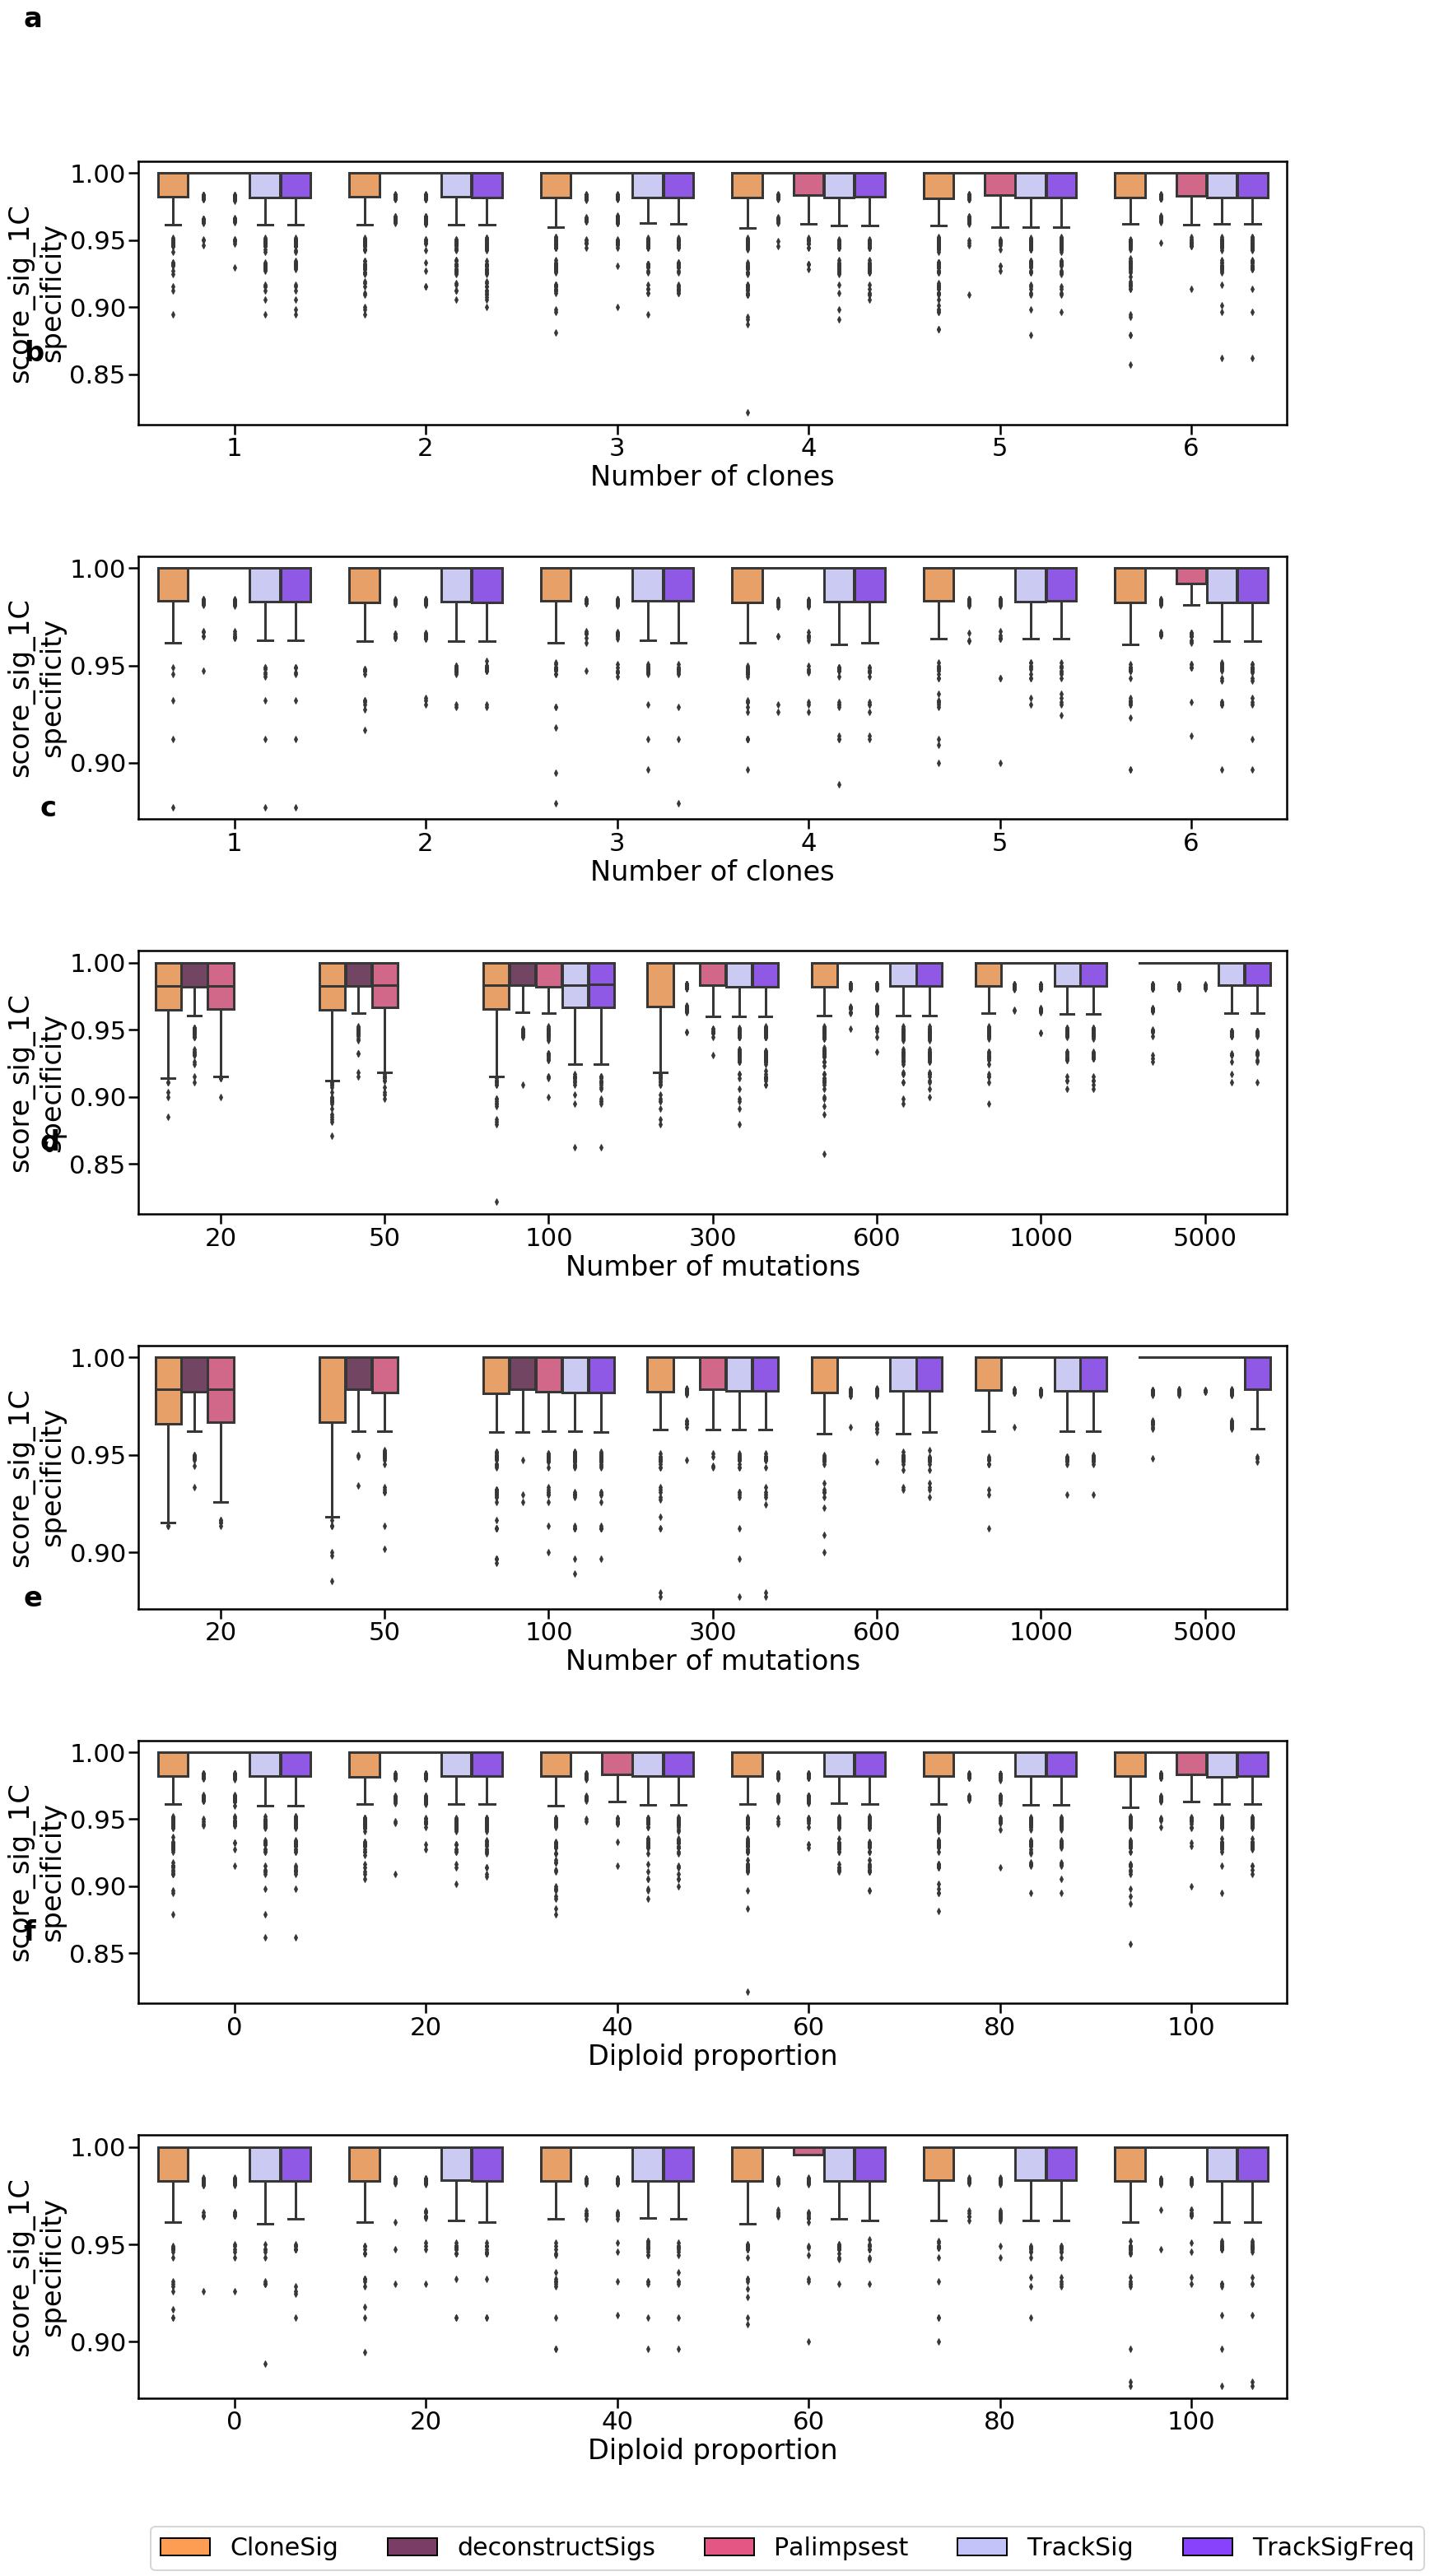

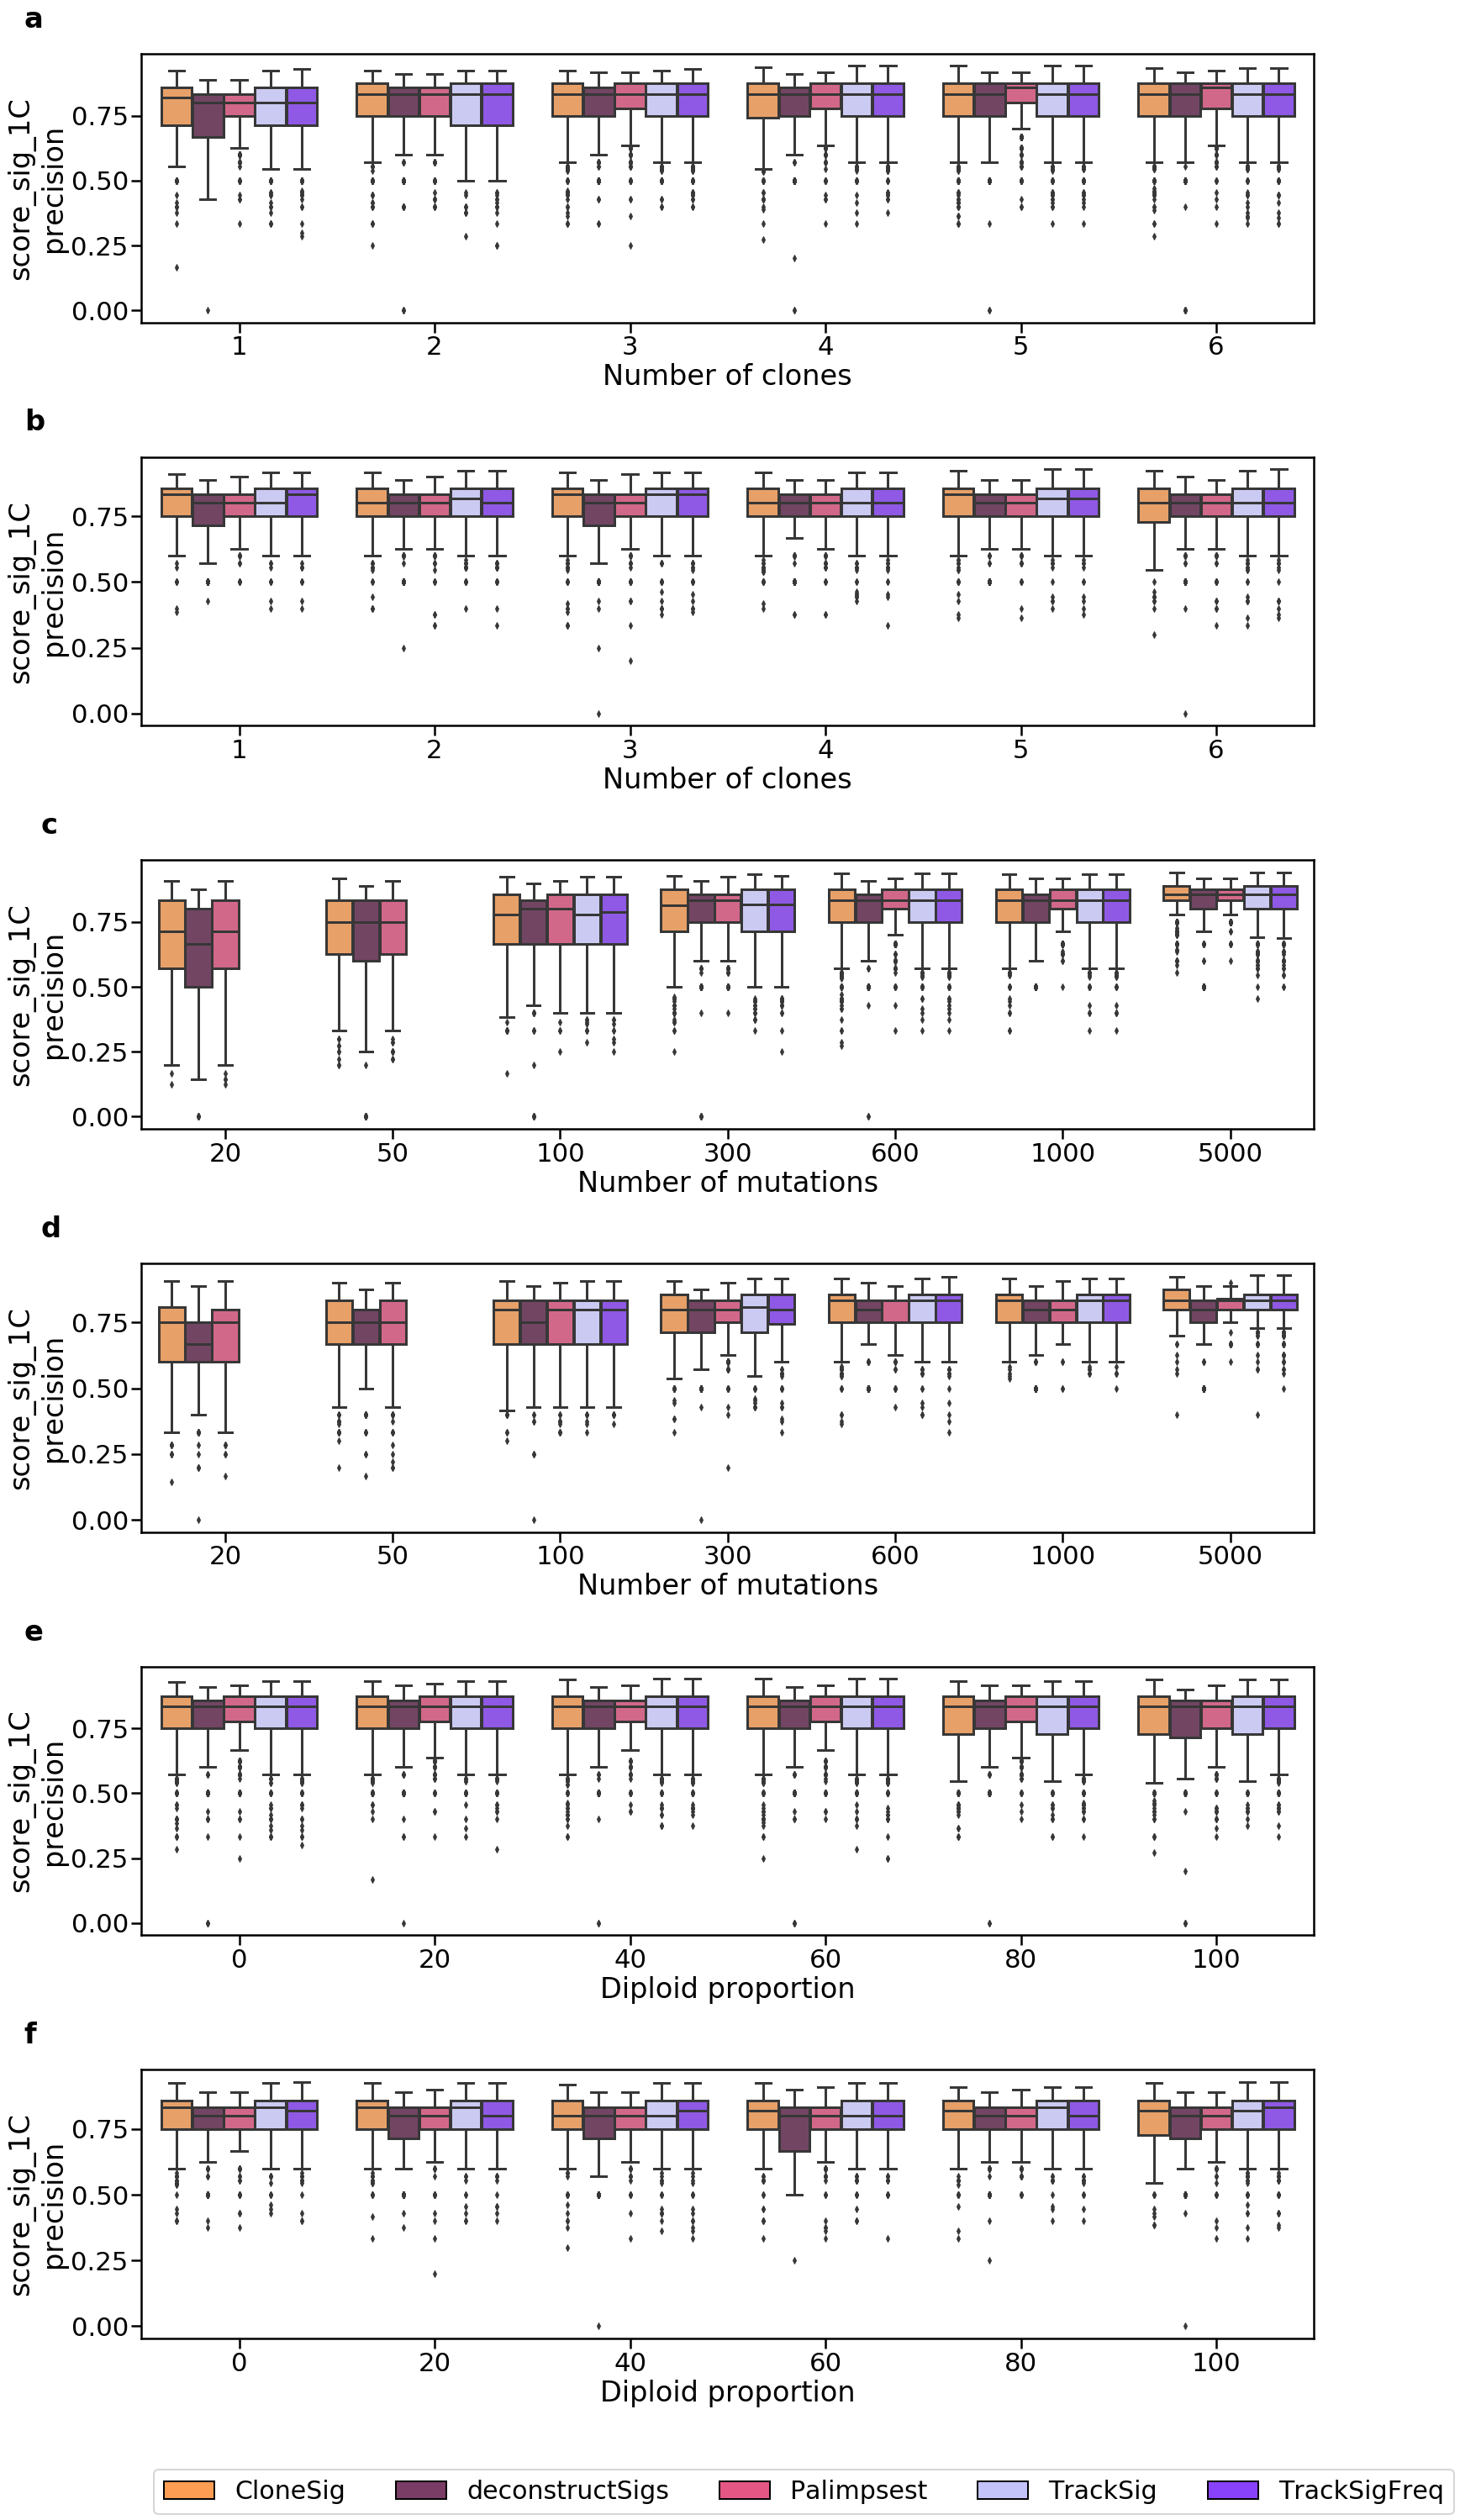

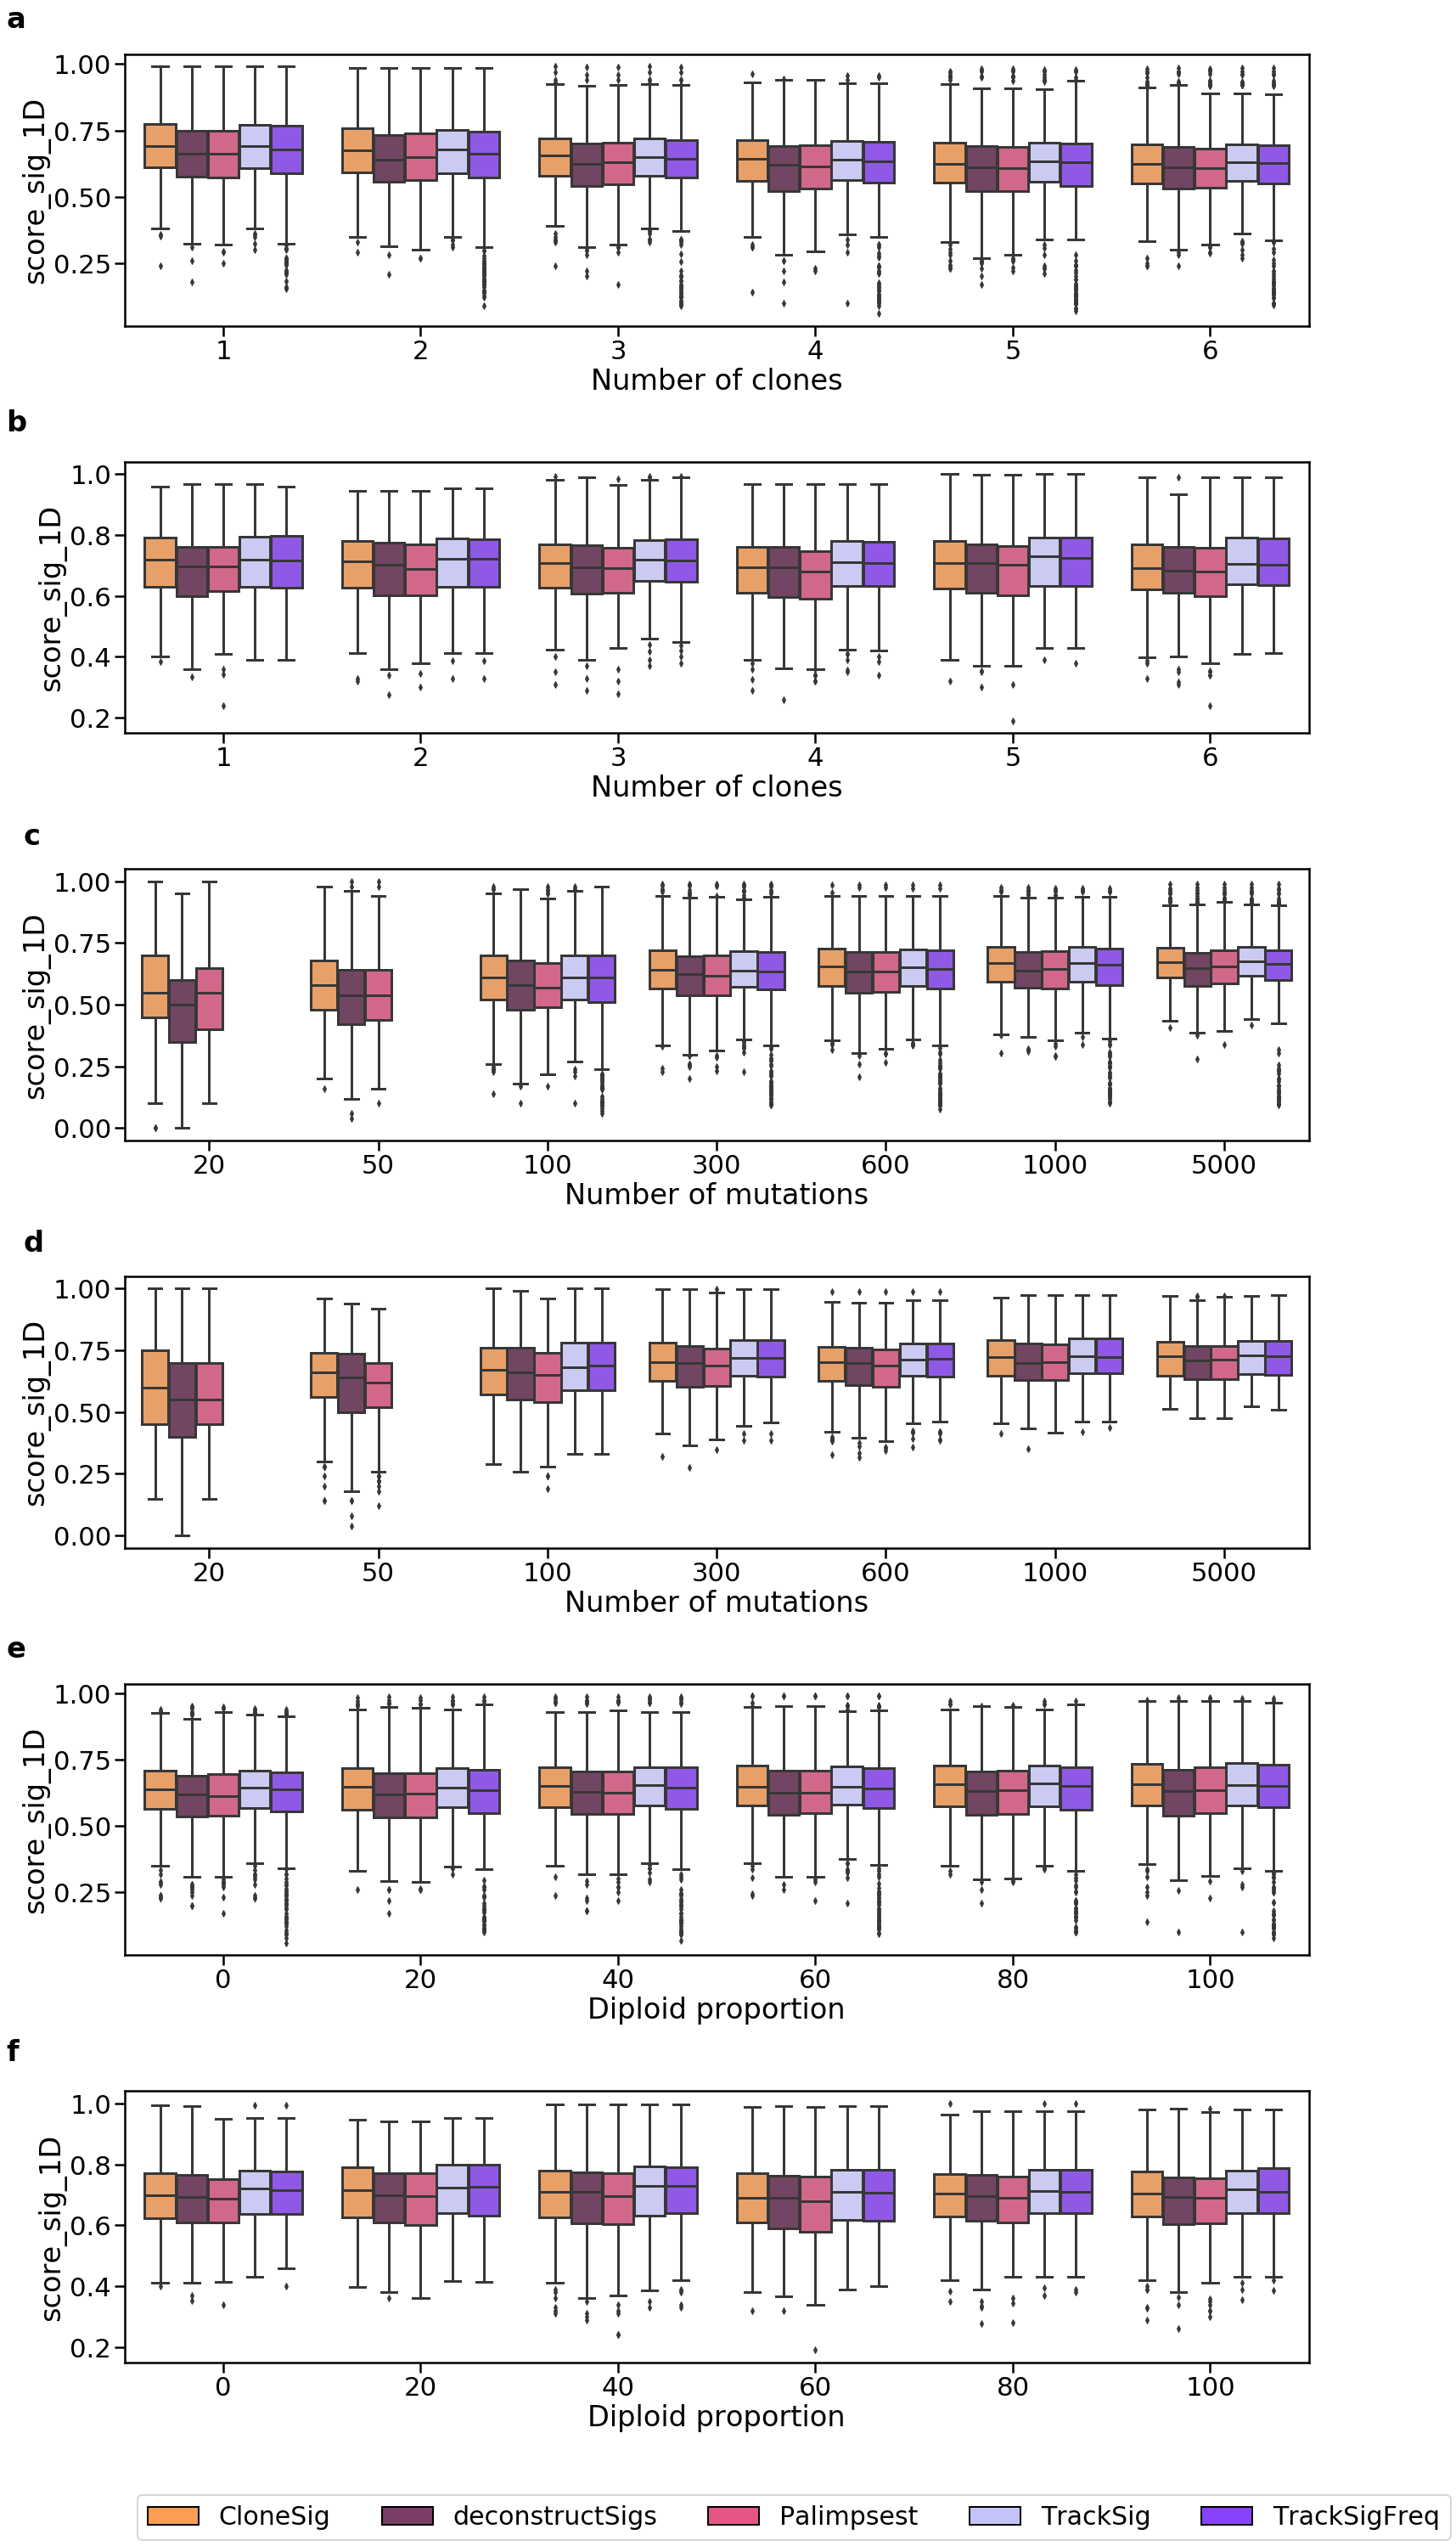

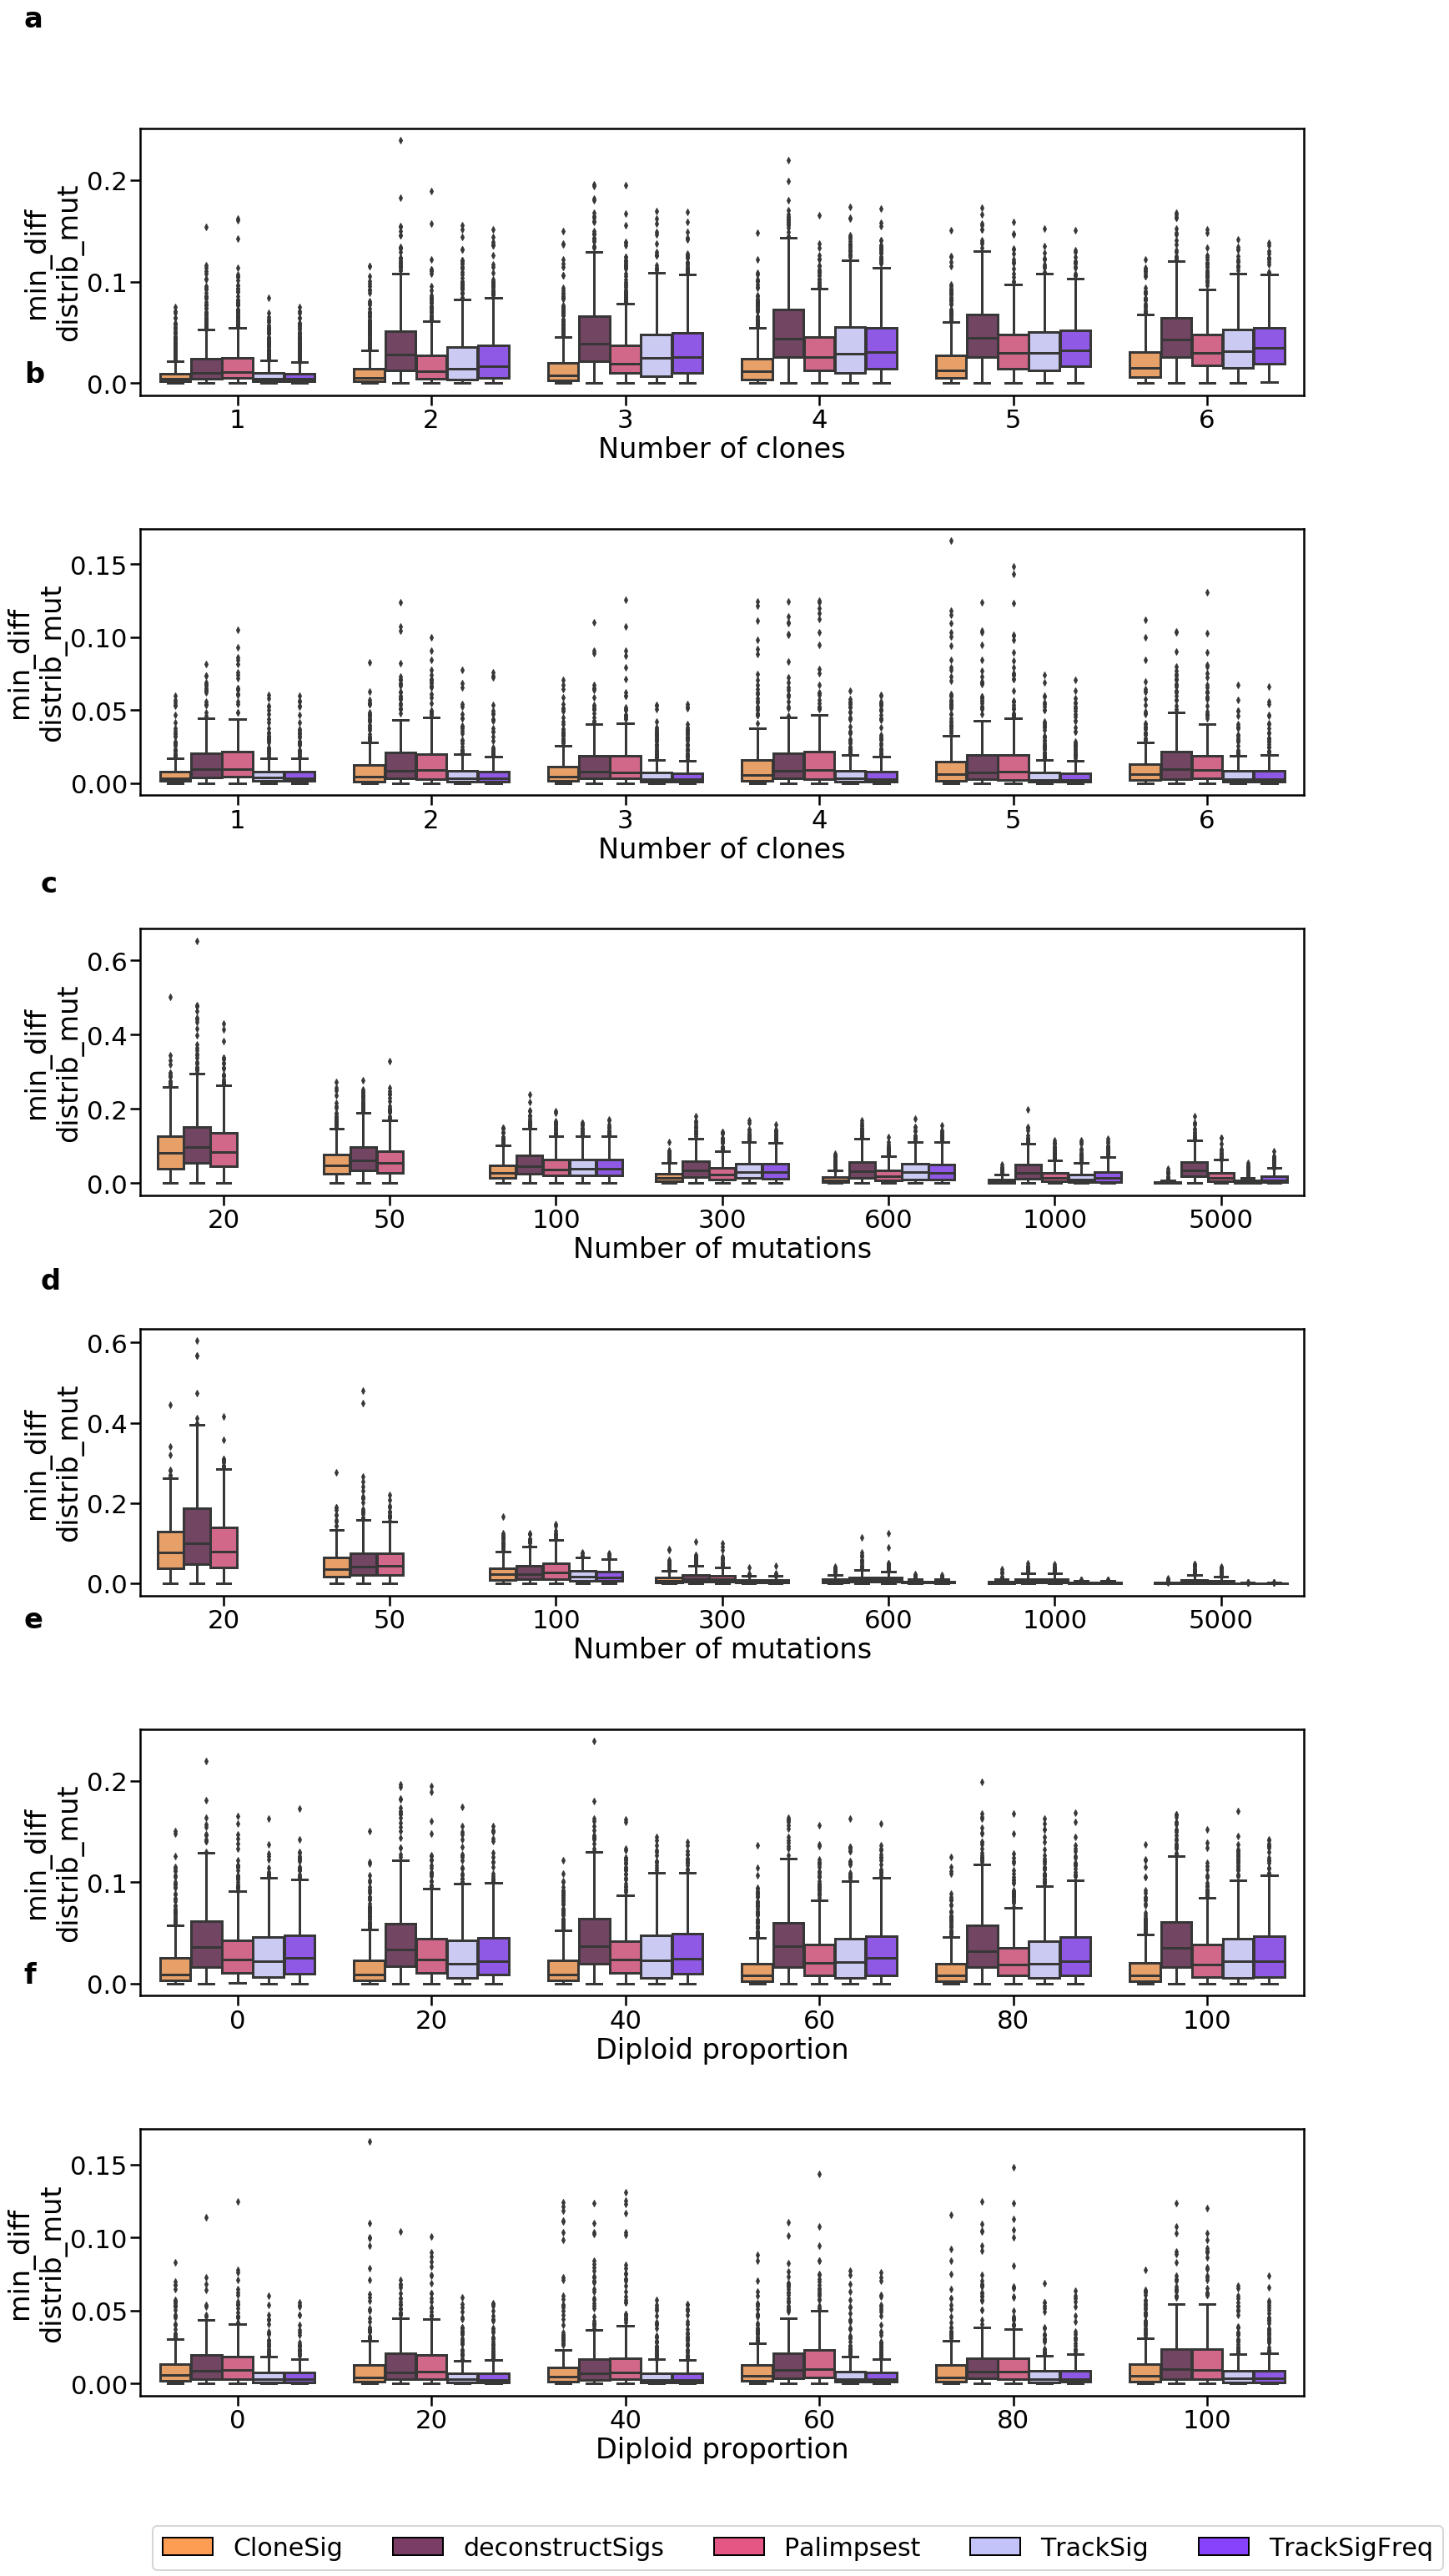

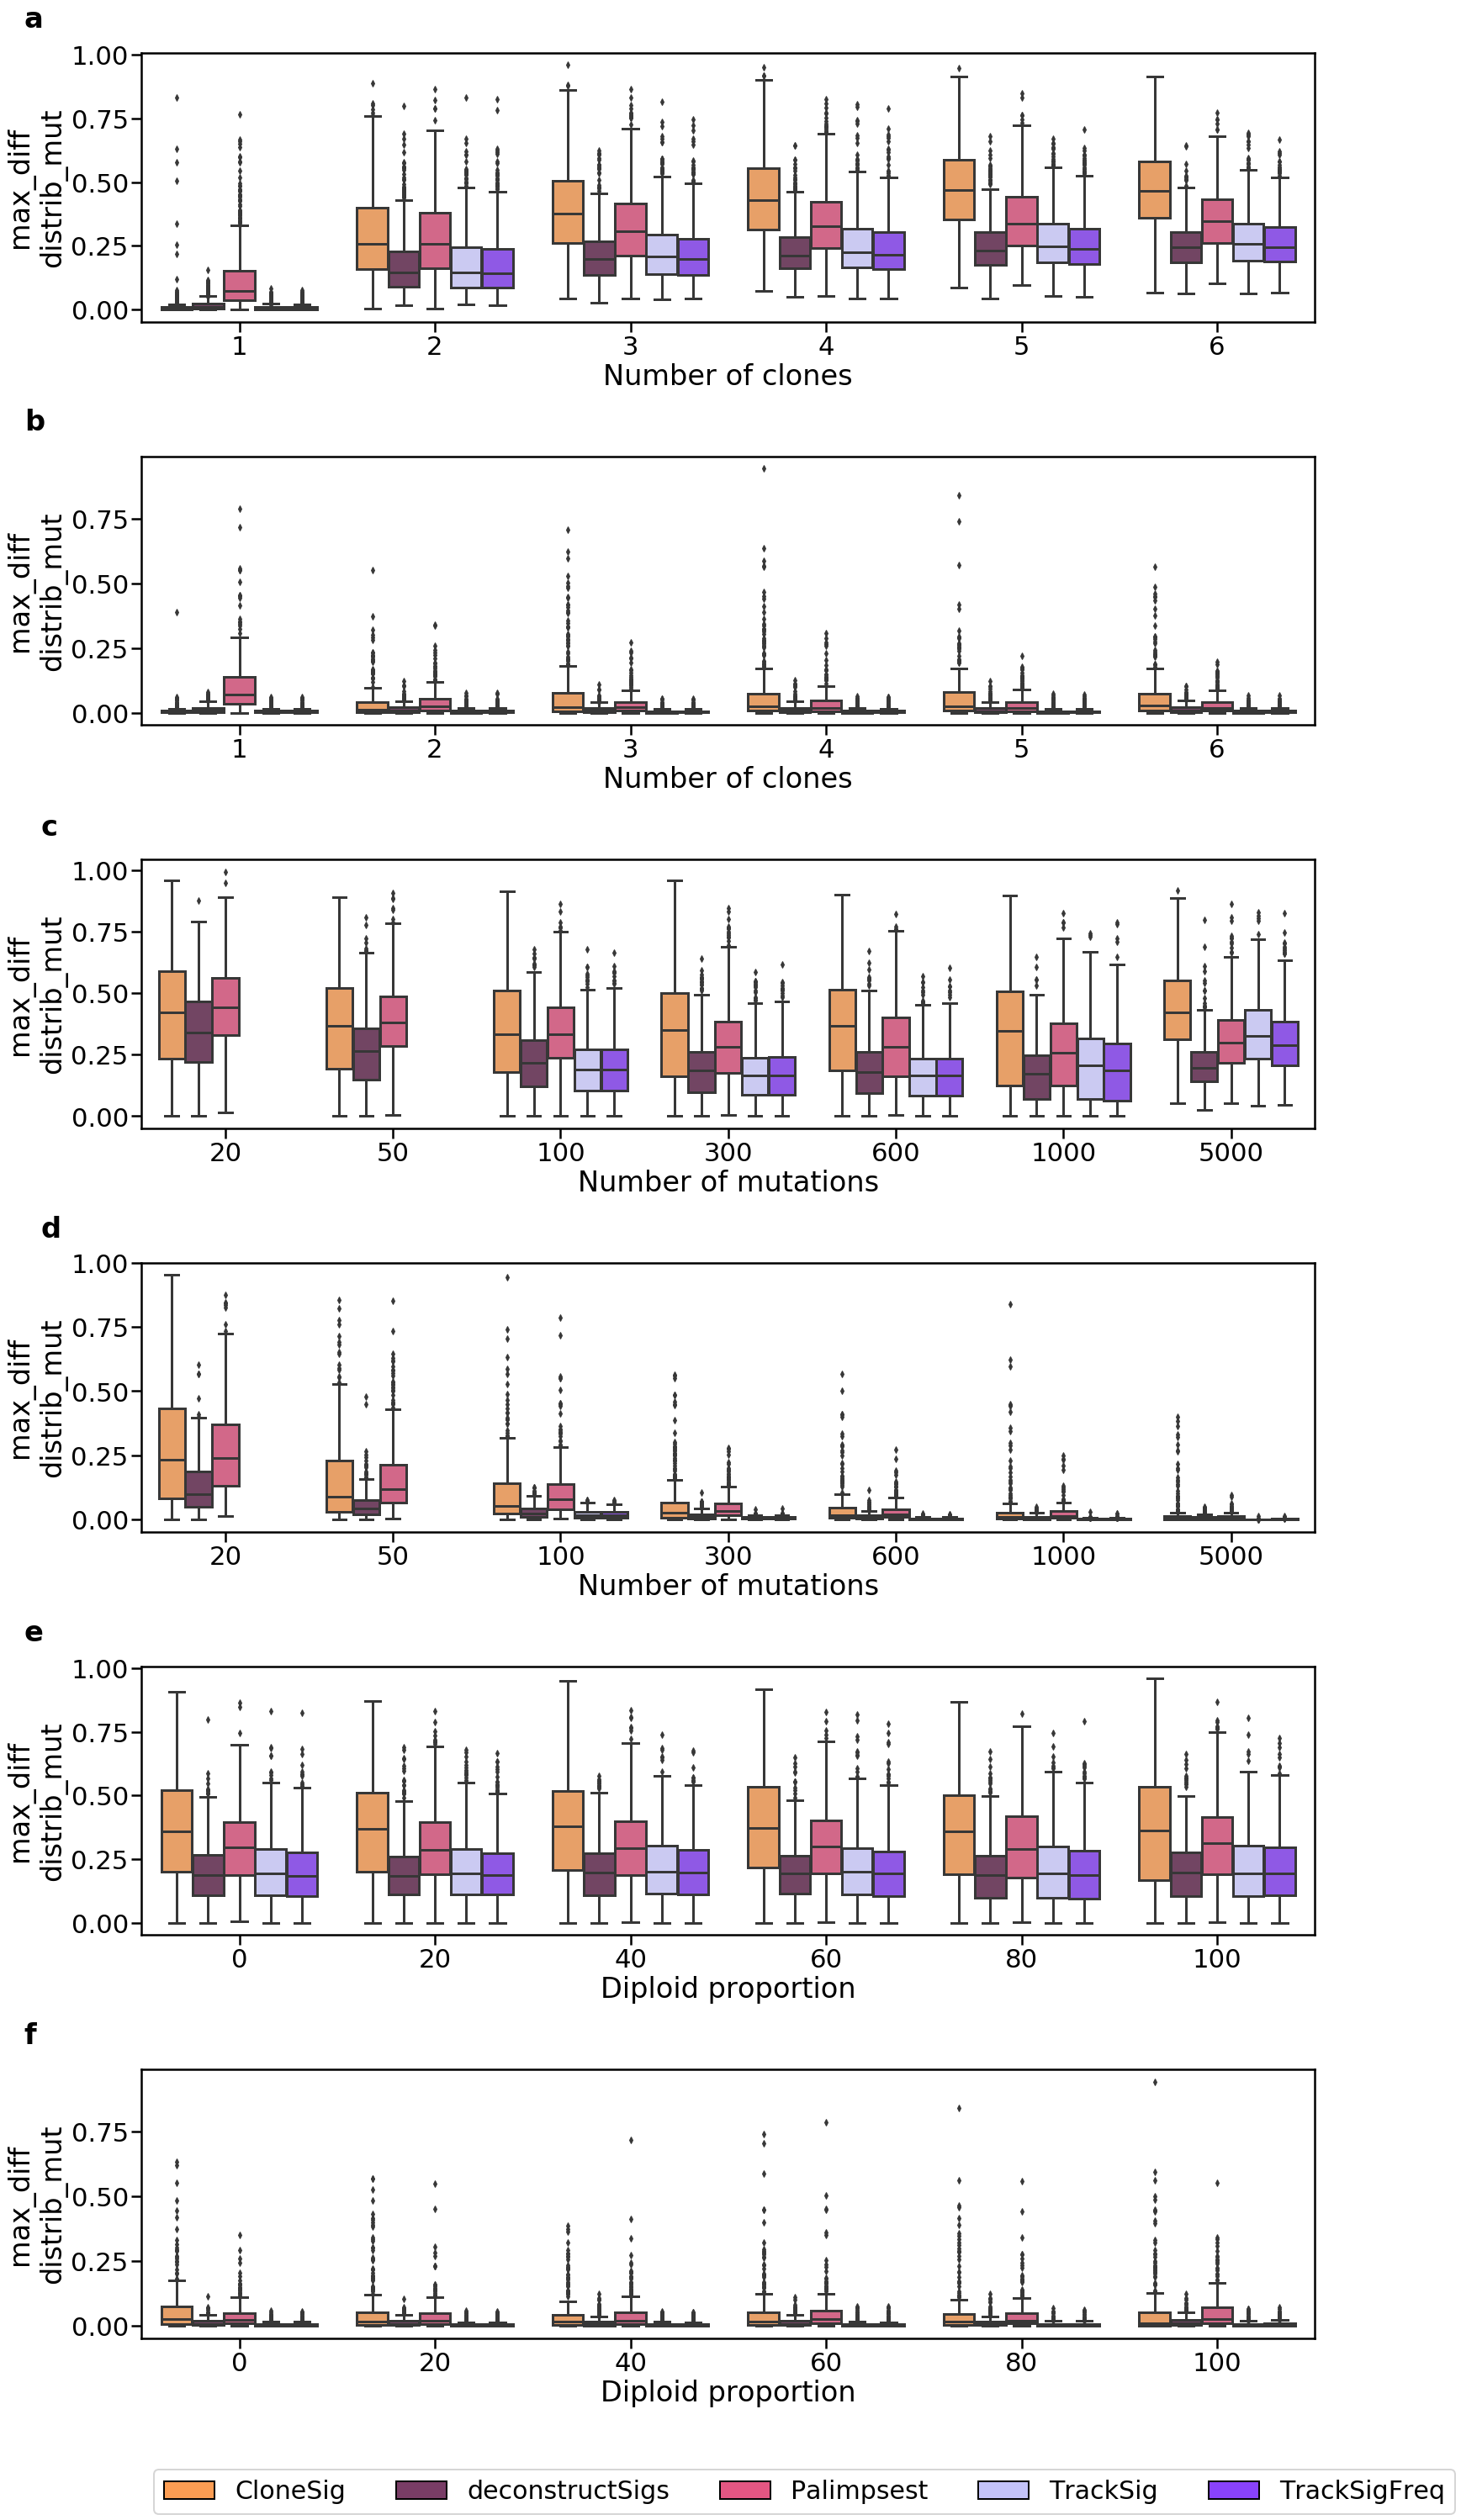

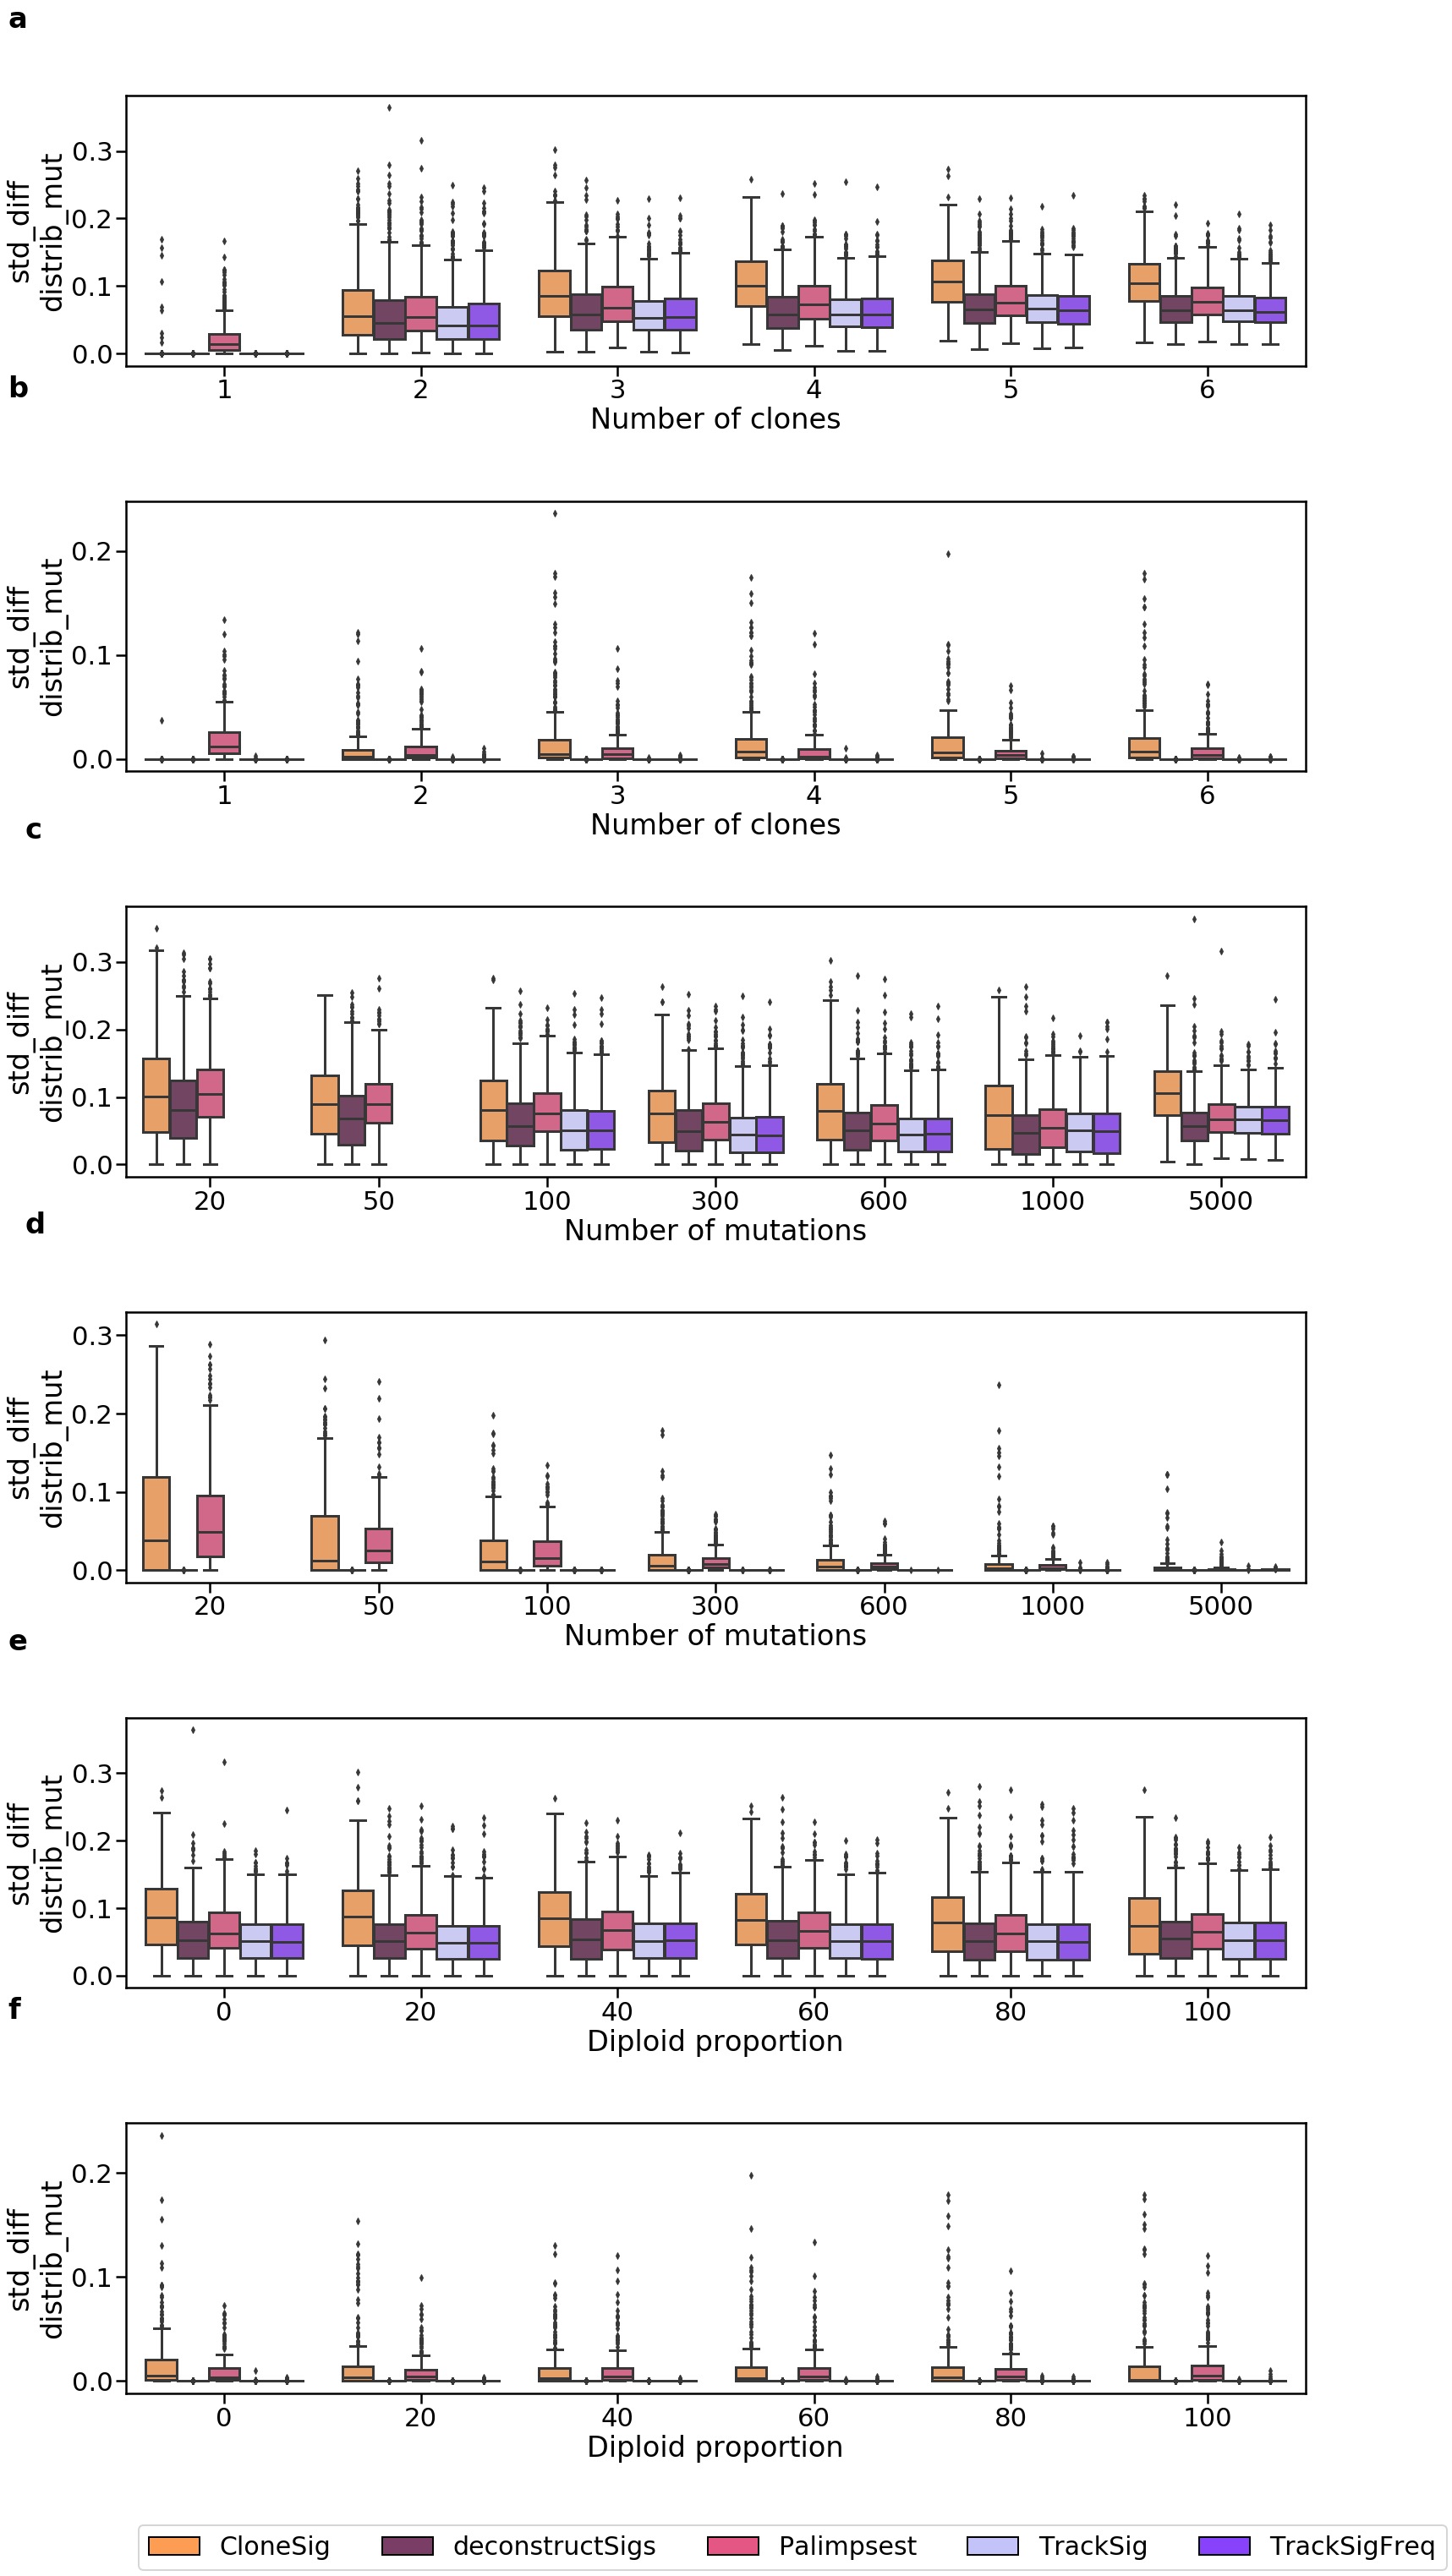

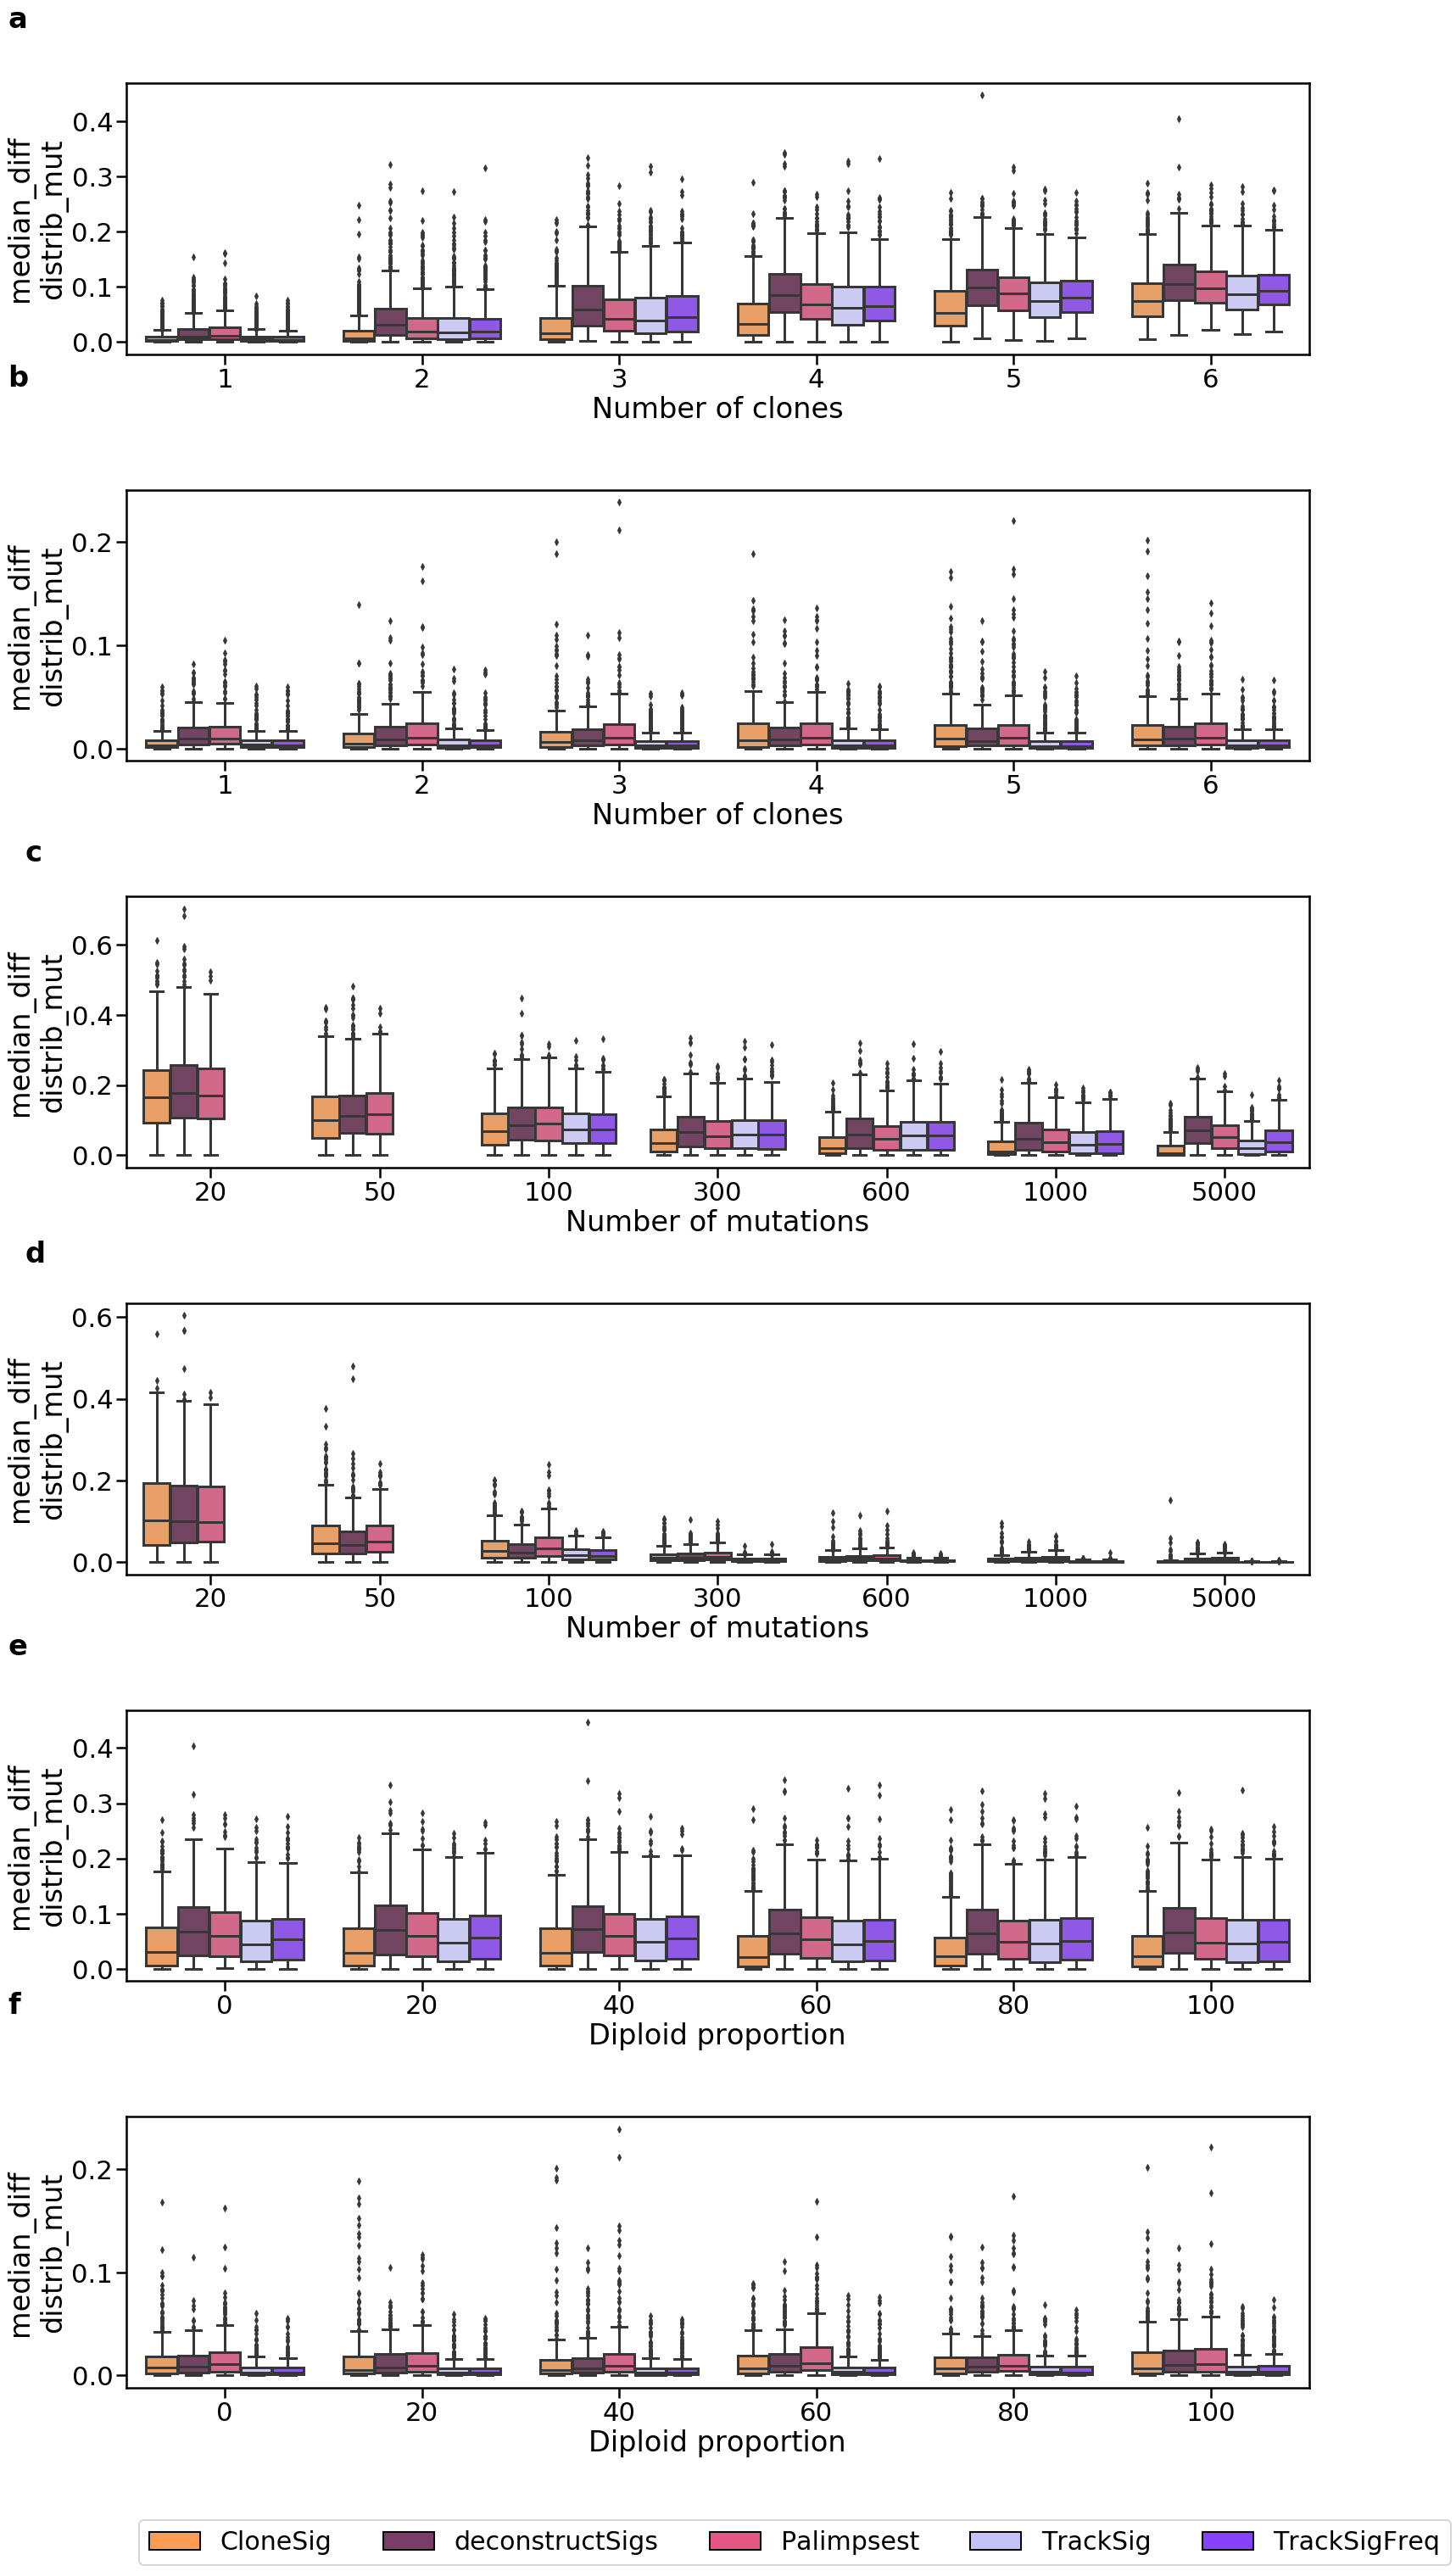

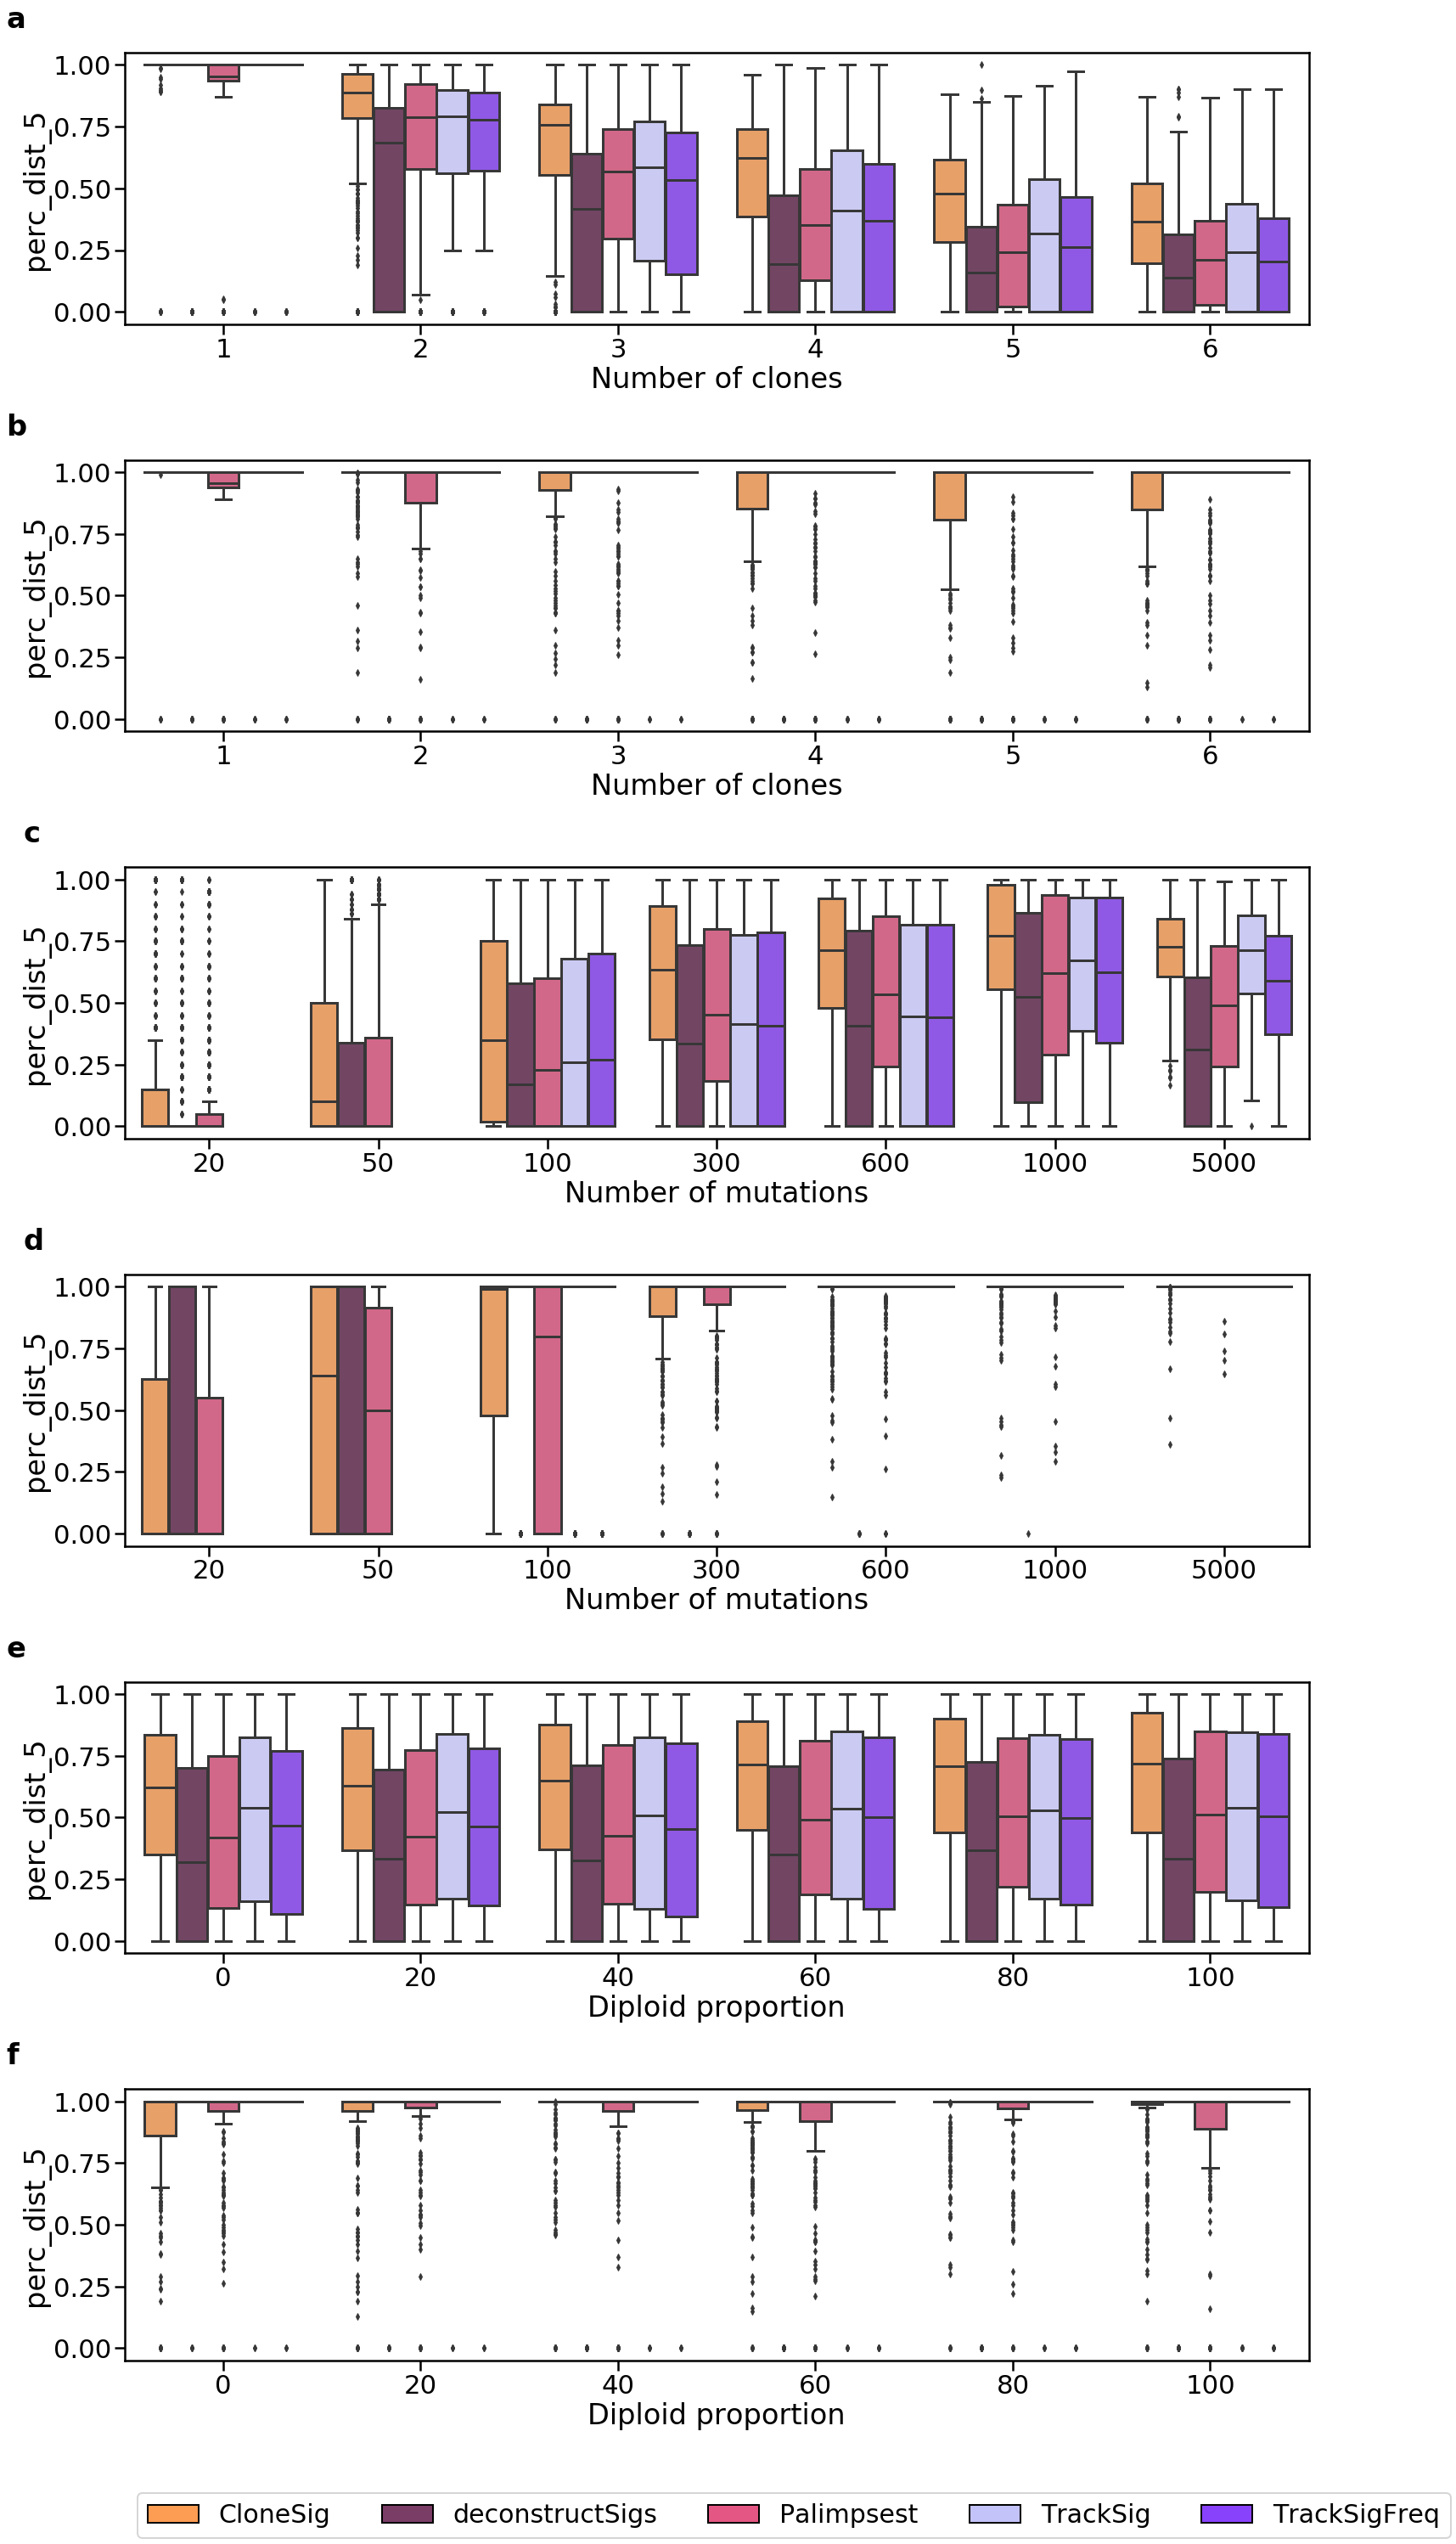

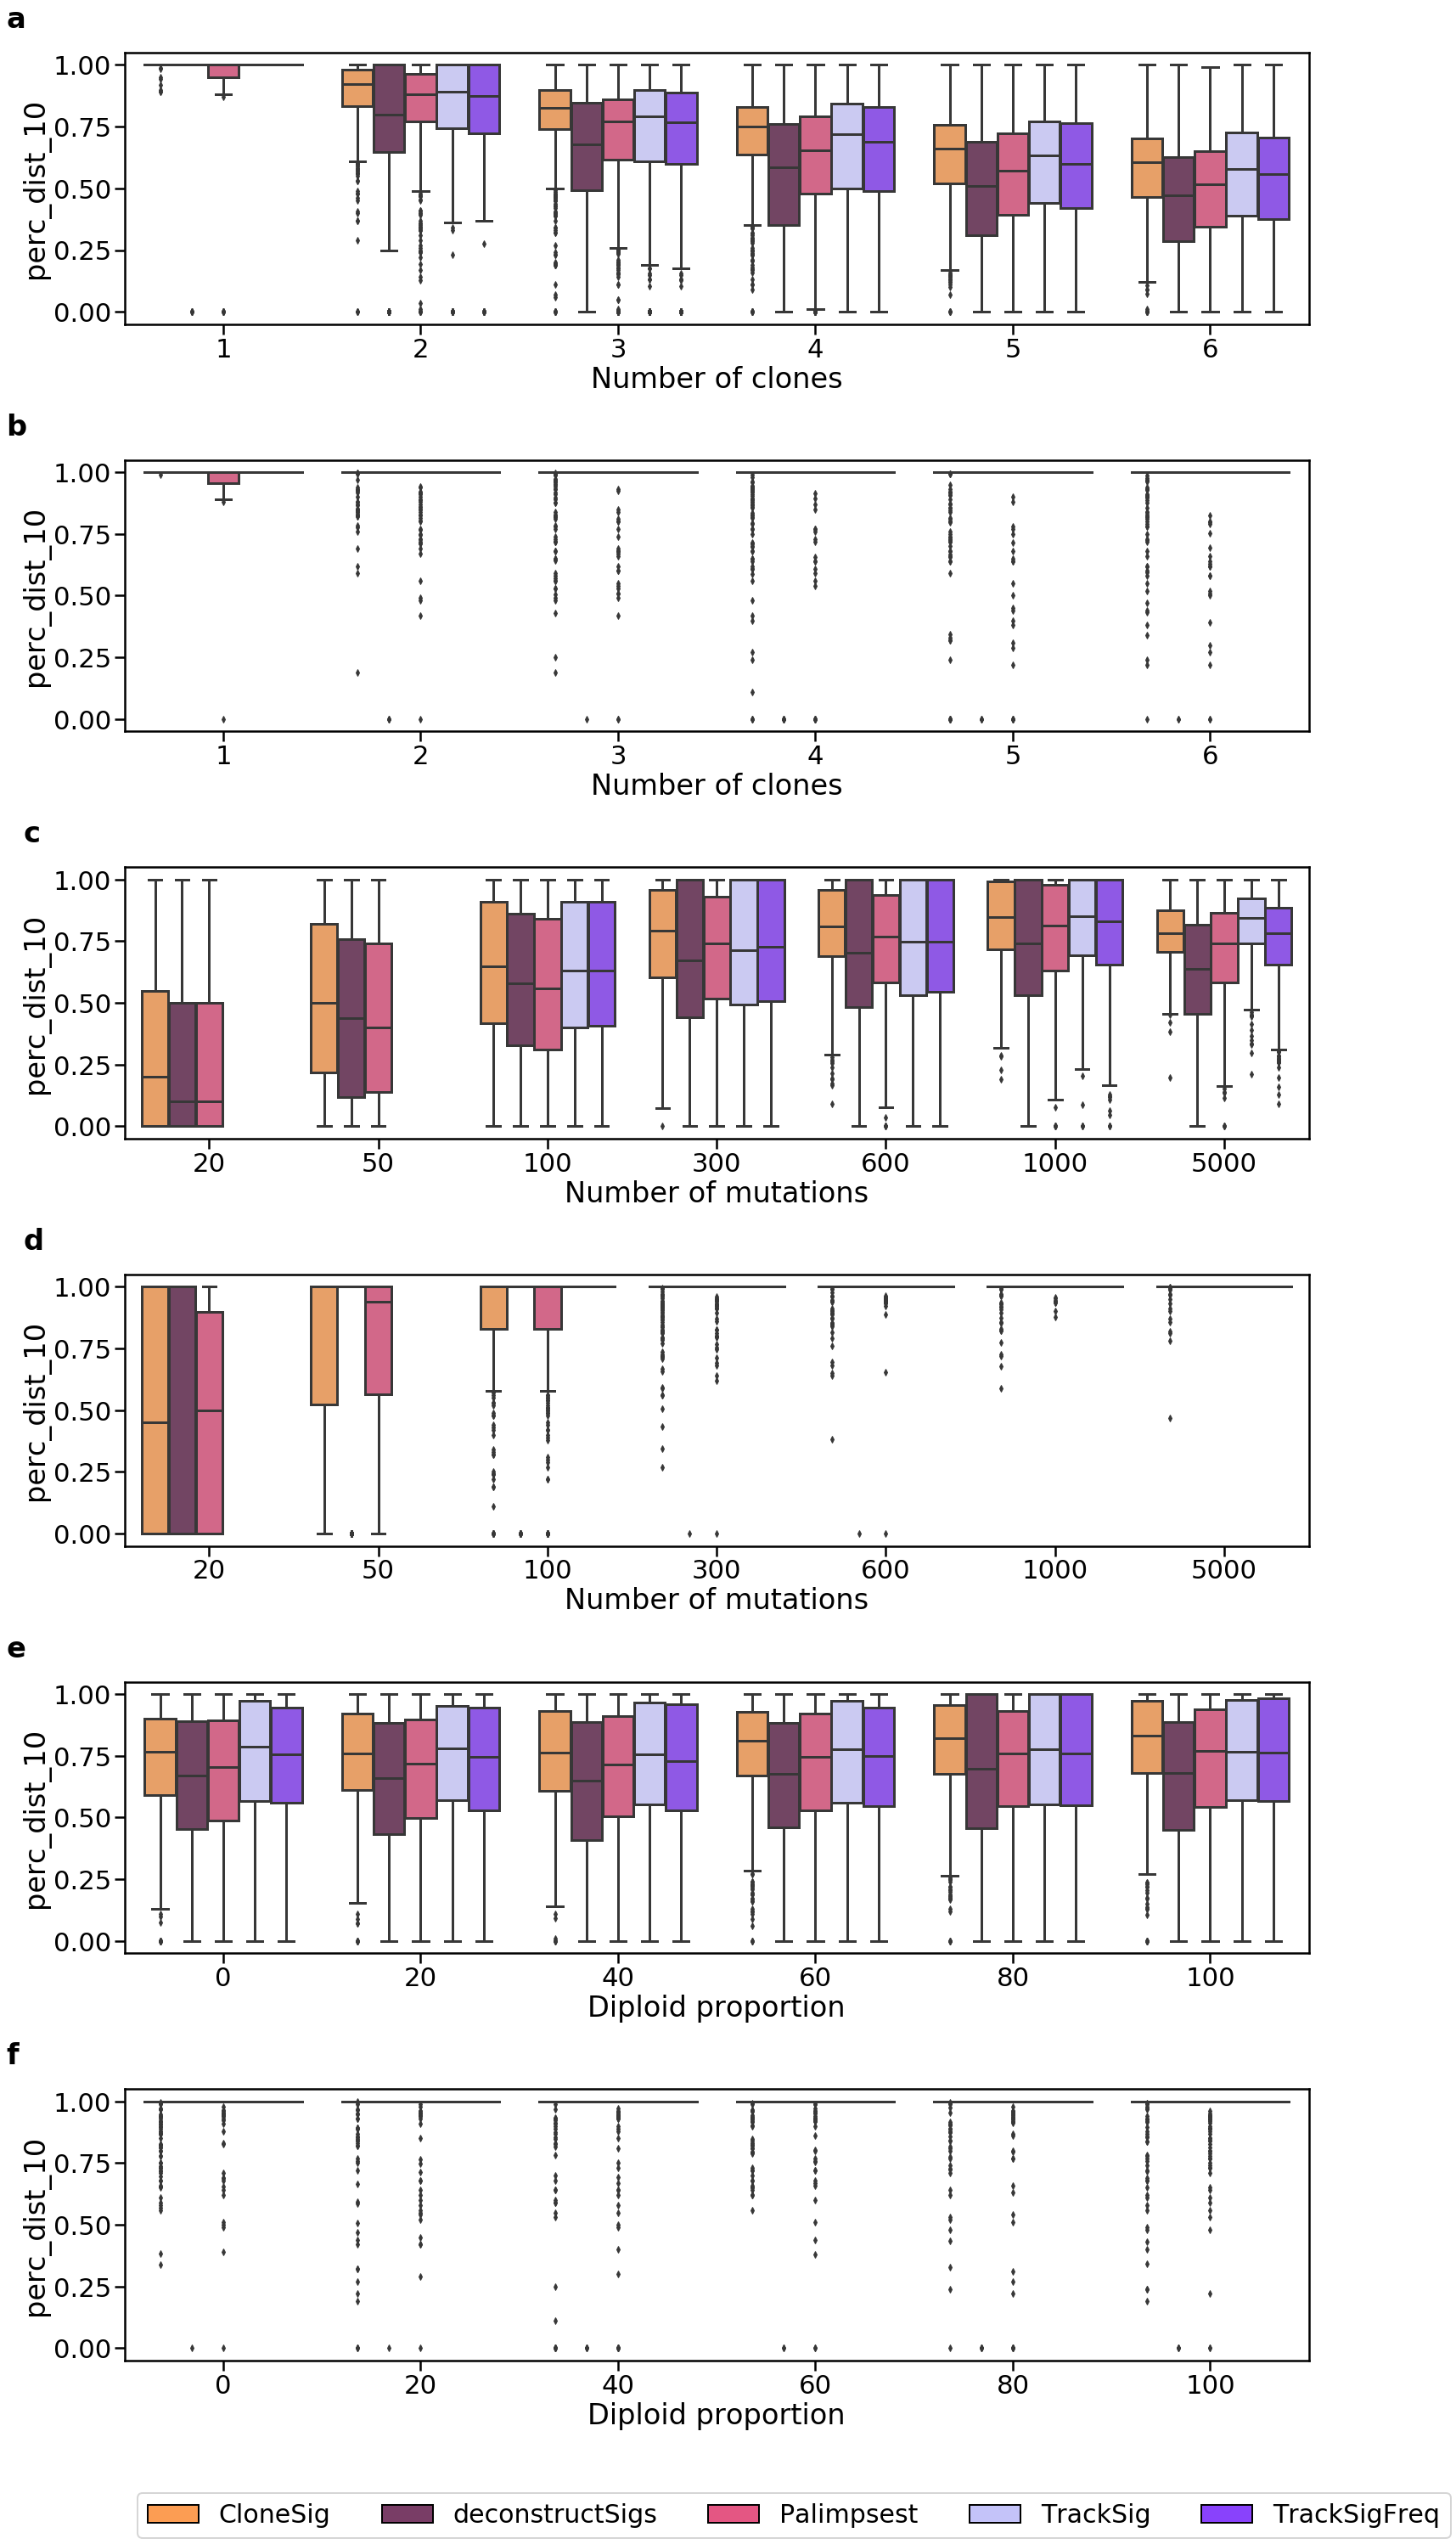

In [11]:
score_name_nice = {'score1B': 'score1B',
                   'score1C': 'score1C',
                   'score2A': 'score2A',
                   'score2C_auc': 'score2C AUC',
                   'score2C_accuracy': 'score2C\naccuracy',
                   'score2C_sensitivity': 'score2C\nsensitivity',
                   'score2C_specificity': 'score2C\nspecificity',
                   'score2C_precision': 'score2C\nprecision',
                   'score_sig_1A': 'score_sig_1A',
                   'score_sig_1B': 'score_sig_1B',
                   'score_sig_1C_auc': 'score_sig_1C AUC',
                   'score_sig_1C_accuracy': 'score_sig_1C\naccuracy',
                   'score_sig_1C_sensitivity': 'score_sig_1C\nsensitivity',
                   'score_sig_1C_specificity': 'score_sig_1C\nspecificity',
                   'score_sig_1C_precision': 'score_sig_1C\nprecision',
                   'score_sig_1D': 'score_sig_1D',
                   'min_diff_distrib_mut': 'min_diff\ndistrib_mut',
                   'max_diff_distrib_mut': 'max_diff\ndistrib_mut',
                   'std_diff_distrib_mut': 'std_diff\ndistrib_mut',
                   'median_diff_distrib_mut': 'median_diff\ndistrib_mut',
                   'perc_dist_5': 'perc_dist_5',
                   'perc_dist_10': 'perc_dist_10'}


sns.set_context('poster', font_scale=1.4)
letters = list('abcdef')
extra = list()
for score in ('score1B', 'score1C',
                'score2A', 'score2C_auc', 'score2C_accuracy',
                'score2C_sensitivity', 'score2C_specificity',
                'score2C_precision', 'score_sig_1A', 'score_sig_1B',
                'score_sig_1C_auc', 'score_sig_1C_accuracy',
                'score_sig_1C_sensitivity', 'score_sig_1C_specificity',
                'score_sig_1C_precision', 'score_sig_1D',
                'min_diff_distrib_mut', 'max_diff_distrib_mut',
                'std_diff_distrib_mut', 'median_diff_distrib_mut',
                'perc_dist_5', 'perc_dist_10'):


    fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(25, 50))
    for cov_idx, covariate in enumerate(('nb_clones', 'nb_mut', 'perc_diploid')):
        if ('sig' in score) or ('score' not in score):
            sub_clonesig_res = clonesig_res_sig
            sub_clonesig_res_cst = clonesig_res_cst_sig
            
            aa = sub_clonesig_res.groupby(id_vars).method.nunique().to_frame().reset_index()
            aa = aa.assign(nb_method=aa.method).drop(columns=['method'])
            sub_clonesig_res_complete = pd.merge(sub_clonesig_res, aa,
                                                 on=id_vars)
            if covariate=="nb_clones":
                sub_clonesig_res_filter = sub_clonesig_res_complete[sub_clonesig_res_complete.nb_method==5]
            elif covariate=='nb_mut':
                sub_clonesig_res_filter = sub_clonesig_res_complete[((sub_clonesig_res_complete.nb_method==5)&(sub_clonesig_res_complete.nb_mut>=100))|
                                                                    ((sub_clonesig_res_complete.nb_method==3)&(sub_clonesig_res_complete.nb_mut<100))]
            elif covariate=='perc_diploid':
                sub_clonesig_res_filter = sub_clonesig_res_complete[sub_clonesig_res_complete.nb_method==5]
            else:
                print('unknown covariate')
                break
                
            aa = sub_clonesig_res_cst.groupby(id_vars).method.nunique().to_frame().reset_index()
            aa = aa.assign(nb_method=aa.method).drop(columns=['method'])
            sub_clonesig_res_cst_complete = pd.merge(sub_clonesig_res_cst, aa,
                                                 on=id_vars)
            if covariate=="nb_clones":
                sub_clonesig_res_cst_filter = sub_clonesig_res_cst_complete[sub_clonesig_res_cst_complete.nb_method==5]
            elif covariate=='nb_mut':
                sub_clonesig_res_cst_filter = sub_clonesig_res_cst_complete[((sub_clonesig_res_cst_complete.nb_method==5)&(sub_clonesig_res_cst_complete.nb_mut>=100))|
                                                                    ((sub_clonesig_res_cst_complete.nb_method==3)&(sub_clonesig_res_cst_complete.nb_mut<100))]
            elif covariate=='perc_diploid':
                sub_clonesig_res_cst_filter = sub_clonesig_res_cst_complete[sub_clonesig_res_cst_complete.nb_method==5]
            else:
                print('unknown covariate')
                break
        else:
            sub_clonesig_res = clonesig_res_ith
            sub_clonesig_res_cst = clonesig_res_cst_ith
            aa = sub_clonesig_res.groupby(id_vars).method.nunique().to_frame().reset_index()
            aa = aa.assign(nb_method=aa.method).drop(columns=['method'])
            sub_clonesig_res_complete = pd.merge(sub_clonesig_res, aa,
                                                 on=id_vars)
            if covariate=="nb_clones":
                sub_clonesig_res_filter = sub_clonesig_res_complete[sub_clonesig_res_complete.nb_method==9]
            elif covariate=='nb_mut':
                sub_clonesig_res_filter = sub_clonesig_res_complete[((sub_clonesig_res_complete.nb_method==9)&(sub_clonesig_res_complete.nb_mut>=100))|
                                                                    ((sub_clonesig_res_complete.nb_method==7)&(sub_clonesig_res_complete.nb_mut<100))]
            elif covariate=='perc_diploid':
                sub_clonesig_res_filter = sub_clonesig_res_complete[((sub_clonesig_res_complete.nb_method==9)&(sub_clonesig_res_complete.perc_diploid>0))|
                                                                    ((sub_clonesig_res_complete.nb_method==8)&(sub_clonesig_res_complete.perc_diploid==0))]
            else:
                print('unknown covariate')
                break
                
            aa = sub_clonesig_res_cst.groupby(id_vars).method.nunique().to_frame().reset_index()
            aa = aa.assign(nb_method=aa.method).drop(columns=['method'])
            sub_clonesig_res_cst_complete = pd.merge(sub_clonesig_res_cst, aa,
                                                 on=id_vars)
            if covariate=="nb_clones":
                sub_clonesig_res_cst_filter = sub_clonesig_res_cst_complete[sub_clonesig_res_cst_complete.nb_method==9]
            elif covariate=='nb_mut':
                sub_clonesig_res_cst_filter = sub_clonesig_res_cst_complete[((sub_clonesig_res_cst_complete.nb_method==9)&(sub_clonesig_res_cst_complete.nb_mut>=100))|
                                                                            ((sub_clonesig_res_cst_complete.nb_method==7)&(sub_clonesig_res_cst_complete.nb_mut<100))]
            elif covariate=='perc_diploid':
                sub_clonesig_res_cst_filter = sub_clonesig_res_cst_complete[((sub_clonesig_res_cst_complete.nb_method==9)&(sub_clonesig_res_cst_complete.perc_diploid>0))|
                                                                            ((sub_clonesig_res_cst_complete.nb_method==8)&(sub_clonesig_res_cst_complete.perc_diploid==0))]
            else:
                print('unknown covariate')
                break
        if score == 'runtime':
            sub_clonesig_res = clonesig_res
            sub_clonesig_res_cst = clonesig_res_cst

        if score=='runtime':
            axes[cov_idx*2].set_yscale('log')
        hue_order = np.argsort(sub_clonesig_res_filter.full_method.str.lower().unique())
        g = sns.boxplot(x=covariate, y=score, hue="full_method",
                        data=sub_clonesig_res_filter, palette=[method_color_dict[i.split('-')[0]] for i in sub_clonesig_res_filter.full_method.unique()[hue_order]],
                        hue_order=sub_clonesig_res_filter.full_method.unique()[hue_order], ax=axes[cov_idx*2])
        ax = axes[cov_idx*2]
        ax.legend().remove()
        ax.set_xlabel(nice_name[cov_idx])
        ax.set_ylabel(score_name_nice[score])
        extra.append(ax.text(-1.1, ax.get_ylim()[1]+0.1, letters[cov_idx*2], weight='bold'))

        if score=='runtime':
            axes[cov_idx*2+1].set_yscale('log')
        hue_order_cst = np.argsort(sub_clonesig_res_cst_filter.full_method.str.lower().unique())
        g = sns.boxplot(x=covariate, y=score, hue="full_method",
                        data=sub_clonesig_res_cst_filter, palette=[method_color_dict[i.split('-')[0]] for i in sub_clonesig_res_cst_filter.full_method.unique()[hue_order_cst]],
                        hue_order=sub_clonesig_res_cst_filter.full_method.unique()[hue_order_cst], ax=axes[cov_idx*2+1])

        
        
        ax = axes[cov_idx*2+1]
        ax.set_xlabel(nice_name[cov_idx])
        ax.set_ylabel(score_name_nice[score])
        extra.append(ax.text(-1.1, ax.get_ylim()[1]+0.1, letters[cov_idx*2+1], weight='bold'))

        if cov_idx==2:
            legend_items = list()
            for key in sub_clonesig_res_filter.method.unique()[hue_order]:
                legend_items.append(Patch(facecolor=method_color_dict[key], edgecolor='black', label=legend_keys[key]))

            other_ = ax.legend(handles=legend_items,
                      bbox_to_anchor=(0, -0.7, 1., .102), fontsize=30,
                      loc=3, ncol=5)

        else:
            ax.legend().remove()
    plt.subplots_adjust(hspace=0.5)
    plt.savefig('{}/simulations_{}_full.pdf'.format(output_path, score),
                bbox_extra_artists=[other_] + extra,
                bbox_inches='tight')



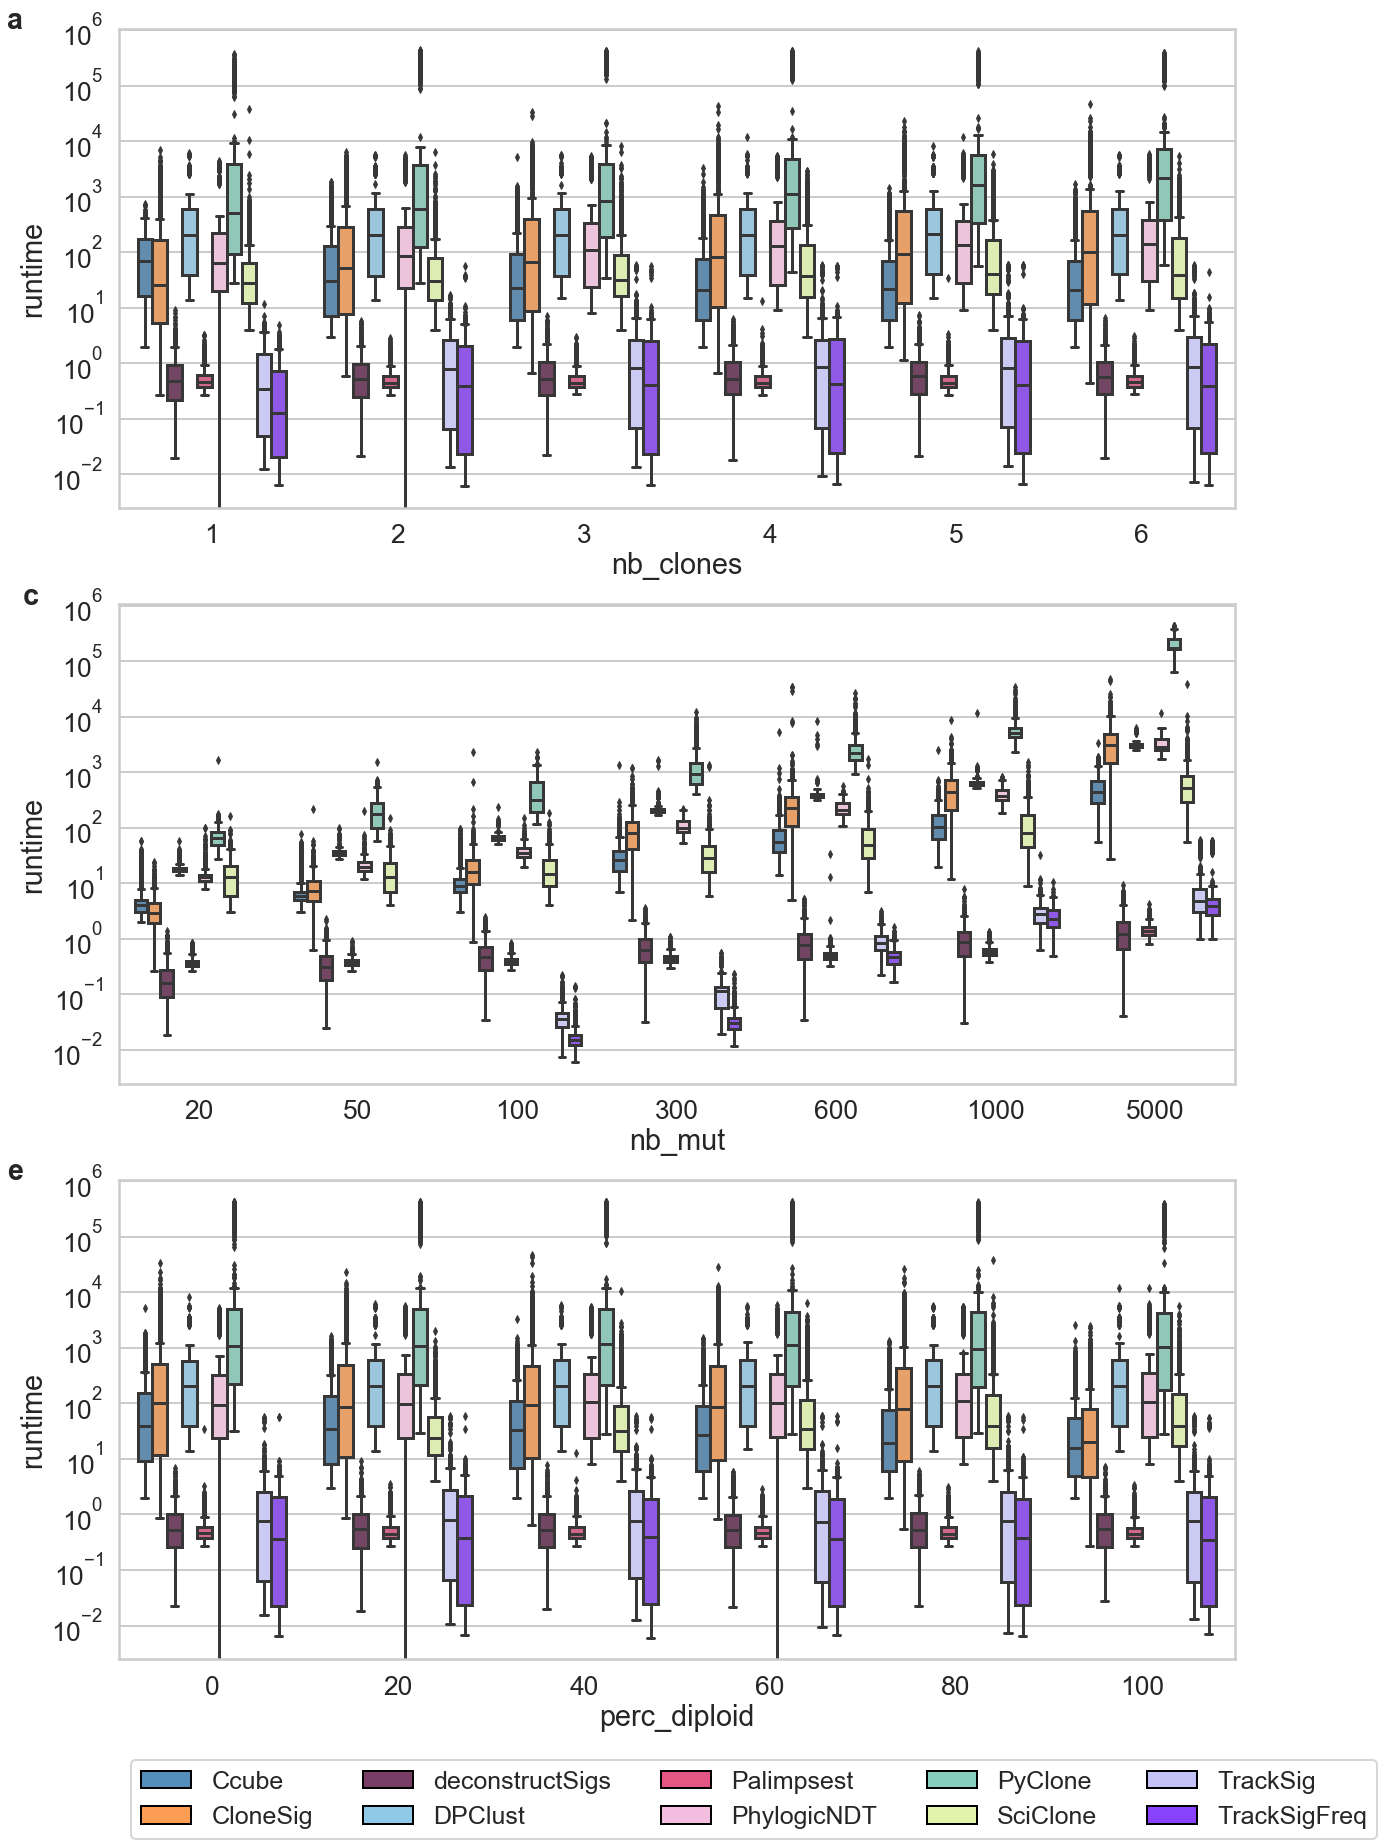

In [12]:
reduced_clonesig_res = clonesig_res[clonesig_res.full_method.isin(methods_to_use)]
sns.set_context('poster', font_scale=1.2)
sns.set_style('whitegrid')
letters = list('abcdef')
score = 'runtime'
extra = list()
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 30))
for cov_idx, covariate in enumerate(('nb_clones', 'nb_mut', 'perc_diploid')):
    if ('sig' in score) or ('score' not in score):
        sub_clonesig_res = clonesig_res_sig
        sub_clonesig_res_cst = clonesig_res_cst_sig
    else:
        sub_clonesig_res = clonesig_res_ith
        sub_clonesig_res_cst = clonesig_res_cst_ith
    if score == 'runtime':
        sub_clonesig_res = reduced_clonesig_res
        sub_clonesig_res_cst = reduced_clonesig_res_cst

    if score=='runtime':
        axes[cov_idx].set_yscale('log')
    hue_order = np.argsort(sub_clonesig_res.full_method.str.lower().unique())
    
    g = sns.boxplot(x=covariate, y=score, hue="full_method",
                    data=sub_clonesig_res, palette=[method_color_dict[i.split('-')[0]] for i in sub_clonesig_res.full_method.unique()[hue_order]],
                    hue_order=sub_clonesig_res.full_method.unique()[hue_order], ax=axes[cov_idx])
    ax = axes[cov_idx]
    extra.append(ax.text(-1.1, ax.get_ylim()[1]+0.1, letters[cov_idx*2], weight='bold'))

    if cov_idx==2:
        legend_items = list()
        for key in sub_clonesig_res.method.unique()[hue_order]:
            legend_items.append(Patch(facecolor=method_color_dict[key], edgecolor='black', label=legend_keys[key]))
        other_ = ax.legend(handles=legend_items,
                  bbox_to_anchor=(0, -0.4, 1., .102), fontsize=25,
                  loc=3, ncol=5)

    else:
        ax.legend().remove()


plt.subplots_adjust(hspace=0.2)
plt.savefig('{}/simulations_{}_full_short.pdf'.format(output_path, score),
            bbox_inches='tight', bbox_extra_artists=[other_] + extra)

